##Trabajo Practico Aprendizaje Automatico 1: Predicción de lluvia en Australia.


Dataset y objetivos:

El dataset se llama weatherAUS.csv y contiene información climática de Australia de los últimos diez años, incluyendo si para el día siguiente llovió o no y la cantidad de lluvia en las columnas **‘RainTomorrow’** y **‘RainfallTomorrow’**. El objetivo es la predicción de estas dos variables en función del resto de las características que se consideren adecuadas.


Tiene una columna ‘Location’ que indica la ciudad y el objetivo es predecir la condición de lluvia en las ciudades de Sydney, SydneyAirport, Canberra, Melbourne y MelbourneAirport (costa sureste). Pueden considerarse como una única ubicación. Descartar el resto de los datos.

# Librerias a usar

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, ElasticNetCV, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

In [ ]:
import warnings
warnings.simplefilter('ignore')


In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

#1. Limpieza del Dataset

##Carga del dataset

In [ ]:
df=pd.read_csv("/content/weatherAUS.csv", encoding="UTF-8")
df.head()

Unnamed: 0        Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0           0  2008-12-01   Albury     13.4     22.9       0.6          NaN   
1           1  2008-12-02   Albury      7.4     25.1       0.0          NaN   
2           2  2008-12-03   Albury     12.9     25.7       0.0          NaN   
3           3  2008-12-04   Albury      9.2     28.0       0.0          NaN   
4           4  2008-12-05   Albury     17.5     32.3       1.0          NaN   

   Sunshine WindGustDir  WindGustSpeed  ... Humidity3pm Pressure9am  \
0       NaN           W           44.0  ...        22.0      1007.7   
1       NaN         WNW           44.0  ...        25.0      1010.6   
2       NaN         WSW           46.0  ...        30.0      1007.6   
3       NaN          NE           24.0  ...        16.0      1017.6   
4       NaN           W           41.0  ...        33.0      1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  \
0       1007.1       8.0       NaN     16.9     21.8         No            No   
1       1007.8       NaN       NaN     17.2     24.3         No            No   
2       1008.7       NaN       2.0     21.0     23.2         No            No   
3       1012.8       NaN       NaN     18.1     26.5         No            No   
4       1006.0       7.0       8.0     17.8     29.7         No            No   

   RainfallTomorrow  
0               0.0  
1               0.0  
2               0.0  
3               1.0  
4               0.2  

[5 rows x 25 columns]

Dado que la primer columna es el indice la eliminamos

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("RainTomorrow",axis=1), df["RainTomorrow"], test_size=0.2, random_state=42)

In [ ]:
train_dataset = pd.concat([X_train, y_train], axis=1)
df=train_dataset

In [ ]:
test_dataset = pd.concat([X_test, y_test], axis=1)

In [ ]:
df=df.iloc[:, 1:]
test_dataset=test_dataset.iloc[:, 1:]
df.head()

Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
11854   2016-11-28  CoffsHarbour     18.9     28.6       0.0          NaN   
88996   2014-02-26        Cairns     22.5     31.4       1.0          5.8   
122750  2014-08-19         Perth     12.2     20.0      23.8          4.8   
15533   2010-03-08     Newcastle     21.1     33.2       0.0          NaN   
80035   2014-12-01      Watsonia     21.3     30.0       0.0         13.2   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
11854        NaN         NNE           63.0          N  ...        73.0   
88996       10.3          SE           37.0        SSE  ...        60.0   
122750       5.5          SW           30.0        NaN  ...        60.0   
15533        NaN         NaN            NaN         NE  ...        59.0   
80035        8.9         NNE           43.0        NNW  ...        46.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
11854        1016.5       1012.1       7.0       NaN     24.7     24.0   
88996        1011.5       1008.1       2.0       2.0     27.6     30.1   
122750       1017.7       1015.8       8.0       2.0     13.8     19.3   
15533           NaN          NaN       7.0       3.0     24.2     29.6   
80035        1005.3       1003.2       7.0       4.0     25.7     28.6   

        RainToday  RainfallTomorrow  RainTomorrow  
11854          No               0.0            No  
88996          No               0.0            No  
122750        Yes               0.8            No  
15533          No               0.0            No  
80035          No               0.4            No  

[5 rows x 24 columns]

filtramos solamentes para las ciudades de nuestro interes

In [ ]:
ciudades=["Melbourne","MelbourneAirport","Canberra","Sydney","SydneyAirport"]

df=df.query("Location.isin(@ciudades)")
test_dataset=test_dataset.query("Location.isin(@ciudades)")
df.shape,test_dataset.shape

((12811, 24), (3175, 24))

Revisamos si existen valores faltantes

In [ ]:
df.isna().sum()

Date                   0
Location               0
MinTemp              402
MaxTemp              398
Rainfall             631
Evaporation         1381
Sunshine            1571
WindGustDir         1146
WindGustSpeed       1145
WindDir9am           551
WindDir3pm           233
WindSpeed9am         207
WindSpeed3pm         202
Humidity9am          462
Humidity3pm          431
Pressure9am          598
Pressure3pm          589
Cloud9am            2137
Cloud3pm            2335
Temp9am              413
Temp3pm              407
RainToday            631
RainfallTomorrow     634
RainTomorrow         634
dtype: int64

## Tratamiento de datos faltantes

In [ ]:
def fill_missing_values(column):
    column.interpolate(method='linear',inplace=True, limit_direction='both')
    return column


Para los siguientes valores vamos a utilizar el metodo de interpolacion. Este metodo lo que realiza es rellenar el valor faltante con el promedio entre el anterior y el siguiente.

Esta tecnica de rellenado de datos faltantes es util para aquellos datos que son lineales. Entendiendo la temperatura, la humedad, y la presión como lineal, si vemos una serie temporal de temperatura, podemos ver que los cambios no son tan bruscos entre dias pero si son mas bruscos entre meses. Por lo cual la interpolacion nos parece la mejor manera de rellenar los datos faltantes. Claramente esto es una aproximacion

In [ ]:
columnas_interpolate=[df["MinTemp"],df["MaxTemp"],df["Evaporation"],df["Sunshine"],df['Humidity9am'],df['Humidity3pm'],df['Pressure9am'],df['Pressure3pm'],df['Temp9am'],df["Temp3pm"]]

In [ ]:
for col in columnas_interpolate:
  fill_missing_values(col)

En la columna WindGustDir, casi los primeros 1000 registros estan vacios. Lo que proponemos hacer es llenar estos mil registros con o la copia de estos datos pero de otro año o, intentado inventar una regla de 3 entre temperatura maxima y direccion del viento (a debatir)

OOO LA QUE PODEMOS SACAR ES RELLENARLOS CON UN PROMEDIO ENTRE WINDDIR9AM Y WINDDIR3PM

No parece de gran ayuda al modelo del problema poder entender el mes y la estacion del año. Ya que esto es fundamental a la hora de comprender el comportamiento de las variables climaticas

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])
df['Month'] = df["Date"].dt.month


In [ ]:
test_dataset["Date"]=pd.to_datetime(test_dataset["Date"])
test_dataset['Month'] = test_dataset["Date"].dt.month

In [ ]:
 df['Season'] = df["Month"].map({1: 'Summer', 2: 'Summer', 3: 'Autumn', 4: 'Autumn', 5: 'Autumn', 6: 'Winter', 7: 'Winter', 8: 'Winter', 9: 'Spring', 10: 'Spring', 11: 'Spring', 12: 'Summer'})

In [ ]:
 test_dataset['Season'] = test_dataset["Month"].map({1: 'Summer', 2: 'Summer', 3: 'Autumn', 4: 'Autumn', 5: 'Autumn', 6: 'Winter', 7: 'Winter', 8: 'Winter', 9: 'Spring', 10: 'Spring', 11: 'Spring', 12: 'Summer'})

Mediante muchas pruebas llegamos a la conclusion que la mejor manera de rellenar los valores faltantes de las columnas es realizando una funcion que me calcule la moda de esa columna en funcion a la localidad y la estacion que sea. Esto lo utilizamos para 3 columnas WindGustDir, WindDir9am, WindDir3pm. Utilizamos la moda porque es una variable discreta

In [ ]:
def fill_missing_values_by_season_and_location(dataframe, column_to_fill, location_column, season_column):
    mode_by_location_season = dataframe.groupby([location_column, season_column])[column_to_fill].apply(lambda x: x.mode().iloc[0])

    dataframe[column_to_fill] = dataframe.apply(lambda row: mode_by_location_season[row[location_column], row[season_column]] if pd.isna(row[column_to_fill]) else row[column_to_fill], axis=1)

    return dataframe


In [ ]:
df=fill_missing_values_by_season_and_location(df,"WindGustDir","Location","Season")

In [ ]:
df=fill_missing_values_by_season_and_location(df,"WindDir9am","Location","Season")

In [ ]:
df=fill_missing_values_by_season_and_location(df,"WindDir3pm","Location","Season")

Una buena aproximacion para la columna WindGustDir es rellenar los valores faltantes con la moda de cada ciudad. Esto fue testeado con prueba y error y parece ser que la mejor manera es rellenarlo con la moda de la ciudad.

In [ ]:
def fill_missing_data(df, column_name):
    df.sort_values('Date', inplace=True)

    df[column_name] = df.groupby(['Location', df['Date'].dt.month, df['Date'].dt.day])[column_name].transform(lambda x: x.fillna((x.shift() + x.shift(-1)) / 2))

    df[column_name] = df.groupby(['Location', df['Date'].dt.month, df['Date'].dt.day])[column_name].transform(lambda x: x.fillna(x.mean()))

    return df


La siguiente funcion tiene en cuenta el dia anterior, el siguiente, y la media de ese mismo dia en diferentes años, para rellenar los datos faltantes

Dado que las variables varian mucho dependiendo del momento en el que se miden se decidió utilizar la funcion fill_missing_data2 que realiza la media entre el valor anterior, valor posterior y la media de otros años con reapecto al dato faltante

In [ ]:
def fill_missing_data2(df, column_name):
    df.sort_values('Date', inplace=True)

    df[column_name].fillna(method='ffill', inplace=True)

    df['DailyMean'] = df.groupby([df['Date'].dt.month, df['Date'].dt.day])[column_name].transform('mean')

    df['NextValue'] = df[column_name].shift(-1)
    df['FilledValue'] = df.apply(lambda row: (row[column_name] + row['NextValue'] + row['DailyMean']) / 3 if not pd.isna(row['NextValue']) else (row[column_name] + row['DailyMean']) / 2, axis=1)

    df[column_name] = df['FilledValue']

    df.drop(['DailyMean', 'NextValue', 'FilledValue'], axis=1, inplace=True)

    return df



Dado que las variables de velocidad del viento y la nuvocidad varian mucho dependiendo del momento en el que se miden se decidió utilizar la funcion fill_missing_data2 que generaliza de mejor manera el valor faltante

In [ ]:
df = fill_missing_data2(df, 'WindSpeed9am')
df = fill_missing_data2(df, 'WindSpeed3pm')
df = fill_missing_data2(df, 'Cloud9am')
df = fill_missing_data2(df, 'Cloud3pm')

In [ ]:
df['WindSpeed9am'] = df['WindSpeed9am'].round().astype(int)
df['WindSpeed3pm'] = df['WindSpeed3pm'].round().astype(int)
df['Cloud9am'] = df['Cloud9am'].round().astype(int)
df['Cloud3pm'] = df['Cloud3pm'].round().astype(int)

In [ ]:
df.isna().sum()

Date                   0
Location               0
MinTemp                0
MaxTemp                0
Rainfall             631
Evaporation            0
Sunshine               0
WindGustDir            0
WindGustSpeed       1145
WindDir9am             0
WindDir3pm             0
WindSpeed9am           0
WindSpeed3pm           0
Humidity9am            0
Humidity3pm            0
Pressure9am            0
Pressure3pm            0
Cloud9am               0
Cloud3pm               0
Temp9am                0
Temp3pm                0
RainToday            631
RainfallTomorrow     634
RainTomorrow         634
Month                  0
Season                 0
dtype: int64

Creamos una funcion que nos permita rellenar los datos faltantes con la media, dependiendo de la localidad, y el momento del año. De esta manera podemos reemplazar los valores faltantes de una manera acertada y aporixmada a los valores reales

In [ ]:
def fill_missing_values_by_season_and_location_with_mean(dataframe, column_to_fill, location_column, season_column):

    mode_by_location_season = dataframe.groupby([location_column, season_column])[column_to_fill].transform('mean')

    dataframe[column_to_fill] = dataframe[column_to_fill].fillna(mode_by_location_season)

    return dataframe

Lo que vamos a hacer con la velocidad del viento es rellenarla con el promedio del viento dependiendo de la localidad y la estacion del año.

In [ ]:
df=fill_missing_values_by_season_and_location_with_mean(df,"WindGustSpeed","Location","Season")

Dado que los datos faltantes no se pueden general artificialmente se decidió eliminarlos

In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainfallTomorrow    0
RainTomorrow        0
Month               0
Season              0
dtype: int64

##Tratamiento de outliers

Para tratar los outliers (o los valores atipicos) vamos a realizar el rango interquartilico y eliminar aquellos que se excedan por 3 dicho rango.

In [ ]:
def eliminar_outliers_columna(df, columna, x=3):
    """
    Elimina los outliers de una columna específica de un DataFrame df basados
    en el rango intercuartílico (IQR) multiplicado por x.

    Parámetros:
        - df: DataFrame de pandas.
        - columna: Nombre de la columna para la cual se eliminarán los outliers.
        - x: Factor multiplicativo para el rango intercuartílico (por defecto, x=1).

    Devuelve:
        - DataFrame con los outliers eliminados en la columna especificada.
    """

    df_sin_outliers = df.copy()

    Q1 = df_sin_outliers[columna].quantile(0.25)
    Q3 = df_sin_outliers[columna].quantile(0.75)

    IQR = Q3 - Q1

    limite_inferior = Q1 - x * IQR
    limite_superior = Q3 + x * IQR

    df_sin_outliers = df_sin_outliers[(df_sin_outliers[columna] >= limite_inferior) &
                                      (df_sin_outliers[columna] <= limite_superior)]

    return df_sin_outliers

Vamos a eliminar los outliers que se alejen +- 1.5 del rango intercuartilico. Pero para nuestra variable a predecir (o sea nuestra y) lo vamos a tratar diferente porque al haber mas chances debido a nuestro dataset de que no llueva a que llueva

In [ ]:
df=eliminar_outliers_columna(df,"WindGustSpeed")
df=eliminar_outliers_columna(df,"MinTemp")
df=eliminar_outliers_columna(df,"MaxTemp")
df=eliminar_outliers_columna(df,"Evaporation")
df=eliminar_outliers_columna(df,"Sunshine")
df=eliminar_outliers_columna(df,"WindSpeed9am")
df=eliminar_outliers_columna(df,"WindSpeed3pm")
df=eliminar_outliers_columna(df,"Humidity9am")
df=eliminar_outliers_columna(df,"Humidity3pm")
df=eliminar_outliers_columna(df,"Pressure9am")
df=eliminar_outliers_columna(df,"Pressure3pm")
df=eliminar_outliers_columna(df,"Cloud9am")
df=eliminar_outliers_columna(df,"Cloud3pm")
df=eliminar_outliers_columna(df,"Temp9am")
df=eliminar_outliers_columna(df,"Temp3pm")


##Pruebas:


In [ ]:
sydney_airport=df[df["Location"]=="SydneyAirport"]

In [ ]:
sydney_airport[["Date","WindGustDir","WindGustSpeed","WindDir9am","WindDir3pm"]]

Date WindGustDir  WindGustSpeed WindDir9am WindDir3pm
33510 2009-01-01           S       72.00000         NW         NW
33511 2009-01-02           S       63.00000        SSE         SE
33512 2009-01-03          NE       50.52993        ESE        ENE
33513 2009-01-04          NE       65.00000        NNE         NE
33514 2009-01-05         NNE       63.00000        WNW         NE
...          ...         ...            ...        ...        ...
36513 2017-06-20         SSE       33.00000        WNW        SSE
36514 2017-06-21         SSW       56.00000        NNW          S
36515 2017-06-22          SW       35.00000        NNW        SSE
36516 2017-06-23         NNW       30.00000         NW         NW
36517 2017-06-24          SW       43.00000        WNW          W

[2386 rows x 5 columns]

In [ ]:
prueba1=sydney_airport[["Date","WindGustDir","WindGustSpeed","WindDir9am","WindDir3pm"]]

In [ ]:
sydney_airport["WindGustDir"].mode()

0    S
Name: WindGustDir, dtype: object

In [ ]:
prueba1=prueba1[(prueba1["WindDir3pm"]=="NW")&(prueba1["WindDir9am"]=="NW")]

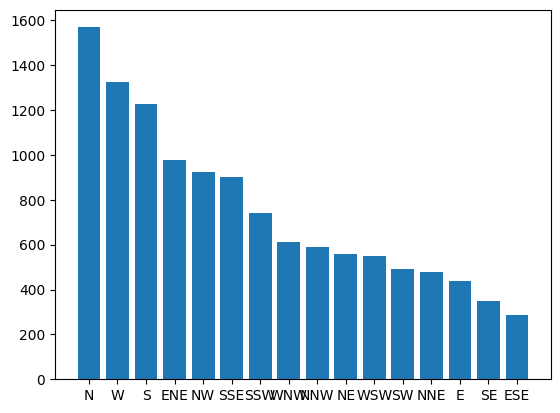

In [ ]:
wind_direction_counts = df["WindGustDir"].value_counts()

plt.bar(wind_direction_counts.index, wind_direction_counts.values)
plt.show()

In [ ]:
df.Location.sort_values().unique()

array(['Canberra', 'Melbourne', 'MelbourneAirport', 'Sydney',
       'SydneyAirport'], dtype=object)

Hasta el momento utilizamos 4 metodos para rellenar los datos faltantes.
1. Interpolacion: Lo quehace este metodo que es nos rellena el dato faltante con el promedio de el dato de arriba y el del dato de abajo. Si no tiene datos en la fila de arriba o abajo, busca el calor mas ceracano y reemplaza con ese promedio.
2. Funcion de rellenado para las variables discretas donde utilizamos la moda en base a la localidad y la estacion del año.
3. Funcion de rellenado de variables continuas donde utilizamos el promedio en base a la localidad y la estacion del año.
4. (fill missing data) esta funcion completa dependiendo el mes (asi es mas acertivo)

#2. Visualizaciones

In [ ]:
def create_histograms_by_location(df):
    """
    Crea histogramas por cada columna del DataFrame para cada localidad y los muestra uno al lado del otro.

    Args:
    - df: DataFrame de pandas.

    Returns:
    - None (muestra los histogramas uno al lado del otro).
    """
    locations = df['Location'].unique()

    column_names = df.columns.difference(['Location', 'Date'])

    num_locations = len(locations)
    num_columns = len(column_names)
    fig, axes = plt.subplots(num_columns, num_locations, figsize=(5 * num_locations, 5 * num_columns))

    for i, column_name in enumerate(column_names):
        for j, location in enumerate(locations):
            ax = axes[i, j]

            data = df[(df['Location'] == location)][column_name]

            ax.hist(data, bins=20, edgecolor='black')
            ax.set_title(f'Histograma de {column_name} en {location}')
            ax.set_xlabel(column_name)
            ax.set_ylabel('Frecuencia')

    plt.tight_layout()

    plt.show()

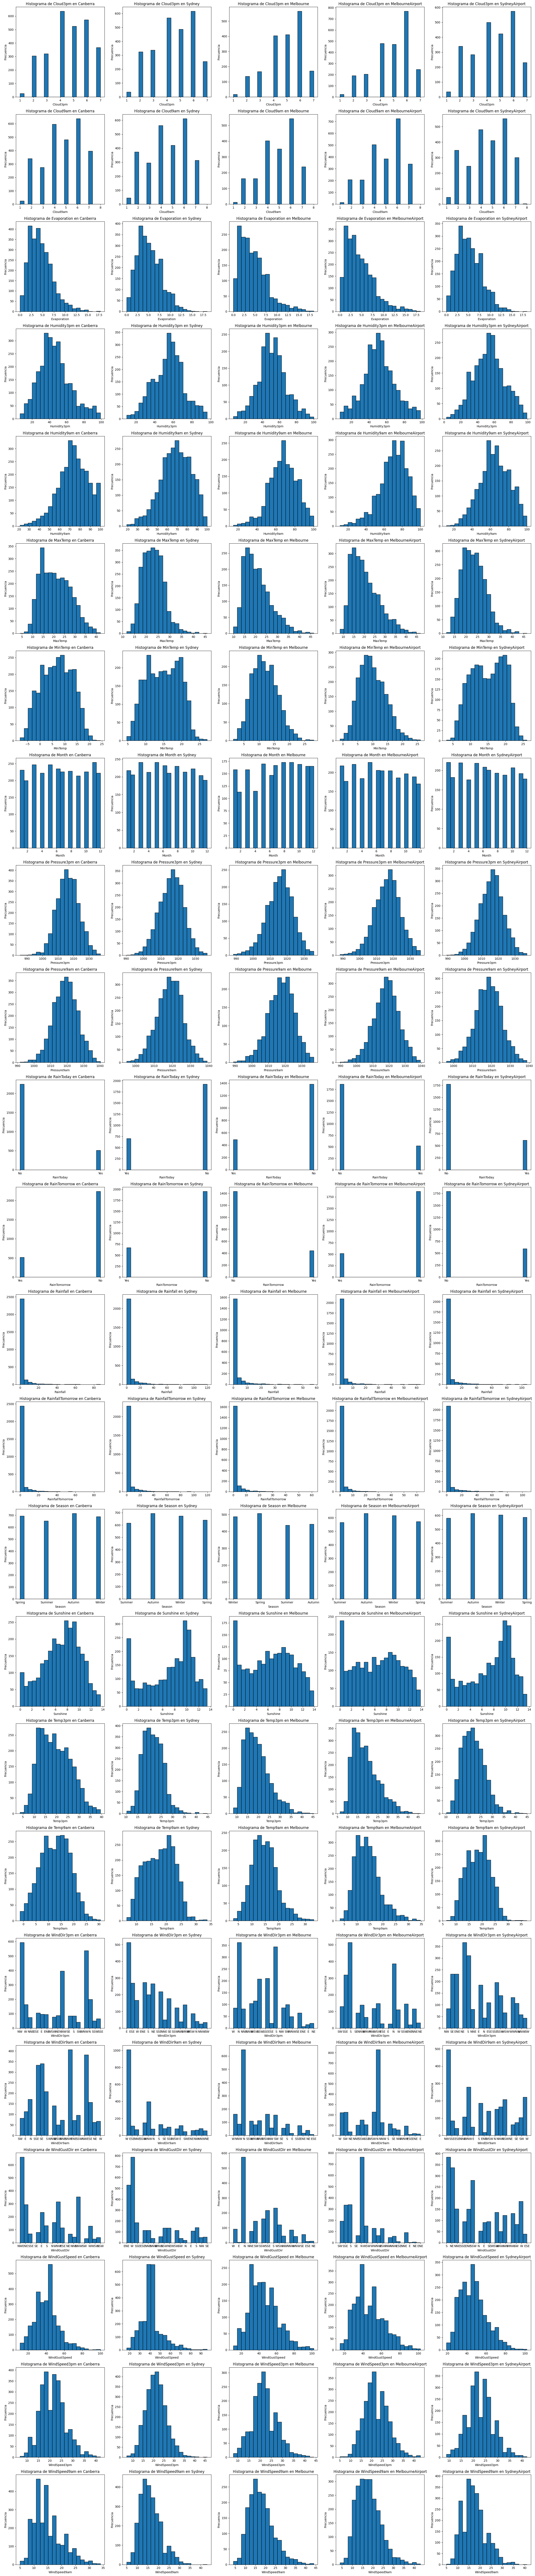

In [ ]:
create_histograms_by_location(df)

Vamos a realizar un grafico preguntandonos cuanto llueve (en proporcion) en cada estacion dependiendo de la localidad

In [ ]:
lluvia_localidad_estacion=df[["Location","RainfallTomorrow","Season"]]

In [ ]:
lluvia_localidad_estacion = lluvia_localidad_estacion.groupby(['Location', 'Season'])['RainfallTomorrow'].sum().reset_index()

In [ ]:
lluvia_localidad_estacion

Location  Season  RainfallTomorrow
0           Canberra  Autumn             945.7
1           Canberra  Spring            1448.6
2           Canberra  Summer            1588.6
3           Canberra  Winter            1020.1
4          Melbourne  Autumn             652.0
5          Melbourne  Spring             985.8
6          Melbourne  Summer             500.0
7          Melbourne  Winter             724.2
8   MelbourneAirport  Autumn             671.6
9   MelbourneAirport  Spring            1157.6
10  MelbourneAirport  Summer             777.2
11  MelbourneAirport  Winter             700.4
12            Sydney  Autumn            3034.6
13            Sydney  Spring            1408.2
14            Sydney  Summer            1866.8
15            Sydney  Winter            2412.4
16     SydneyAirport  Autumn            2121.4
17     SydneyAirport  Spring            1121.2
18     SydneyAirport  Summer            1796.8
19     SydneyAirport  Winter            1930.0

In [ ]:
suma_total_por_localidad = lluvia_localidad_estacion.groupby('Location')['RainfallTomorrow'].sum().reset_index()
lluvia_localidad_estacion = lluvia_localidad_estacion.merge(suma_total_por_localidad, on='Location', suffixes=('', '_total'))
lluvia_localidad_estacion['Proportion'] = lluvia_localidad_estacion['RainfallTomorrow'] / lluvia_localidad_estacion['RainfallTomorrow_total']
lluvia_localidad_estacion = lluvia_localidad_estacion.drop('RainfallTomorrow_total', axis=1)

lluvia_localidad_estacion

Location  Season  RainfallTomorrow  Proportion
0           Canberra  Autumn             945.7    0.189027
1           Canberra  Spring            1448.6    0.289546
2           Canberra  Summer            1588.6    0.317529
3           Canberra  Winter            1020.1    0.203898
4          Melbourne  Autumn             652.0    0.227813
5          Melbourne  Spring             985.8    0.344444
6          Melbourne  Summer             500.0    0.174703
7          Melbourne  Winter             724.2    0.253040
8   MelbourneAirport  Autumn             671.6    0.203097
9   MelbourneAirport  Spring            1157.6    0.350067
10  MelbourneAirport  Summer             777.2    0.235031
11  MelbourneAirport  Winter             700.4    0.211806
12            Sydney  Autumn            3034.6    0.347925
13            Sydney  Spring            1408.2    0.161454
14            Sydney  Summer            1866.8    0.214033
15            Sydney  Winter            2412.4    0.276588
16     SydneyAirport  Autumn            2121.4    0.304388
17     SydneyAirport  Spring            1121.2    0.160875
18     SydneyAirport  Summer            1796.8    0.257813
19     SydneyAirport  Winter            1930.0    0.276925

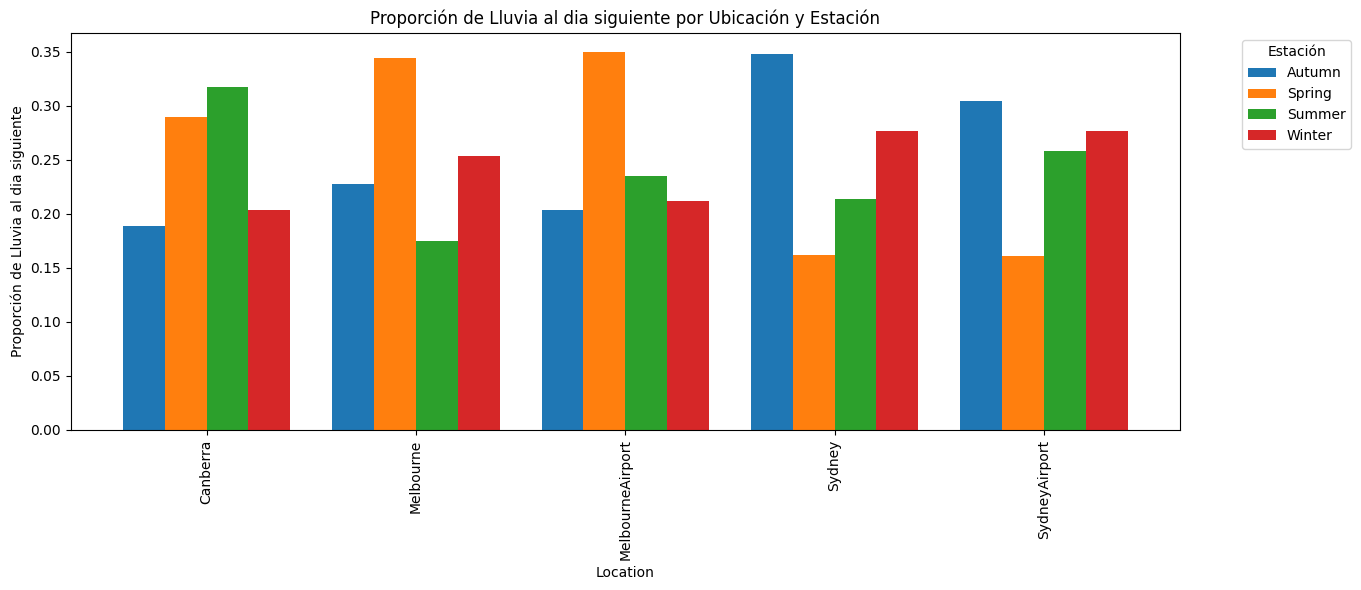

In [ ]:
pivoteado = lluvia_localidad_estacion.pivot(index='Location', columns='Season', values='Proportion')
ax = pivoteado.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.xlabel('Location')
plt.ylabel('Proporción de Lluvia al dia siguiente')
plt.title('Proporción de Lluvia al dia siguiente por Ubicación y Estación')
plt.tight_layout()
plt.legend(title='Estación', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Con esto nos damos cuenta que vamos a tener que tener en cuenta la localidad y la estacion a la hora de evaluar de hacer uno o varios modelos predictivos porque lo que sucede es que en cada region es diferente en que estacion del año llueve mas. En Canberra llueve mas en verano mientras que en Melbourne llueve mas en primavera. En la otra vereda en Sydney llueve mas en Otoño.

Vamos a realizar una comparacion de la velocidad del viento dependiendo si llueve o no llueve. Para esto tendremos en cuenta localidad y estacion (al menos a la hora de realizar el df)

In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainfallTomorrow', 'RainTomorrow', 'Month',
       'Season'],
      dtype='object')

In [ ]:
lluvia_hoy=df[df["RainTomorrow"]=="Yes"]
lluvia_hoy=lluvia_hoy[["Location","WindGustSpeed","Season"]]
lluvia_hoy=lluvia_hoy.groupby(["Location","Season"])["WindGustSpeed"].mean().reset_index()
lluvia_hoy.rename(columns={"WindGustSpeed":"Wind Speed Rain"},inplace=True)

In [ ]:
no_lluvia_hoy=df[df["RainTomorrow"]=="No"]
no_lluvia_hoy=no_lluvia_hoy[["Location","WindGustSpeed","Season"]]
no_lluvia_hoy=no_lluvia_hoy.groupby(["Location","Season"])["WindGustSpeed"].mean().reset_index()
no_lluvia_hoy["Wind Speed Rain"]=lluvia_hoy["Wind Speed Rain"]
no_lluvia_hoy.rename(columns={"WindGustSpeed":"Wind Speed No Rain"},inplace=True)

In [ ]:
no_lluvia_hoy

Location  Season  Wind Speed No Rain  Wind Speed Rain
0           Canberra  Autumn           34.889298        42.480769
1           Canberra  Spring           44.338355        48.788599
2           Canberra  Summer           43.160261        46.971944
3           Canberra  Winter           36.089738        42.598379
4          Melbourne  Autumn           38.561047        50.106530
5          Melbourne  Spring           46.555658        54.997812
6          Melbourne  Summer           44.515173        49.117647
7          Melbourne  Winter           42.864797        51.985714
8   MelbourneAirport  Autumn           41.888264        51.971156
9   MelbourneAirport  Spring           47.184167        54.013072
10  MelbourneAirport  Summer           46.208194        54.116279
11  MelbourneAirport  Winter           44.409190        53.823859
12            Sydney  Autumn           37.477839        44.080240
13            Sydney  Spring           43.689077        46.370174
14            Sydney  Summer           42.730668        44.561254
15            Sydney  Winter           39.227193        42.825135
16     SydneyAirport  Autumn           41.704698        50.400000
17     SydneyAirport  Spring           49.374063        51.330827
18     SydneyAirport  Summer           49.703056        52.993561
19     SydneyAirport  Winter           42.554685        48.518470

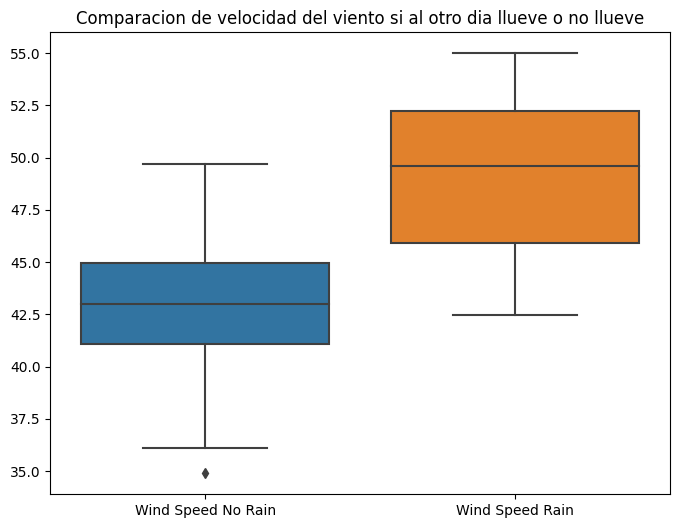

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=no_lluvia_hoy[['Wind Speed No Rain', 'Wind Speed Rain']])
plt.title('Comparacion de velocidad del viento si al otro dia llueve o no llueve')
plt.show()

Podemos ver que cuando al dia siguiente llueve, la velocidad promedio del viento es mayor a que cuando no llueve.

Ahora vamos a ver la relacion que hay entre la temperatura maxima y cuanto llueve al otro dia dependiendo de la localidad y las estaciones. Entendiendo como hipotesis que si hace mucho calor hoy, mañana deberia llover


In [ ]:
temperatura_maxima=df[["Location","Season","MaxTemp","RainTomorrow","RainfallTomorrow"]]

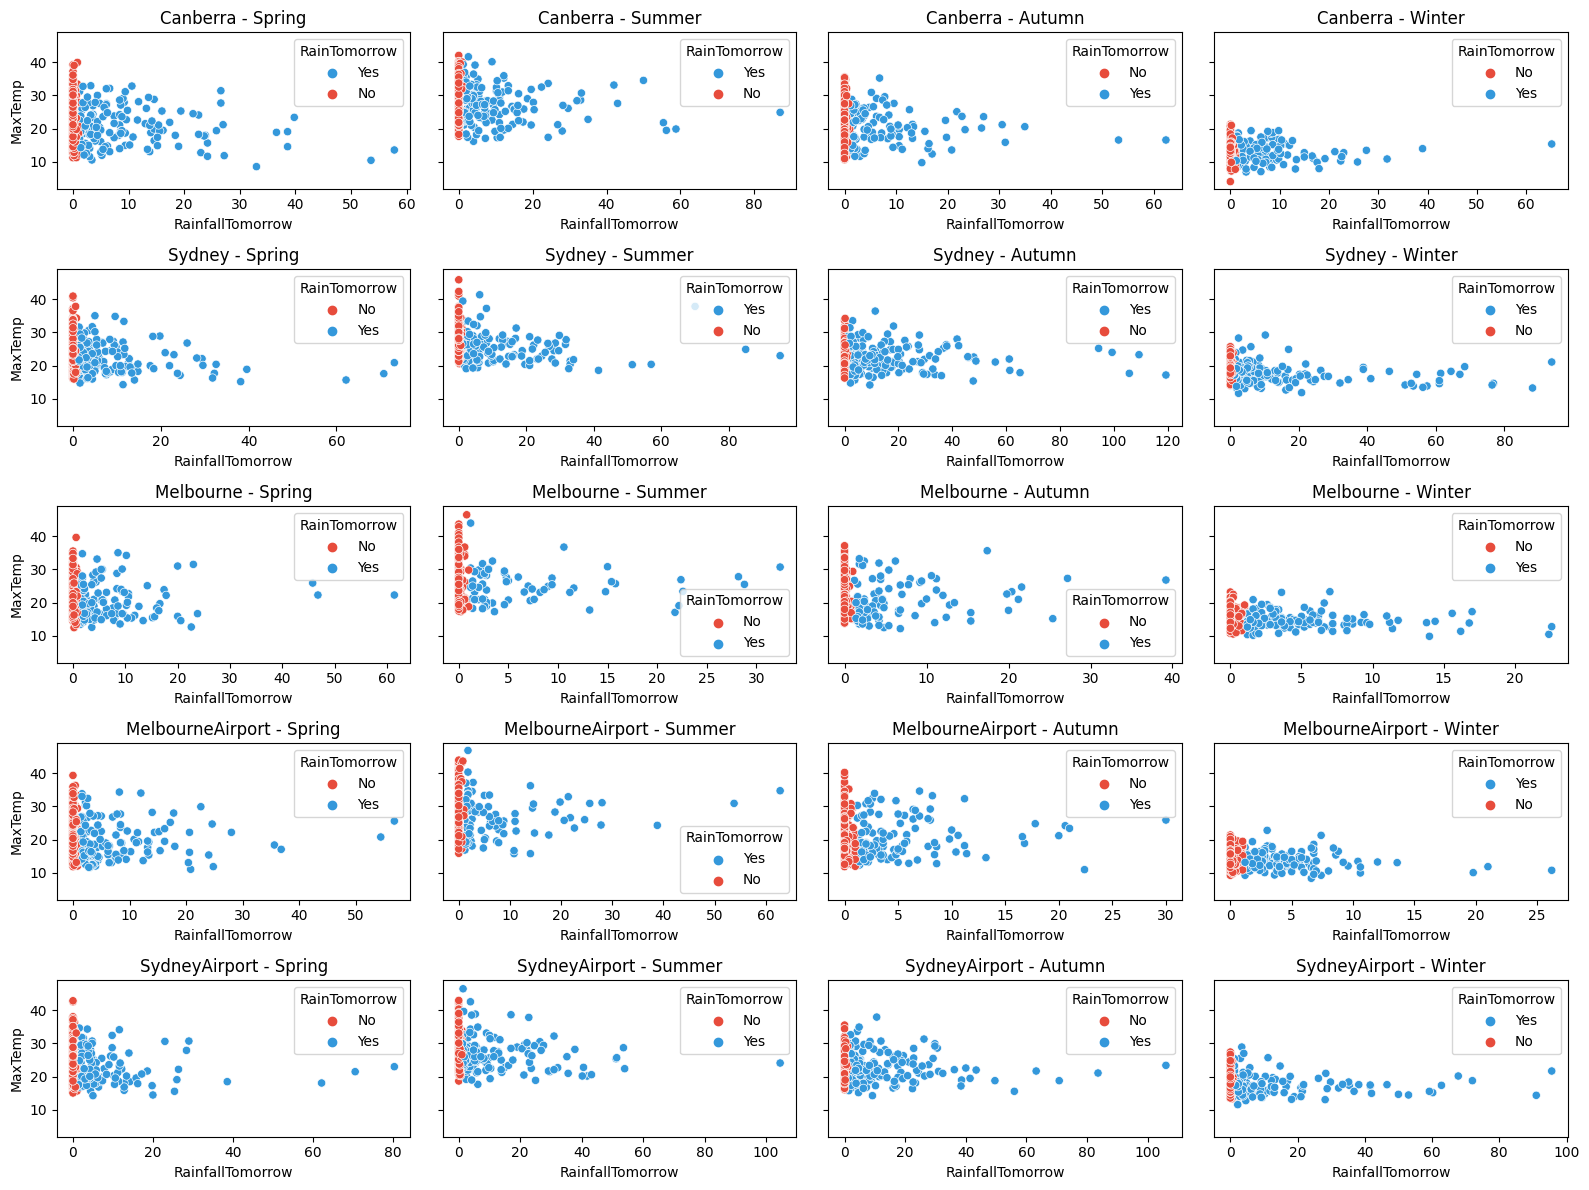

In [ ]:
colores = {'Yes': '#3498db', 'No': '#e74c3c'}

ubicaciones = temperatura_maxima['Location'].unique()
estaciones = temperatura_maxima['Season'].unique()

n_filas = len(ubicaciones)
n_columnas = len(estaciones)

fig, axes = plt.subplots(n_filas, n_columnas, figsize=(16, 12), sharey=True)

for i, ubicacion in enumerate(ubicaciones):
    for j, estacion in enumerate(estaciones):
        ax = axes[i, j]
        datos = temperatura_maxima[(temperatura_maxima['Location'] == ubicacion) & (temperatura_maxima['Season'] == estacion)]
        sns.scatterplot(data=datos, x='RainfallTomorrow', y='MaxTemp', hue='RainTomorrow', palette=colores, ax=ax)
        ax.set_title(f'{ubicacion} - {estacion}')
        ax.set_xlabel('RainfallTomorrow')
        ax.set_ylabel('MaxTemp')

plt.tight_layout()
plt.show()


Con la matriz de scatterplots anterior podemos ver como no necesariamente si hace calor un dia al otro va a llover. Para realizar este scatterplot nos parecio necesario separar por estaciones y obviamente por localidades. Algo que nos gustaria destacar es que si bien hay dias donde hace frio y al otro dia llueve, esto podria ser porque muchas veces lo que sucede es que llueve un dia y al otro tambien llueve, vamos a ver en el siguiente grafico acerca de un poco mas de esto

In [ ]:
llueve_mañana=df[["RainToday","RainTomorrow"]]
llueve_mañana=llueve_mañana.groupby(["RainToday","RainTomorrow"]).value_counts().reset_index()
llueve_mañana.rename(columns={0:"count"},inplace=True)

In [ ]:
llueve_mañana

RainToday RainTomorrow  count
0        No           No   7655
1        No          Yes   1534
2       Yes           No   1626
3       Yes          Yes   1206

In [ ]:
llueve_hoy_yes=llueve_mañana[llueve_mañana["RainToday"]=="Yes"]
llueve_hoy_yes["Proporcion"]=llueve_hoy_yes["count"]/llueve_hoy_yes["count"].sum()
llueve_hoy_No=llueve_mañana[llueve_mañana["RainToday"]=="No"]
llueve_hoy_No["Proporcion"]=llueve_hoy_No["count"]/llueve_hoy_No["count"].sum()

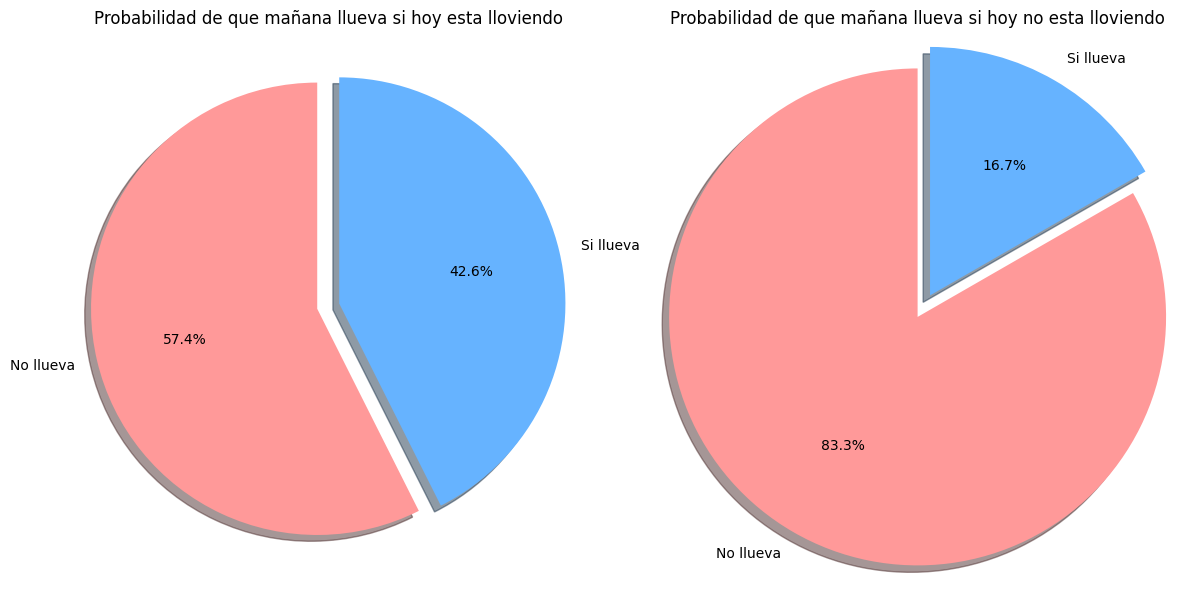

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

labels_yes = 'No llueva', 'Si llueva'
sizes_yes = [llueve_hoy_yes["Proporcion"].iloc[0], llueve_hoy_yes["Proporcion"].iloc[1]]
colors_yes = ['#ff9999', '#66b3ff']
explode_yes = (0.1, 0)

labels_no = 'No llueva', 'Si llueva'
sizes_no = [llueve_hoy_No["Proporcion"].iloc[0], llueve_hoy_No["Proporcion"].iloc[1]]
colors_no = ['#ff9999', '#66b3ff']
explode_no = (0.1, 0)

axes[0].pie(sizes_yes, explode=explode_yes, labels=labels_yes, colors=colors_yes, autopct='%1.1f%%', shadow=True, startangle=90)
axes[0].axis('equal')
axes[0].set_title('Probabilidad de que mañana llueva si hoy esta lloviendo')

axes[1].pie(sizes_no, explode=explode_no, labels=labels_no, colors=colors_no, autopct='%1.1f%%', shadow=True, startangle=90)
axes[1].axis('equal')
axes[1].set_title('Probabilidad de que mañana llueva si hoy no esta lloviendo')

plt.tight_layout()
plt.show()

Con esto podemos confirmar lo dicho anteriormente, si hoy esta lloviendo hay una probabilidade de que mañana continue lloviendo mayor a la que si hoy no esta lloviendo, mañana llueva.

Vamos a ver cuanto llovera mañana en promedio si hoy esta lloviendo  

In [ ]:
cant_lluvia=df[["RainfallTomorrow","RainToday","RainTomorrow","Location"]]
cant_lluvia=cant_lluvia[(cant_lluvia["RainToday"]=="Yes")&(cant_lluvia["RainTomorrow"]=="Yes")]
cant_lluvia

RainfallTomorrow RainToday RainTomorrow       Location
45574               3.6       Yes          Yes       Canberra
45575              39.8       Yes          Yes       Canberra
45603               4.2       Yes          Yes       Canberra
45618               1.4       Yes          Yes       Canberra
45622               6.4       Yes          Yes       Canberra
...                 ...       ...          ...            ...
33493               3.4       Yes          Yes         Sydney
36502              15.6       Yes          Yes  SydneyAirport
33494              38.8       Yes          Yes         Sydney
36503               2.4       Yes          Yes  SydneyAirport
33496               1.2       Yes          Yes         Sydney

[1206 rows x 4 columns]

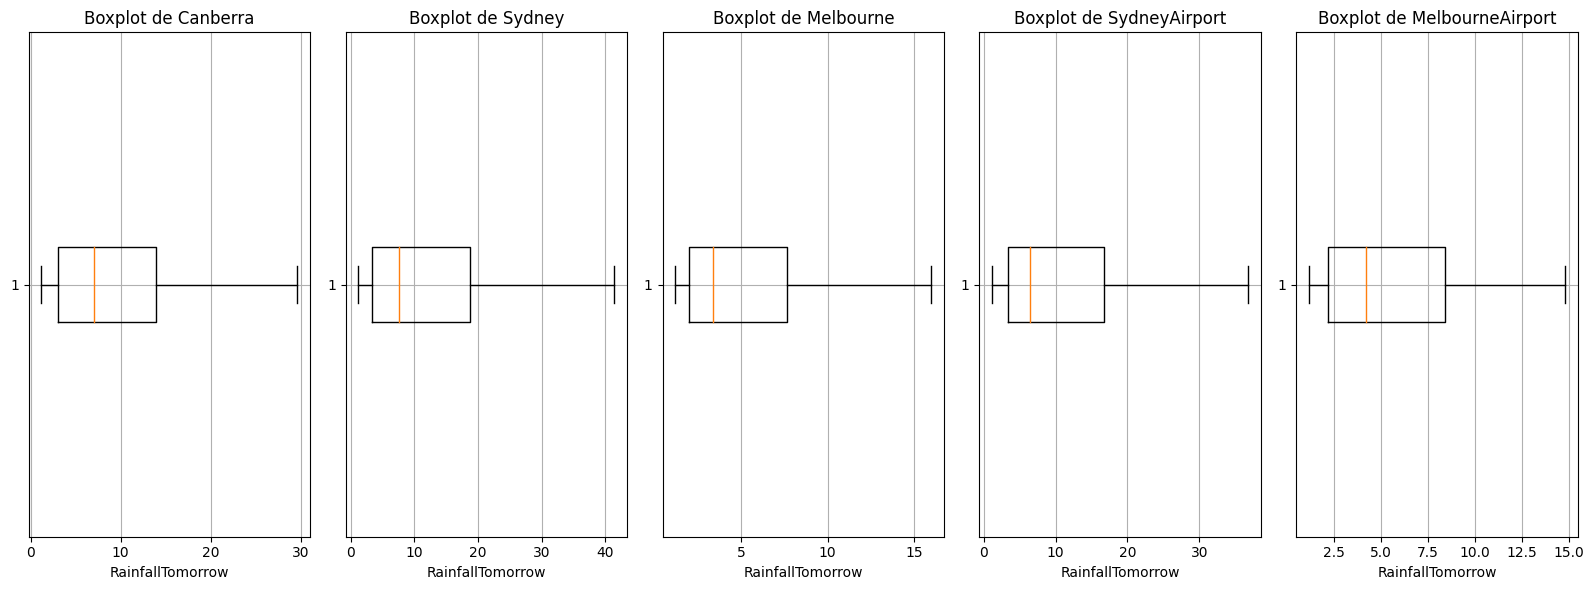

In [ ]:
ubicaciones = cant_lluvia['Location'].unique()

plt.figure(figsize=(16, 6))

for i, ubicacion in enumerate(ubicaciones, 1):
    plt.subplot(1, len(ubicaciones), i)
    datos_ubicacion = cant_lluvia[cant_lluvia['Location'] == ubicacion]['RainfallTomorrow']
    plt.boxplot(datos_ubicacion, vert=False, showfliers=False)
    plt.title(f'Boxplot de {ubicacion}')
    plt.xlabel('RainfallTomorrow')
    plt.grid(True)

plt.tight_layout()

plt.show()

Podemos ver como la cantidad de lluvia que caera mañana dependiendo de si hoy llovio en Sydney es mayor que todos los demas lugares mientras que Melbourne es donde menos llueve.

Cual es la direccion del viento que probabilidad hay de que llueva dependiendo del lugar?

In [ ]:
viento_lluvia=df[["Location","Season","WindGustDir","RainTomorrow"]]
viento_lluvia=viento_lluvia[viento_lluvia["RainTomorrow"]=="Yes"]
viento_lluvia = viento_lluvia.groupby('Location')['WindGustDir'].value_counts().groupby(level=0, group_keys=False).nlargest(5).reset_index(name='Count')

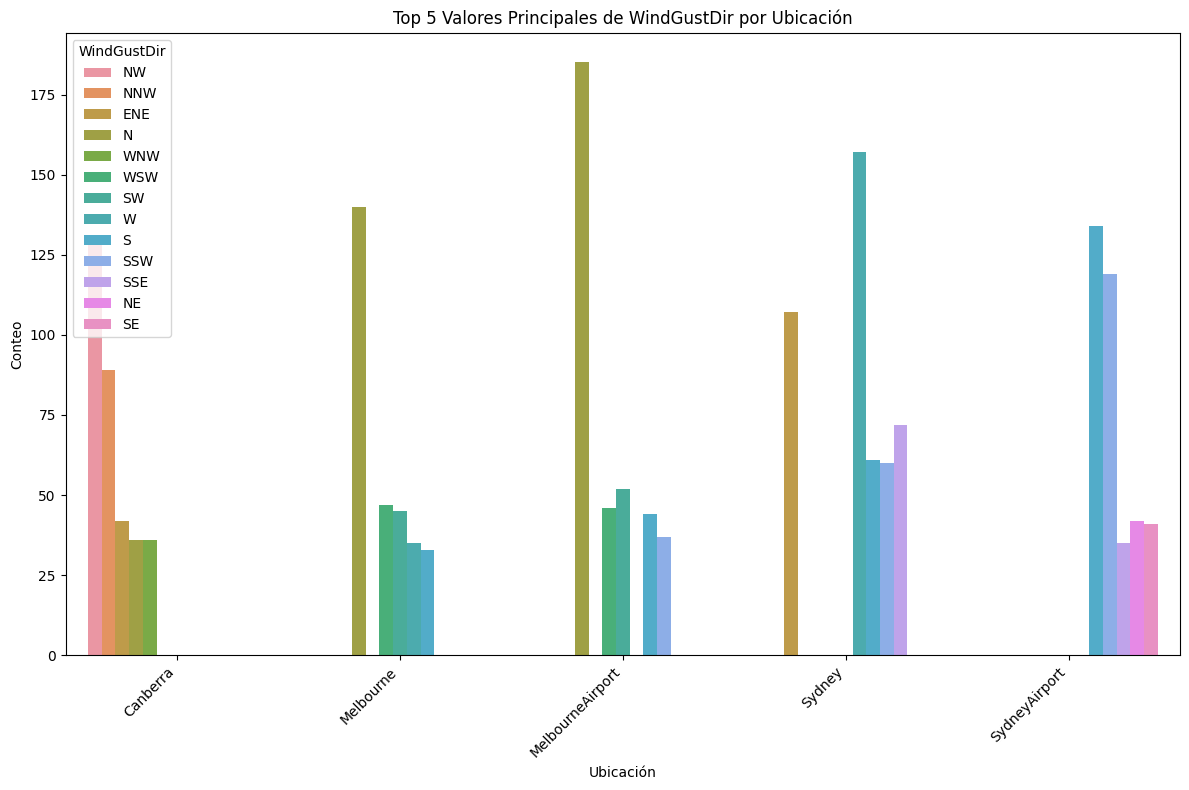

In [ ]:
plt.figure(figsize=(12, 8))

sns.barplot(x='Location', y='Count', hue='WindGustDir', data=viento_lluvia)
plt.title('Top 5 Valores Principales de WindGustDir por Ubicación')
plt.xlabel('Ubicación')
plt.ylabel('Conteo')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Bueno podemos ver que de donde viene el viento claramente influye aunque es una realidad tambien que anteriormente decidimos rellenar los valores faltantes con la moda del lugar dependiendo la estacion por lo tanto este grafico claramente puede estar sesgado.

# 3. Codificación de variables categóricas

In [ ]:
def create_dummy_variables(df, column_name):
    """
    Genera variables dummy para los valores únicos en una columna categórica del DataFrame.

    Args:
    - df: DataFrame de pandas.
    - column_name: Nombre de la columna para la cual se generarán las variables dummy.

    Returns:
    - DataFrame modificado con las variables dummy.
    """
    dummies = pd.get_dummies(df[column_name], prefix=column_name, drop_first=True)

    df = pd.concat([df, dummies], axis=1)

    df.drop(column_name, axis=1, inplace=True)

    return df


In [ ]:
df_cp = df.copy()

df_cp = create_dummy_variables(df_cp, 'Location')
df_cp = create_dummy_variables(df_cp, 'Season')
df_cp = create_dummy_variables(df_cp, 'WindGustDir')
df_cp = create_dummy_variables(df_cp, 'WindDir3pm')
df_cp = create_dummy_variables(df_cp, 'WindDir9am')

df_cp['RainToday'] = df_cp['RainToday'].replace({'Yes': 1, 'No': 0})

df_cp['RainTomorrow'] = df_cp['RainTomorrow'].replace({'Yes': 1, 'No': 0})

df_cp.head()

Date  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
45573 2007-11-01      8.0     24.3       0.0          3.4       6.3   
45574 2007-11-02     14.0     26.9       3.6          4.4       9.7   
45575 2007-11-03     13.7     23.4       3.6          5.8       3.3   
45577 2007-11-05      7.6     16.1       2.8          5.6      10.6   
45578 2007-11-06      6.2     16.9       0.0          5.8       8.2   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  ...  \
45573           30.0             9            21         68.0  ...   
45574           39.0             9            15         80.0  ...   
45575           85.0            13            19         82.0  ...   
45577           50.0            20            26         68.0  ...   
45578           44.0            19            24         70.0  ...   

       WindDir9am_NNW  WindDir9am_NW  WindDir9am_S  WindDir9am_SE  \
45573               0              0             0              0   
45574               0              0             0              0   
45575               0              0             0              0   
45577               0              0             0              0   
45578               0              0             0              1   

       WindDir9am_SSE  WindDir9am_SSW  WindDir9am_SW  WindDir9am_W  \
45573               0               0              1             0   
45574               0               0              0             0   
45575               0               0              0             0   
45577               1               0              0             0   
45578               0               0              0             0   

       WindDir9am_WNW  WindDir9am_WSW  
45573               0               0  
45574               0               0  
45575               0               0  
45577               0               0  
45578               0               0  

[5 rows x 73 columns]

In [ ]:
test_dataset = create_dummy_variables(test_dataset, 'Location')
test_dataset = create_dummy_variables(test_dataset, 'Season')
test_dataset = create_dummy_variables(test_dataset, 'WindGustDir')
test_dataset = create_dummy_variables(test_dataset, 'WindDir3pm')
test_dataset = create_dummy_variables(test_dataset, 'WindDir9am')

test_dataset['RainToday'] = test_dataset['RainToday'].replace({'Yes': 1, 'No': 0})

test_dataset['RainTomorrow'] = test_dataset['RainTomorrow'].replace({'Yes': 1, 'No': 0})

test_dataset.head()

Date  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
36428 2017-03-27     20.2     28.7       0.0          5.8      11.0   
30576 2009-03-16     16.1     26.8       0.4          6.8      10.8   
45934 2008-10-27      9.0     30.7       0.0          7.6      12.1   
33932 2010-02-27     19.3     29.3       0.4          3.8      11.8   
68547 2012-04-29     11.9     17.9       NaN          4.6       7.7   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  ...  \
36428           50.0          15.0          33.0         76.0  ...   
30576            NaN          17.0          22.0         42.0  ...   
45934           76.0           7.0          50.0         38.0  ...   
33932           46.0          11.0          26.0         65.0  ...   
68547           33.0           9.0          24.0         53.0  ...   

       WindDir9am_NNW  WindDir9am_NW  WindDir9am_S  WindDir9am_SE  \
36428               1              0             0              0   
30576               0              0             0              0   
45934               0              0             0              0   
33932               0              0             0              0   
68547               0              0             0              0   

       WindDir9am_SSE  WindDir9am_SSW  WindDir9am_SW  WindDir9am_W  \
36428               0               0              0             0   
30576               0               0              0             1   
45934               1               0              0             0   
33932               0               0              0             0   
68547               0               0              0             0   

       WindDir9am_WNW  WindDir9am_WSW  
36428               0               0  
30576               0               0  
45934               0               0  
33932               0               0  
68547               0               1  

[5 rows x 73 columns]

#4. Balanceo Del Dataset


veremos si el dataframe esta balanceado o no. Esto siempre es viendolo con nuestra variable objetivo o sea la que queremos predecir

In [ ]:
df_cp["RainTomorrow"].value_counts()

0    9281
1    2740
Name: RainTomorrow, dtype: int64

In [ ]:
test_dataset=test_dataset.dropna()

In [ ]:
test_dataset['RainTomorrow'] = test_dataset['RainTomorrow'].astype(int)

Claramente el dataframe esta desbalanceado ya que con esto nos va a predecir mejor cuando no llueve que cuando llueve y cuanto llueve.

In [ ]:
# Dividir el conjunto de datos en características (X) y variable objetivo (y)
X_train = df_cp.drop(["RainTomorrow", "Date"], axis=1)
y_train = df_cp["RainTomorrow"]

X_test=test_dataset.drop(["RainTomorrow", "Date"], axis=1)
y_test=test_dataset["RainTomorrow"]
# Dividir el conjunto de datos en entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE para el sobremuestreo
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

1    9281
0    9281
Name: RainTomorrow, dtype: int64

In [ ]:
y_train.dtypes

dtype('int64')

In [ ]:
y_test.value_counts()

0    1587
1     506
Name: RainTomorrow, dtype: int64

In [ ]:
train_dataset = pd.concat([X_train, y_train], axis=1)

In [ ]:
test_dataset = pd.concat([X_test, y_test], axis=1)

# 5. Matriz de correlación

In [ ]:
def correlated_variables(df, target_column, min_correlation=0.04):

    correlations = df.corr()[target_column].drop(target_column)

    filtered_correlations = correlations[correlations.abs() > min_correlation]

    if filtered_correlations.empty:
        print("No se encontraron variables con correlación mayor que el umbral especificado.")
        return {}

    correlated_variables = filtered_correlations.to_dict()

    return correlated_variables

def plot_correlation_graph(correlation_dict, target_column):
    if not correlation_dict:
        print("El diccionario de correlaciones está vacío. No se puede generar un gráfico.")
        return

    correlation_dict.pop(target_column, None)

    sorted_corr_df = pd.DataFrame.from_dict(correlation_dict, orient='index', columns=['Correlation'])
    sorted_corr_df['Correlation'] = sorted_corr_df['Correlation'].abs()

    sorted_corr_df = sorted_corr_df.sort_values(by='Correlation', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x=sorted_corr_df.index, y='Correlation', data=sorted_corr_df, palette='viridis')
    plt.title(f'Relación (valor absoluto) entre variables y {target_column}')
    plt.xticks(rotation=90)
    plt.show()

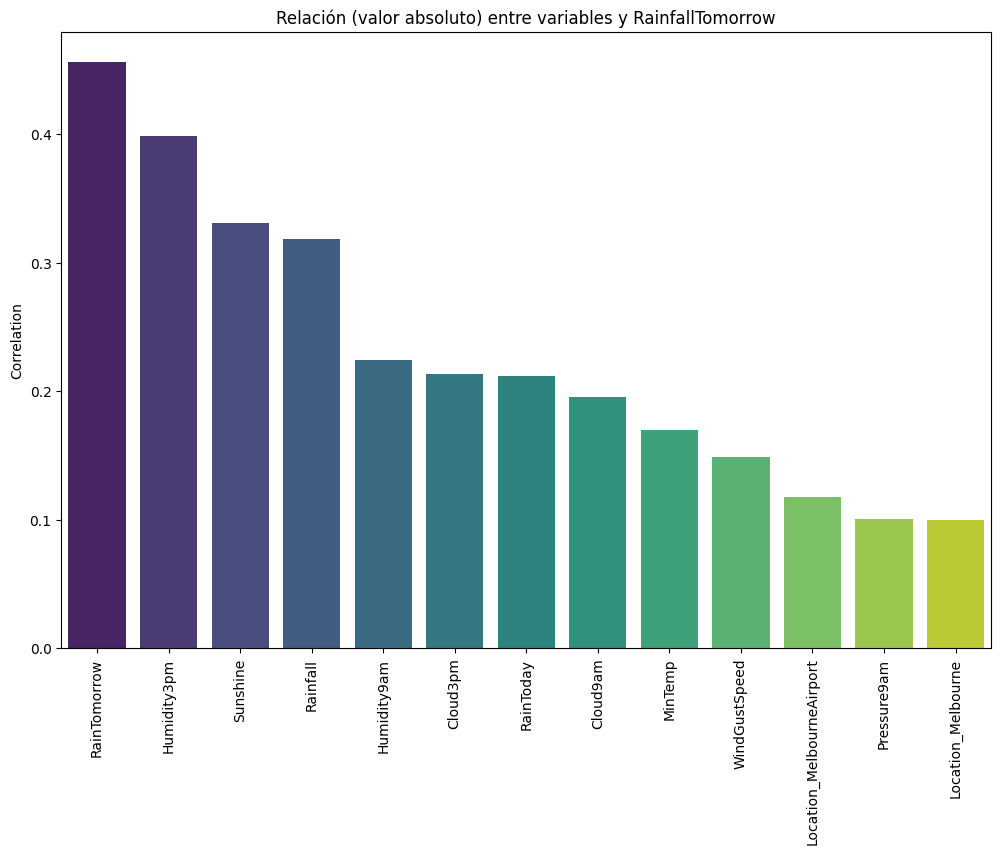

In [ ]:
correlated_vars = correlated_variables(train_dataset, 'RainfallTomorrow', 0.1)
plot_correlation_graph(correlated_vars, 'RainfallTomorrow')

Dado el anterior grafico obtenemos que las variables con mar correlacion con RainfallTomorrow son:

*   RainTomorrow
*   Humidity3pm
*   Sunshine
*   Rainfall
*   Cloud3pm



# 6. Eleccion de features para nuestro modelo (feature engineering)

En base a todo lo previo que vimos anteriormente, vamos a realizar la seleccion de las caracteristicas de nuestro primer modelo de regresion lineal.

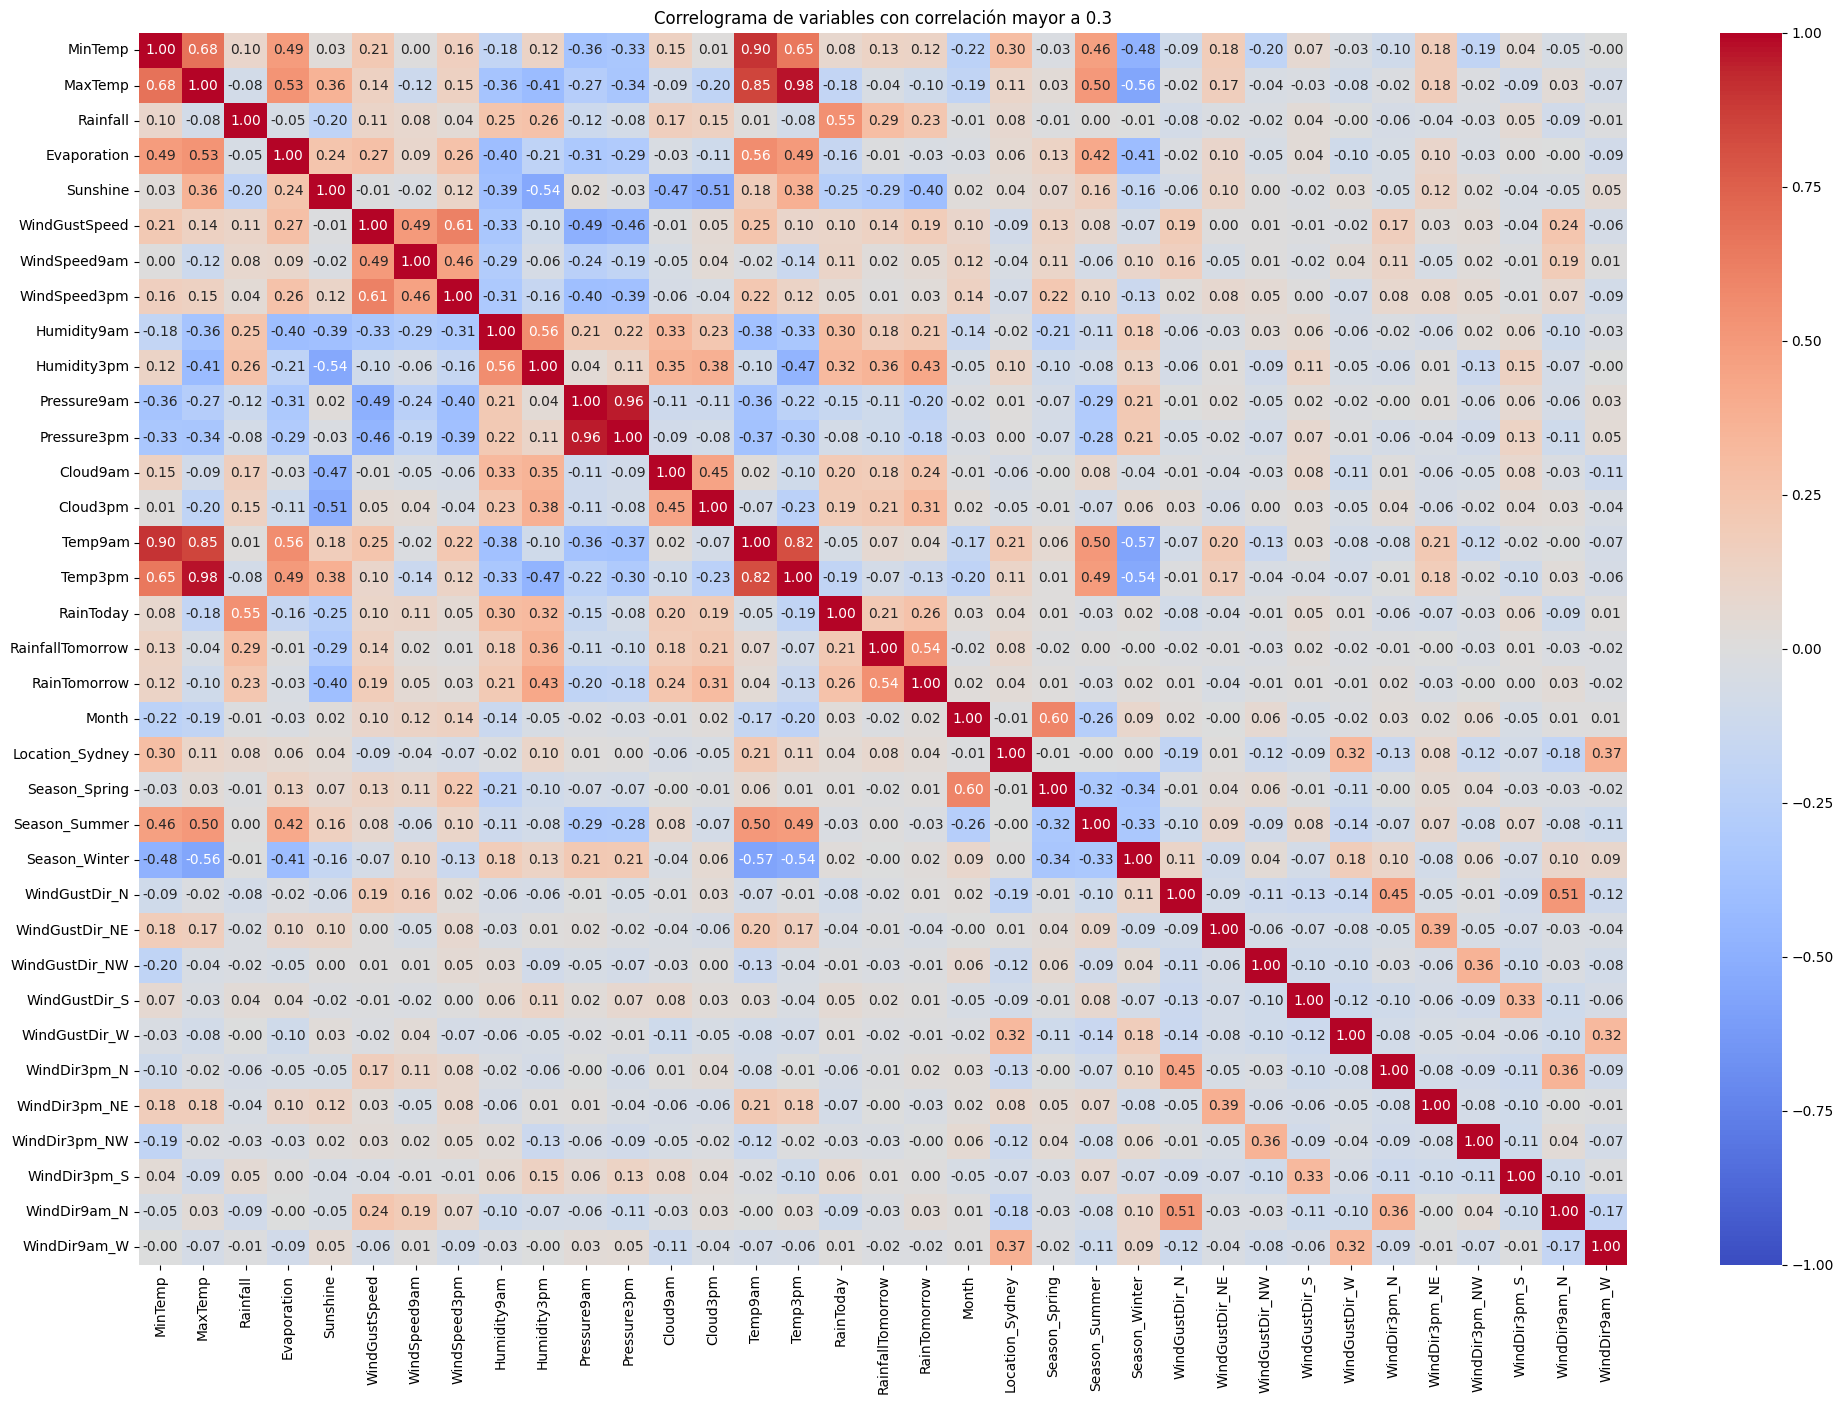

In [ ]:
def generate_correlogram(df, threshold = 0.4):
    # Calcula la matriz de correlación
    corr_matrix = df.corr()

    # Filtra las correlaciones mayores al umbral y diferentes de 1 (diagonal)
    high_corr = (corr_matrix.abs() > threshold) & (corr_matrix != 1)

    # Crea una matriz con True si hay una alta correlación y False en otro caso
    mask = high_corr.values

    # Establece las diagonales de la matriz en False
    for i in range(mask.shape[0]):
        mask[i, i] = False

    # Filtra las etiquetas de filas y columnas basadas en el filtro
    filtered_labels = [label for i, label in enumerate(corr_matrix.columns) if any(mask[i])]

    # Utiliza seaborn para crear el correlograma con etiquetas filtradas
    plt.figure(figsize=(24, 16))
    sns.heatmap(corr_matrix.loc[filtered_labels, filtered_labels], annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlograma de variables con correlación mayor a {threshold}')
    plt.show()

# Ejemplo de uso:
generate_correlogram(df_cp, 0.3)

#Regresion Lineal

In [ ]:
X_train.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainfallTomorrow', 'Month',
       'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Sydney',
       'Location_SydneyAirport', 'Season_Spring', 'Season_Summer',
       'Season_Winter', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N',
       'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW',
       'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE',
       'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW',
       'WindGustDir_WSW', 'WindDir3pm_ENE', 'WindDir3pm_ESE', 'WindDir3pm_N',
       'WindDir3pm_NE', 'WindDir3pm_NNE', 'WindDir3pm_NNW', 'WindDir3pm_NW',
       'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE', 'WindDir3pm_SSW',
       'WindDir3pm_SW', 'WindDir3pm_W'

###Primer modelo:

Para este primer modelo utilizaremos aquellas variables que consideramos utiles. Por eemplo en aquellas variables que tienen 2 horas diferentes del dia solamente utilizaremos las de las 3pm y en temperatura la minima del dia.

In [ ]:
primer_modelo = train_dataset[['MinTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed3pm',
       'Humidity3pm', 'Pressure3pm', 'Cloud3pm',
        'Temp3pm', 'RainToday', 'RainfallTomorrow', 'Month',
       'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Sydney',
       'Location_SydneyAirport', 'Season_Spring', 'Season_Summer',
       'Season_Winter']]


X_train_reg1 = primer_modelo[['MinTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed3pm',
       'Humidity3pm', 'Pressure3pm', 'Cloud3pm',
        'Temp3pm', 'RainToday', 'Month',
       'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Sydney',
       'Location_SydneyAirport', 'Season_Spring', 'Season_Summer',
       'Season_Winter']]
y_train_reg1 = primer_modelo['RainfallTomorrow']

In [ ]:
X_test_reg1=X_test[['MinTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed3pm',
       'Humidity3pm', 'Pressure3pm', 'Cloud3pm',
        'Temp3pm', 'RainToday', 'Month',
       'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Sydney',
       'Location_SydneyAirport', 'Season_Spring', 'Season_Summer',
       'Season_Winter']]

Y_test_reg1=X_test["RainfallTomorrow"]

In [ ]:
# Crear y ajustar el modelo de regresión lineal
reg = LinearRegression()
reg.fit(X_train_reg1, y_train_reg1)

LinearRegression()

In [ ]:
y_pred = reg.predict(X_test_reg1)

In [ ]:
# Calcular métricas de evaluación

mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse.round(4))

mae=mean_absolute_error(y_test, y_pred)
print("MAE:",mae.round(4))

reg.score(X_train_reg1,y_train_reg1), reg.score(X_test_reg1,Y_test_reg1)
print(f"""El R² para los datos de entrenamiento es: {reg.score(X_train_reg1,y_train_reg1).round(4)} y para los de testeo: {reg.score(X_test_reg1,Y_test_reg1)}""")

mape = (mae / (y_test)).mean() * 100
print("MAPE:",mape.round(4))

Error cuadrático medio: 21.8154
MAE: 3.4932
El R² para los datos de entrenamiento es: 0.2753 y para los de testeo: 0.12303536693097694
MAPE: inf


###Segundo modelo:

Para este segundo modelo utilizaremos las variables cuya correlacion es mayor a 0.2, paea esto utilizamos la funcion correlated_variables para obtener una lista de las mismas

In [ ]:
selected_features = list(correlated_variables(X_test, 'RainfallTomorrow', 0.2).keys())

tercer_modelo = X_test[selected_features + ['RainfallTomorrow']]

columnas_numericas = tercer_modelo.select_dtypes(include=['float64']).columns.tolist()

scaler = StandardScaler()

tercer_modelo[columnas_numericas] = scaler.fit_transform(X_test[columnas_numericas])

X_train_reg2 = tercer_modelo[selected_features]
y_train_reg2 = tercer_modelo[['RainfallTomorrow']]

In [ ]:
X_test_reg2=X_test[selected_features]
y_test_reg2=X_test["RainfallTomorrow"]
scaler = StandardScaler()
X_test_reg2=scaler.fit_transform(X_test_reg2)
y_test_reg2=scaler.fit_transform(y_test_reg2.to_numpy().reshape(-1,1))

In [ ]:
reg2 = LinearRegression()
reg2.fit(X_train_reg2, y_train_reg2)

LinearRegression()

In [ ]:
y_pred_reg2 = reg2.predict(X_test_reg2)

In [ ]:
mse = mean_squared_error(y_test_reg2, y_pred_reg2)
print("Error cuadrático medio:", mse.round(4))

mae=mean_absolute_error(y_test_reg2, y_pred_reg2)
print("MAE:",mae.round(4))

reg2.score(X_train_reg2,y_train_reg2), reg2.score(X_test_reg2,y_test_reg2)
print(f"El R² para los datos de entrenamiento es: {reg2.score(X_train_reg2,y_train_reg2)} y para los de testeo: { reg2.score(X_test_reg2,y_test_reg2).round(4)}")

mape = (mae / (y_test_reg2)).mean() * 100
print("MAPE:",mape.round(4))

Error cuadrático medio: 0.8933
MAE: 0.4518
El R² para los datos de entrenamiento es: 0.10668409327343809 y para los de testeo: 0.1067
MAPE: -170.5657


### Tercer modelo

Para este tercer modelo utilizamos todas las variables

In [ ]:
X_train_reg3 = X_train.drop('RainfallTomorrow', axis=1)
y_train_reg3 = X_train['RainfallTomorrow']

In [ ]:
X_test_reg3=X_test.drop('RainfallTomorrow', axis=1)
y_test_reg3=X_test["RainfallTomorrow"]

In [ ]:
reg3 = LinearRegression()
reg3.fit(X_train_reg3, y_train_reg3)

LinearRegression()

In [ ]:
y_pred_reg3 = reg3.predict(X_test_reg3)

print("Predicciones: {}, Valores actuales: {}".format(y_pred[:5], y_test[:5]))

Predicciones: [ 6.01317131  0.58626251  2.09342714 16.81377233  7.62692454], Valores actuales: 36428    0
45934    0
33932    0
68485    1
35810    1
Name: RainTomorrow, dtype: int64


Obtenemos el Error Cuadratico Medio (Mean Squared Error): Esta metrica mide el promedio de los cuadrados de las diferencias entre los valores reales y las predicciones del modelo

In [ ]:
mse = mean_squared_error(y_test_reg3, y_pred_reg3)
print("Error cuadrático medio:", mse.round(4))

Error cuadrático medio: 38.5999


Calculamos el Error Absoluto Medio (Mean Absolute Error) es similar al MSE pero en vez de elevar al cuadrado, toma el valor absoluto de las diferencias entre los valores reales y las predicciones

In [ ]:
mae=mean_absolute_error(y_test_reg3, y_pred_reg3)
print("MAE:",mae.round(4))

MAE: 3.4448


Ahora obtenemos el Coeficiente de determinacion R². Este se utiliza para calcular la puntuacion de precision del modelo en un conjunto de datos. La puntuacion suele representar que tan bien se ajusta el modelo a los datos reales.


*   R² =1 El modelo explica perfectamente toda la variabilidad en la variable dependiente
*   R² = 0: El modelo no explica nada de la variabilidad en la variable dependiente.

Lo hacemos para los datos de testeo y entrenamiento

In [ ]:
reg3.score(X_train_reg3,y_train_reg3), reg3.score(X_test_reg3,y_test_reg3)
print(f"El R² para los datos de entrenamiento es: {reg3.score(X_train_reg3,y_train_reg3).round(4)} y para los de testeo: {reg3.score(X_test_reg3,y_test_reg3).round(4)}")

El R² para los datos de entrenamiento es: 0.2965 y para los de testeo: 0.1541


El MAPE mide el porcentaje promedio de error en las predicciones en relación con los valores reales. Cuanto menor sea el MAPE, mejor será el modelo de predicción.

In [ ]:
mape = (mae / (y_test_reg3)).mean() * 100
print("MAPE:",mape.round(4))

MAPE: inf


RMSE (Error Cuadrático Medio de la Raíz):

El RMSE mide la raíz cuadrada del error cuadrático promedio entre las predicciones y los valores reales. Cuanto menor sea el RMSE, mejor será el modelo

In [ ]:
rmse = np.sqrt(mse)
print("RMSE:",rmse.round(4))

RMSE: 6.2129


#Metodos de regularizacion

definimos los metodos que vamos a usar: Lasso, Ridge y ElasticNet

In [ ]:
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=0.1)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

## Lasso

In [ ]:
lasso.fit(X_train_reg3,y_train_reg3)

Lasso(alpha=0.1)

In [ ]:
lasso.score(X_train_reg3,y_train_reg3)

0.27602448582485606

In [ ]:
y_pred_lasso = lasso.predict(X_test_reg3)

mae = mean_absolute_error(y_test_reg3, y_pred_lasso)
mse = mean_squared_error(y_test_reg3, y_pred_lasso)
rmse = np.sqrt(mse)
mape = (mae / y_test_reg3).mean() * 100

print("MAE:", mae.round(4))
print("MSE:", mse.round(4))
print("RMSE:",rmse.round(4))
print("MAPE:",mape.round(4))
print(lasso.score(X_test_reg3,y_test_reg3).round(4),lasso.score(X_train_reg3,y_train_reg3).round(4))
print("Predicciones: {}, Valores actuales: {}".format(y_pred_lasso[:5], y_test_reg3[:5]))

MAE: 3.6718
MSE: 39.9477
RMSE: 6.3204
MAPE: inf
0.1245 0.276
Predicciones: [ 6.70780768  0.67675529  3.03093485 17.14675137  7.13445191], Valores actuales: 36428     0.0
45934     0.0
33932     0.0
68485    25.6
35810     1.2
Name: RainfallTomorrow, dtype: float64


## Ridge

In [ ]:
ridge.fit(X_train_reg3,y_train_reg3)

Ridge(alpha=0.1)

In [ ]:
ridge.score(X_train_reg3,y_train_reg3)

0.2964924877734312

In [ ]:
y_pred_ridge = ridge.predict(X_test_reg3)

mae = mean_absolute_error(y_test_reg3, y_pred_ridge)
mse = mean_squared_error(y_test_reg3, y_pred_ridge)
rmse = np.sqrt(mse)
mape = (mae / y_test_reg3).mean() * 100

print("MAE:", mae.round(4))
print("MSE:", mse.round(4))
print("RMSE:",rmse.round(4))
print("MAPE:",mape.round(4))
print(ridge.score(X_test_reg3,y_test_reg3).round(4),ridge.score(X_train_reg3,y_train_reg3).round(4))
print("Predicciones: {}, Valores actuales: {}".format(y_pred_ridge[:5], y_test_reg3[:5]))

MAE: 3.4448
MSE: 38.5999
RMSE: 6.2129
MAPE: inf
0.1541 0.2965
Predicciones: [ 3.83492818  1.19968071  0.41097211 14.45396296  7.44051597], Valores actuales: 36428     0.0
45934     0.0
33932     0.0
68485    25.6
35810     1.2
Name: RainfallTomorrow, dtype: float64


## ElasticNet

In [ ]:
elasticnet.fit(X_train_reg3,y_train_reg3)

ElasticNet(alpha=0.1)

In [ ]:
elasticnet.score(X_train_reg3,y_train_reg3)

0.27894528294659404

In [ ]:
y_pred_elasticnet = elasticnet.predict(X_test_reg3)

mae = mean_absolute_error(y_test_reg3, y_pred_elasticnet)
mse = mean_squared_error(y_test_reg3, y_pred_elasticnet)
rmse = np.sqrt(mse)
mape = (mae / y_test_reg3).mean() * 100

print("MAE:", mae.round(4))
print("MSE:", mse.round(4))
print("RMSE:",rmse.round(4))
print("MAPE:",mape.round(4))
print(elasticnet.score(X_test_reg3,y_test_reg3).round(4),elasticnet.score(X_train_reg3,y_train_reg3).round(4))
print("Predicciones: {}, Valores actuales: {}".format(y_pred_elasticnet[:5], y_test_reg3[:5]))

MAE: 3.6547
MSE: 39.8168
RMSE: 6.3101
MAPE: inf
0.1274 0.2789
Predicciones: [ 6.36585194  0.96675968  2.78975591 16.66786725  7.23464835], Valores actuales: 36428     0.0
45934     0.0
33932     0.0
68485    25.6
35810     1.2
Name: RainfallTomorrow, dtype: float64


# Gradiente descendiente

In [ ]:
def gradient_descent(X_train: np.ndarray, y_train: np.ndarray, X_test: np.ndarray,
                     y_test: np.ndarray, theta: np.ndarray, learning_rate: float,
                     num_iterations: int) -> (np.ndarray, list, list):
    N_train = len(y_train)
    N_test = len(y_test)
    train_errors = []
    test_errors = []

    for epoch in range(num_iterations):
        y_hat_train = X_train.dot(theta)
        gradient = (-2 / N_train) * X_train.T.dot(y_train - y_hat_train)
        theta -= learning_rate * gradient

        train_error = np.mean((y_train - y_hat_train) ** 2)
        train_errors.append(train_error)

        y_hat_test = X_test.dot(theta)
        test_error = np.mean((y_test - y_hat_test) ** 2)
        test_errors.append(test_error)

    return theta, train_errors, test_errors


In [ ]:
#X_train, y_train escalado para descenso del gradiente
df_gradient = X_train[['MinTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed3pm',
       'Humidity3pm', 'Pressure3pm', 'Cloud3pm',
        'Temp3pm', 'RainToday', 'Month',
       'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Sydney',
       'Location_SydneyAirport', 'Season_Spring', 'Season_Summer',
       'Season_Winter'] + ['RainfallTomorrow']]

columnas_numericas = df_gradient.select_dtypes(include=['float64']).columns.tolist()

scaler = StandardScaler()

df_gradient[columnas_numericas] = scaler.fit_transform(X_train[columnas_numericas])

X_train_dg = df_gradient.drop(columns=['RainfallTomorrow'])
y_train_dg = df_gradient['RainfallTomorrow']



In [ ]:
#X_test,y_test escaldo para descenso del graidente
df_gradient = X_test[['MinTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed3pm',
       'Humidity3pm', 'Pressure3pm', 'Cloud3pm',
        'Temp3pm', 'RainToday', 'Month',
       'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Sydney',
       'Location_SydneyAirport', 'Season_Spring', 'Season_Summer',
       'Season_Winter'] + ['RainfallTomorrow']]

columnas_numericas = df_gradient.select_dtypes(include=['float64']).columns.tolist()

scaler = StandardScaler()

df_gradient[columnas_numericas] = scaler.fit_transform(X_test[columnas_numericas])

X_test_dg = df_gradient.drop(columns=['RainfallTomorrow'])
y_test_dg = df_gradient['RainfallTomorrow']

In [ ]:
scaler = StandardScaler()
X_train_dg = scaler.fit_transform(X_train_dg)
X_test_dg = scaler.fit_transform(X_test_dg)


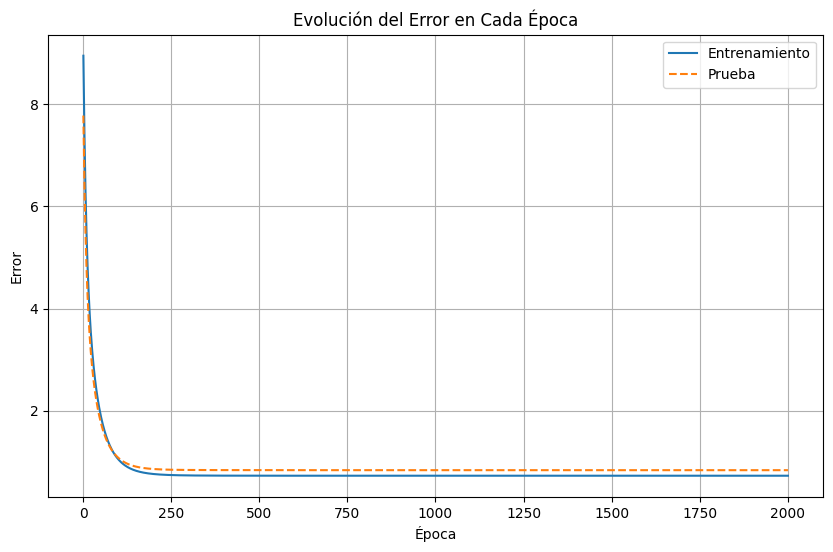

In [ ]:

learning_rate = 0.01
num_iterations = 2000

theta_inicial = np.random.rand(X_train_dg.shape[1])

theta_optimo, train_errors, test_errors = gradient_descent(X_train_dg, y_train_dg, X_test_dg, y_test_dg, theta_inicial, learning_rate, num_iterations)

epocas = list(range(1, num_iterations + 1))

plt.figure(figsize=(10, 6))
plt.plot(epocas, train_errors, label='Entrenamiento',  linestyle='-')
plt.plot(epocas, test_errors, label='Prueba',  linestyle='--')
plt.title('Evolución del Error en Cada Época')
plt.xlabel('Época')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Realizar predicciones en el conjunto de entrenamiento y prueba
y_train_pred_dg = X_train_dg.dot(theta_optimo)
y_test_pred_dg = X_test_dg.dot(theta_optimo)

# Calcular R2 Score
r2_train = r2_score(y_train_dg, y_train_pred_dg)
r2_test = r2_score(y_test_dg, y_test_pred_dg)

# Calcular MSE
mse_train = mean_squared_error(y_train_dg, y_train_pred_dg)
mse_test = mean_squared_error(y_test_dg, y_test_pred_dg)

# Calcular RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Calcular MAE
mae_train = mean_absolute_error(y_train_dg, y_train_pred_dg)
mae_test = mean_absolute_error(y_test_dg, y_test_pred_dg)

# Calcular MAPE
mape_train = np.mean(np.abs((y_train_dg - y_train_pred_dg) / y_train_dg)) * 100
mape_test = np.mean(np.abs((y_test_dg - y_test_pred_dg) / y_test_dg)) * 100

# Imprimir las métricas
print(f'R2 Score en entrenamiento: {r2_train.round(4)}, en prueba: {r2_test.round(4)}')
print(f'MSE en entrenamiento: {mse_train.round(4)}, en prueba: {mse_test.round(4)}')
print(f'RMSE en entrenamiento: {rmse_train.round(4)}, en prueba: {rmse_test.round(4)}')
print(f'MAE en entrenamiento: {mae_train.round(4)}, en prueba: {mae_test.round(4)}')
print(f'MAPE en entrenamiento: {mape_train.round(4)}%, en prueba: {mape_test.round(4)}%')

R2 Score en entrenamiento: 0.2753, en prueba: 0.1666
MSE en entrenamiento: 0.7247, en prueba: 0.8334
RMSE en entrenamiento: 0.8513, en prueba: 0.9129
MAE en entrenamiento: 0.47, en prueba: 0.4534
MAPE en entrenamiento: 329.0369%, en prueba: 200.91%


#Regresion Logistica

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

##Primer Modelo

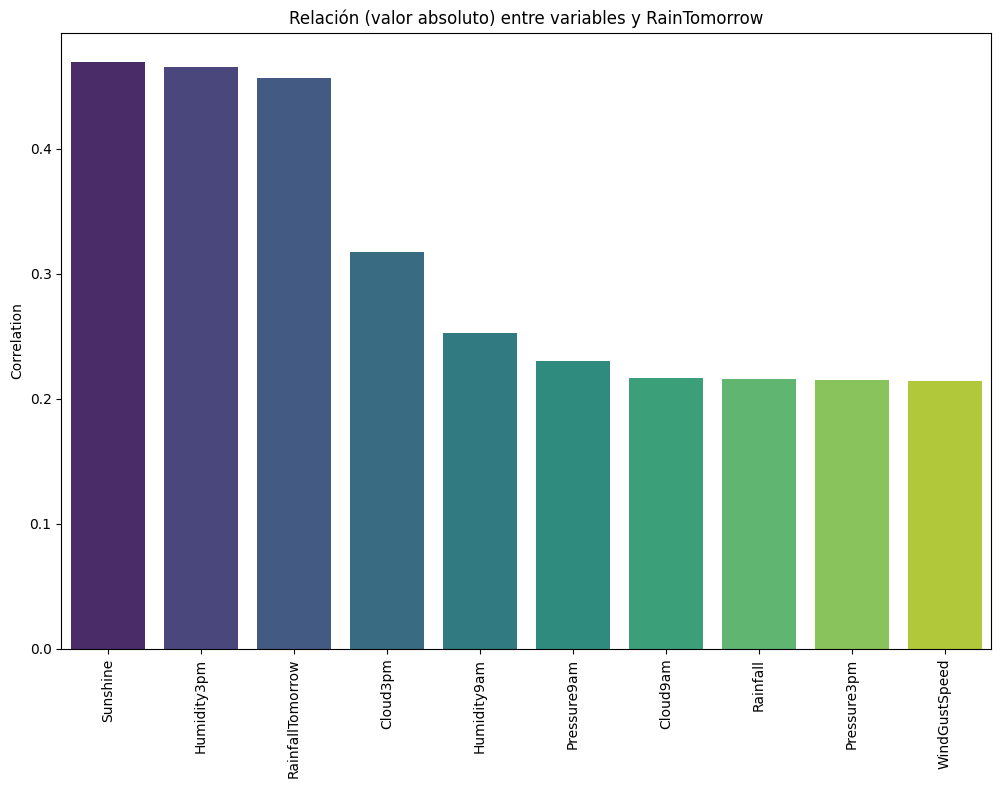

In [ ]:
correlated_vars = correlated_variables(train_dataset, 'RainTomorrow', 0.2)
plot_correlation_graph(correlated_vars, 'RainTomorrow')

In [ ]:
X_train_log1 = X_train[['Rainfall','Sunshine','WindGustSpeed','Humidity3pm', 'Pressure9am', 'Cloud9am','RainToday']]
y_train_log1 = y_train
X_test_log1=X_test[['Rainfall','Sunshine','WindGustSpeed','Humidity3pm', 'Pressure9am', 'Cloud9am','RainToday']]
y_test_log1=y_test

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [ ]:
# Inicializar y entrenar un modelo de regresión logística
log1 = LogisticRegression(random_state=42)
log1.fit(X_train_log1, y_train_log1)

# Realizar predicciones en el conjunto de prueba
y_pred_log1 = log1.predict(X_test_log1)

In [ ]:
print("Predicciones: {}, Valores actuales: {}".format(y_pred_log1[:5], y_test_log1[:5]))

Predicciones: [0 0 0 1 1], Valores actuales: 36428    0
45934    0
33932    0
68485    1
35810    1
Name: RainTomorrow, dtype: int64


In [ ]:
y_probs_log1 = log1.predict_proba(X_test_log1)[:, 1]

In [ ]:
fpr_log1, tpr_log1, thresholds_log1 = roc_curve(y_test_log1, y_probs_log1)
roc_auc_log1 = auc(fpr_log1, tpr_log1)

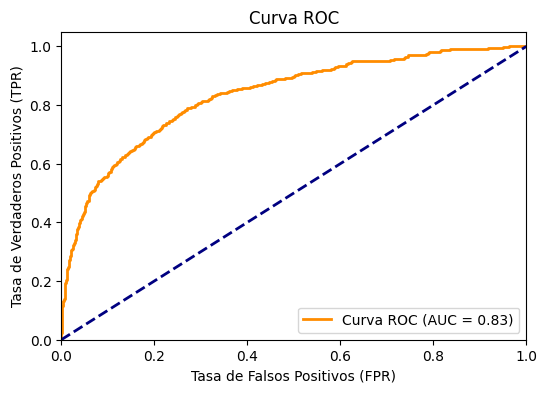

In [ ]:
# Grafico la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr_log1, tpr_log1, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc_log1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

Accuracy

Representa la cantidad de aciertos del modelo respecto del total de datos.

Es una buena métrica para problemas cuyos dataset están balanceados.

In [ ]:
precision_log1 = accuracy_score(y_test_log1, y_pred_log1)
print("Precisión del modelo:", precision_log1.round(4))

Precisión del modelo: 0.7573


Recall

Representa, dentro de la misma clase, cuántas fueron correctamente clasificadas. El recall mide la capacidad del modelo para identificar todos los casos positivos en el conjunto de datos.

Donde:

1. Verdaderos Positivos (TP) son los casos en los que el modelo predijo correctamente la clase positiva.
2. Falsos Negativos (FN) son los casos en los que el modelo predijo incorrectamente la clase negativa cuando la verdadera clase era positiva.


In [ ]:
recall_p_log1 = recall_score(y_test_log1, y_pred_log1,pos_label=1)
print("Recall del modelo para la clase positiva:", recall_p_log1.round(4))

Recall del modelo para la clase positiva: 0.749


In [ ]:
recall_n_log1 = recall_score(y_test_log1, y_pred_log1,pos_label=0)
print("Recall del modelo para la clase negativa:", recall_n_log1.round(4))

Recall del modelo para la clase negativa: 0.7599


Precision

De las clases que se han clasificado como positivas, indica cuántas realmente lo son.

A menores falsos positivos, mayor la precisión.


In [ ]:
precision_p_log1 = precision_score(y_test_log1, y_pred_log1, pos_label=1)
print("Precisión para la clase positiva:", precision_p_log1.round(4))

Precisión para la clase positiva: 0.4987


In [ ]:
precision_n_log1 = precision_score(y_test_log1, y_pred_log1, pos_label=0)
print("Precisión para la clase negativa:", precision_n_log1.round(4))

Precisión para la clase negativa: 0.9047


F1 Score

Podría ser bueno considerar una métrica que tenga en cuenta tanto la precisión como el recall.

Se utiliza una media armónica

F1 = 2 * ((recall * precision)/(recall + precision))

In [ ]:
f1_p_log1 = f1_score(y_test_log1, y_pred_log1,pos_label=1)
print("Puntaje F1 para la clase positiva:", f1_p_log1.round(4))

Puntaje F1 para la clase positiva: 0.5987


In [ ]:
f1_n_log1 = f1_score(y_test_log1, y_pred_log1,pos_label=0)
print("Puntaje F1 para la clase negativa:", f1_n_log1.round(4))

Puntaje F1 para la clase negativa: 0.826


Area Under Curve

Mientras más cercano esté a 1, implica que la curva ROC está más cerca de contener al punto (0,1).

Si es 0.5, el modelo es tan malo como predecir random.


In [ ]:
auc_score_log1 = roc_auc_score(y_test_log1, y_probs_log1)
print("AUC (Área bajo la Curva ROC):", auc_score_log1.round(4))

AUC (Área bajo la Curva ROC): 0.8339


##Segundo modelo

In [ ]:
selected_features_log2 = list(correlated_variables(df_cp, 'RainTomorrow', 0.05).keys())

In [ ]:
selected_features_log2 = [columna for columna in selected_features if columna != 'RainfallTomorrow']

In [ ]:
regresion_log = train_dataset[selected_features_log2 + ['RainTomorrow']]

columnas_numericas = regresion_log.select_dtypes(include=['float64']).columns.tolist()

scaler = StandardScaler()

regresion_log[columnas_numericas] = scaler.fit_transform(train_dataset[columnas_numericas])

X_train_log2 = regresion_log[selected_features_log2]
y_train_log2 = regresion_log['RainTomorrow']

In [ ]:
regresion_log = test_dataset[selected_features_log2 + ['RainTomorrow']]

columnas_numericas = regresion_log.select_dtypes(include=['float64']).columns.tolist()

scaler = StandardScaler()

regresion_log[columnas_numericas] = scaler.fit_transform(test_dataset[columnas_numericas])

X_test_log2 = regresion_log[selected_features_log2]
y_test_log2 = regresion_log['RainTomorrow']

In [ ]:
model_log_2 = LogisticRegression(random_state=42)
model_log_2.fit(X_train_log2, y_train_log2)

# Realizar predicciones en el conjunto de prueba
y_pred_log2 = model_log_2.predict(X_test_log2)

In [ ]:
y_probs_log2 = model_log_2.predict_proba(X_test_log2)[:, 1]

In [ ]:
fpr_log2, tpr_log2, thresholds_log2 = roc_curve(y_test_log2, y_probs_log2)
roc_auc_log2 = auc(fpr_log2, tpr_log2)

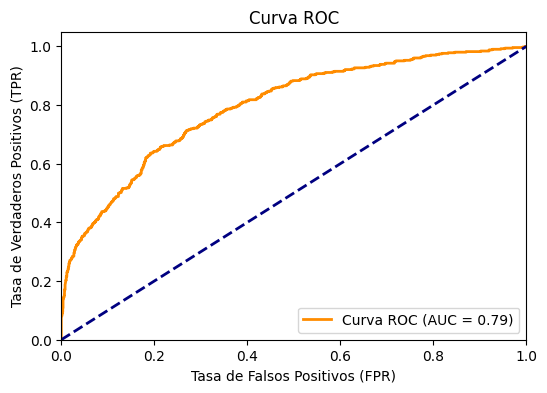

In [ ]:
# Grafico la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr_log2, tpr_log2, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc_log2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
precision_log2 = accuracy_score(y_test_log2, y_pred_log2)
print("Precisión del modelo:", precision_log2.round(4))

Precisión del modelo: 0.7549


In [ ]:
recall_p_log2 = recall_score(y_test_log2, y_pred_log2,pos_label=1)
print("Recall del modelo para la clase positiva:", recall_p_log2.round(4))

Recall del modelo para la clase positiva: 0.6561


In [ ]:
recall_n_log2 = recall_score(y_test_log2, y_pred_log2,pos_label=0)
print("Recall del modelo para la clase negativa:", recall_n_log2.round(4))

Recall del modelo para la clase negativa: 0.7864


In [ ]:
precision_p_log2 = precision_score(y_test_log2, y_pred_log2, pos_label=1)
print("Precisión para la clase positiva:", precision_p_log2.round(4))

Precisión para la clase positiva: 0.4948


In [ ]:
precision_n_log2 = precision_score(y_test_log2, y_pred_log2, pos_label=0)
print("Precisión para la clase negativa:", precision_n_log2.round(4))

Precisión para la clase negativa: 0.8776


In [ ]:
f1_p_log2 = f1_score(y_test_log2, y_pred_log2,pos_label=1)
print("Puntaje F1 para la clase positiva:", f1_p_log2.round(4))

Puntaje F1 para la clase positiva: 0.5641


In [ ]:
f1_n_log2 = f1_score(y_test_log2, y_pred_log2,pos_label=0)
print("Puntaje F1 para la clase negativa:", f1_n_log2.round(4))

Puntaje F1 para la clase negativa: 0.8295


In [ ]:
auc_score_log2 = roc_auc_score(y_test_log2, y_probs_log2)
print("AUC (Área bajo la Curva ROC):", auc_score_log2.round(4))

AUC (Área bajo la Curva ROC): 0.7943


##Tercer modelo

In [ ]:
X_train_log3=X_train.drop("RainfallTomorrow",axis=1)
y_train_log3=y_train
X_test_log3=X_test.drop("RainfallTomorrow",axis=1)
y_test_log3=y_test

In [ ]:
columns_to_scale = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                     'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                     'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                     'Temp9am', 'Temp3pm', 'RainToday', 'Month']


scaler = StandardScaler()
X_train_log3[columns_to_scale] = scaler.fit_transform(X_train_log3[columns_to_scale])

# Aplicar la misma transformación a X_test
X_test_log3[columns_to_scale] = scaler.transform(X_test_log3[columns_to_scale])

In [ ]:
model_log_3 = LogisticRegression(random_state=42)
model_log_3.fit(X_train_log3, y_train_log3)

# Realizar predicciones en el conjunto de prueba
y_pred_log3 = model_log_3.predict(X_test_log3)

In [ ]:
y_probs_log3 = model_log_3.predict_proba(X_test_log3)[:, 1]

In [ ]:
fpr_log3, tpr_log3, thresholds_log3 = roc_curve(y_test_log3, y_probs_log3)
roc_auc_log3 = auc(fpr_log3, tpr_log3)

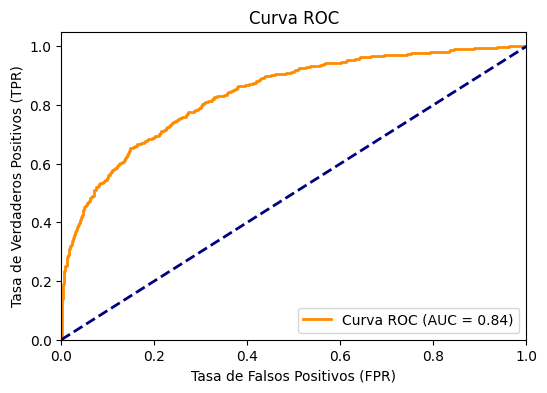

In [ ]:
# Grafico la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr_log3, tpr_log3, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc_log3)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
precision_log3 = accuracy_score(y_test_log3, y_pred_log3)
print("Precisión del modelo:", precision_log3.round(4))

Precisión del modelo: 0.8184


In [ ]:
recall_p_log3 = recall_score(y_test_log3, y_pred_log3,pos_label=1)
print("Recall del modelo para la clase positiva:", recall_p_log3)

Recall del modelo para la clase positiva: 0.541501976284585


In [ ]:
recall_n_log3 = recall_score(y_test_log3, y_pred_log3,pos_label=0)
print("Recall del modelo para la clase negativa:", recall_n_log3)

Recall del modelo para la clase negativa: 0.9067422810333964


In [ ]:
precision_p_log3 = precision_score(y_test_log3, y_pred_log3, pos_label=1)
print("Precisión para la clase positiva:", precision_p_log3)

Precisión para la clase positiva: 0.6492890995260664


In [ ]:
precision_n_log3 = precision_score(y_test_log3, y_pred_log3, pos_label=0)
print("Precisión para la clase negativa:", precision_n_log3)

Precisión para la clase negativa: 0.8611609814482346


In [ ]:
f1_p_log3 = f1_score(y_test_log3, y_pred_log3,pos_label=1)
print("Puntaje F1 para la clase positiva:", f1_p_log3)

Puntaje F1 para la clase positiva: 0.5905172413793103


In [ ]:
f1_n_log3 = f1_score(y_test_log3, y_pred_log3,pos_label=0)
print("Puntaje F1 para la clase negativa:", f1_n_log3)

Puntaje F1 para la clase negativa: 0.8833640270104358


In [ ]:
auc_score_log3 = roc_auc_score(y_test_log3, y_probs_log3)
print("AUC (Área bajo la Curva ROC):", auc_score_log3)

AUC (Área bajo la Curva ROC): 0.8381327037117289


# Modelos base


##Regresion lineal

In [ ]:
X_train_base = X_train[['Humidity3pm', 'Sunshine',"Rainfall","Cloud3pm","Humidity9am"]]
y_train_base = X_train['RainfallTomorrow']
X_test_base = X_test[['Humidity3pm', 'Sunshine',"Rainfall","Cloud3pm","Humidity9am"]]
y_test_base = X_test['RainfallTomorrow']

regression_model_base = LinearRegression()

regression_model_base.fit(X_train_base, y_train_base)

y_pred_base = regression_model_base.predict(X_test_base)

mse = mean_squared_error(y_test_base, y_pred_base)
print("Error cuadrático medio:", mse.round(4))

mae_base=mean_absolute_error(y_test_base, y_pred_base)
print("MAE:",mae_base.round(4))

regression_model_base.score(X_train_base,y_train_base), regression_model_base.score(X_test_base,y_test_base)
print(f"""El R² para los datos de entrenamiento es: {regression_model_base.score(X_train_base,y_train_base).round(4)} y para los de testeo: {regression_model_base.score(X_test_base,y_test_base).round(4)}""")

mape_base = (mae_base / (y_test_base)).mean() * 100
print("MAPE:",mape_base.round(4))

Error cuadrático medio: 44.9078
MAE: 4.0726
El R² para los datos de entrenamiento es: 0.2161 y para los de testeo: 0.0158
MAPE: inf


Como vemos anteriormente, este modelo lo superamos con todos los que armamos

##Regresion Logistica


In [ ]:

X_train_lbase = X_train[['Humidity3pm', 'Sunshine',"Rainfall","Cloud3pm","Humidity9am"]]
y_train_lbase = y_train
X_test_lbase=X_test[['Humidity3pm', 'Sunshine',"Rainfall","Cloud3pm","Humidity9am"]]
y_test_lbase=y_test




# Inicializar el modelo de regresión logística
logistic_model_lbase = LogisticRegression()

# Ajustar el modelo a los datos de entrenamiento
logistic_model_lbase.fit(X_train_lbase, y_train_lbase)

# Realizar predicciones en el conjunto de prueba
y_pred_lbase = logistic_model_lbase.predict(X_test_lbase)

# Calcular la precisión para evaluar el modelo
accuracy_lbase = accuracy_score(y_test_lbase, y_pred_lbase)
print("Precisión:", accuracy_lbase)

recall_p_lbase = recall_score(y_test_lbase, y_pred_lbase,pos_label=1)
print("Recall del modelo para la clase positiva:", recall_p_lbase.round(4))

recall_n_lbase = recall_score(y_test_lbase, y_pred_lbase,pos_label=0)
print("Recall del modelo para la clase negativa:", recall_n_lbase.round(4))

precision_p_lbase = precision_score(y_test_lbase, y_pred_lbase, pos_label=1)
print("Precisión para la clase positiva:", precision_p_lbase.round(4))

precision_n_lbase = precision_score(y_test_lbase, y_pred_lbase, pos_label=0)
print("Precisión para la clase negativa:", precision_n_lbase.round(4))

f1_p_lbase = f1_score(y_test_lbase, y_pred_lbase,pos_label=1)
print("Puntaje F1 para la clase positiva:", f1_p_lbase.round(4))

f1_n_lbase = f1_score(y_test_lbase, y_pred_lbase,pos_label=0)
print("Puntaje F1 para la clase negativa:", f1_n_lbase.round(4))


Precisión: 0.7195413282369804
Recall del modelo para la clase positiva: 0.7431
Recall del modelo para la clase negativa: 0.712
Precisión para la clase positiva: 0.4514
Precisión para la clase negativa: 0.8968
Puntaje F1 para la clase positiva: 0.5616
Puntaje F1 para la clase negativa: 0.7938


Como vemos estas metricas claramente tambien las superamos, las mismas al ser modelos base, no tienen todo el tratamiento previo que le dimos notros.

# Redes Neuronales

Para este modelo de arquitectura de red neuronal vamos a utilizar tensorflow

In [ ]:
!pip install tensorflow

## Redes neuronales para prediccion de cuanta lluvia

In [ ]:
X_train_rn1=X_train.drop(columns=["RainfallTomorrow"])
y_train_rn1=X_train["RainfallTomorrow"]
X_test_rn1=X_test.drop(columns=["RainfallTomorrow"])
y_test_rn1=X_test["RainfallTomorrow"]

In [ ]:
columns_to_scale = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                     'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                     'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                     'Temp9am', 'Temp3pm', 'RainToday', 'Month']


scaler = StandardScaler()
X_train_rn1[columns_to_scale] = scaler.fit_transform(X_train_rn1[columns_to_scale])
X_test_rn1[columns_to_scale] = scaler.fit_transform(X_test_rn1[columns_to_scale])
y_train_rn1=scaler.fit_transform(y_train_rn1.to_numpy().reshape(-1,1))
y_test_rn1=scaler.fit_transform(y_test_rn1.to_numpy().reshape(-1,1))


In [ ]:
model_rn1 = Sequential()
model_rn1.add(Dense(64, input_dim=X_train_rn1.shape[1], activation='leaky_relu'))
model_rn1.add(Dropout(0.05))
model_rn1.add(Dense(128, activation='leaky_relu'))
model_rn1.add(Dropout(0.05))
model_rn1.add(Dense(64, activation='leaky_relu'))
model_rn1.add(Dense(1, activation='linear'))

model_rn1.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

history_rn1 = model_rn1.fit(X_train_rn1, y_train_rn1, epochs=200, batch_size=32, validation_split=0.2)


Epoch 1/200
465/465 [==============================] - 4s 6ms/step - loss: 0.5200 - val_loss: 1.2781
Epoch 2/200
465/465 [==============================] - 2s 5ms/step - loss: 0.4421 - val_loss: 1.1412
Epoch 3/200
465/465 [==============================] - 1s 3ms/step - loss: 0.4196 - val_loss: 1.0840
Epoch 4/200
465/465 [==============================] - 1s 3ms/step - loss: 0.3968 - val_loss: 1.0636
Epoch 5/200
465/465 [==============================] - 1s 3ms/step - loss: 0.3731 - val_loss: 0.9952
Epoch 6/200
465/465 [==============================] - 2s 5ms/step - loss: 0.3503 - val_loss: 1.0384
Epoch 7/200
465/465 [==============================] - 2s 4ms/step - loss: 0.3407 - val_loss: 0.9700
Epoch 8/200
465/465 [==============================] - 2s 3ms/step - loss: 0.3215 - val_loss: 0.9027
Epoch 9/200
465/465 [==============================] - 1s 3ms/step - loss: 0.3118 - val_loss: 0.8577
Epoch 10/200
465/465 [==============================] - 1s 3ms/step - loss: 0.3022 - val_lo

66/66 [==============================] - 0s 2ms/step
R2 Score en test: 0.178
MSE en test: 0.822
RMSE en test: 0.9067
MAE en test: 0.3566



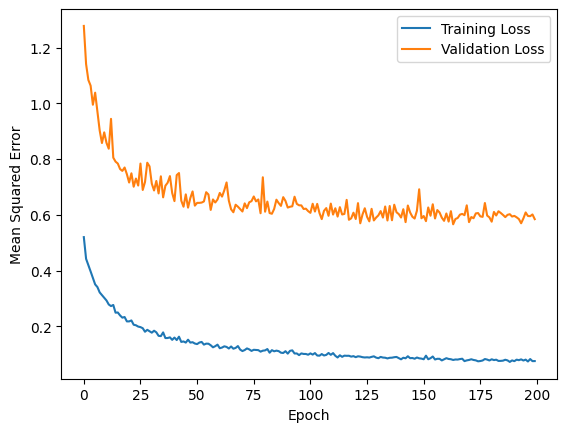

In [ ]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_pred_rn1 = model_rn1.predict(X_test_rn1)

y_test_np_rn1 = y_test_rn1.flatten()

r2_test_rn1 = r2_score(y_test_np_rn1, y_pred_rn1)

mse_test_rn1 = mean_squared_error(y_test_np_rn1, y_pred_rn1)

rmse_test_rn1 = np.sqrt(mse_test_rn1)

mae_test_rn1 = mean_absolute_error(y_test_np_rn1, y_pred_rn1)

print(f'R2 Score en test: {r2_test_rn1.round(4)}')
print(f'MSE en test: {mse_test_rn1.round(4)}')
print(f'RMSE en test: {rmse_test_rn1.round(4)}')
print(f'MAE en test: {mae_test_rn1.round(4)}\n')

loss_history_rn1 = history_rn1.history['loss']
val_loss_history_rn1 = history_rn1.history['val_loss']

plt.plot(loss_history_rn1, label='Training Loss')
plt.plot(val_loss_history_rn1, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


####Otro modelo de redes neuronales para regresion


In [ ]:
model_rn2 = Sequential()
model_rn2.add(Dense(64, input_dim=X_train_rn1.shape[1], activation='relu'))
model_rn2.add(Dropout(0.2))
model_rn2.add(Dense(32, activation='relu'))
model_rn2.add(Dropout(0.2))
model_rn2.add(Dense(1, activation='linear'))

model_rn2.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

model_rn2.fit(X_train_rn1, y_train_rn1, epochs=250, batch_size=32, validation_split=0.2)

y_pred_rn2 = model_rn2.predict(X_test_rn1)

y_test_np_rn2 = y_test_rn1.flatten()
r2_test_rn2 = r2_score(y_test_np_rn2, y_pred_rn2)
print(f"R2: {r2_test_rn2}")
mse_rn2 = mean_squared_error(y_test_rn1, y_pred_rn2)
print(f'Mean Squared Error on test set: {mse_rn2}')

Epoch 1/250
465/465 [==============================] - 2s 3ms/step - loss: 0.6950 - val_loss: 1.4142
Epoch 2/250
465/465 [==============================] - 1s 3ms/step - loss: 0.5459 - val_loss: 1.3327
Epoch 3/250
465/465 [==============================] - 2s 4ms/step - loss: 0.4974 - val_loss: 1.2592
Epoch 4/250
465/465 [==============================] - 1s 3ms/step - loss: 0.4683 - val_loss: 1.2089
Epoch 5/250
465/465 [==============================] - 2s 3ms/step - loss: 0.4606 - val_loss: 1.1792
Epoch 6/250
465/465 [==============================] - 2s 4ms/step - loss: 0.4354 - val_loss: 1.2122
Epoch 7/250
465/465 [==============================] - 2s 4ms/step - loss: 0.4195 - val_loss: 1.1195
Epoch 8/250
465/465 [==============================] - 2s 4ms/step - loss: 0.3975 - val_loss: 1.0853
Epoch 9/250
465/465 [==============================] - 2s 5ms/step - loss: 0.3882 - val_loss: 1.0850
Epoch 10/250
465/465 [==============================] - 3s 6ms/step - loss: 0.3638 - val_lo

In [ ]:
from sklearn.neural_network import MLPRegressor

class NeuralNetwork():
    def __init__(self):
        self.model = self.build_model()

    def build_model(self):
        model = MLPRegressor(
            hidden_layer_sizes=(64, 32),
            activation='relu',
            solver='adam',
            alpha=0.0001,
            batch_size='auto',
            learning_rate='constant',
            learning_rate_init=0.001,
            max_iter=1000,
            random_state=42
        )
        return model

    def fit(self, epochs=1000):


        history = self.model.fit(X_train_rn1, y_train_rn1)

        y_pred = self.model.predict(X_test_rn1)

        r2_test = r2_score(y_test_rn1, y_pred)
        mse = mean_squared_error(y_test_rn1, y_pred)

        print(f'R2 on test set: {r2_test}')
        print(f'Mean Squared Error on test set: {mse}')

        return history.loss_curve_

    def predict(self):
        predictions = self.model.predict(X_test_rn1)
        return predictions



In [ ]:
neural_network=NeuralNetwork()
loss_history=neural_network.fit(epochs=100)

R2 on test set: 0.024849413348142946
Mean Squared Error on test set: 0.975150586651857


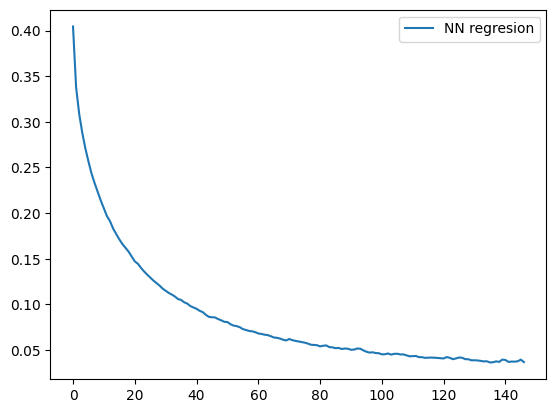

In [ ]:
plt.plot(loss_history, label='NN regresion')
plt.legend()
plt.show()

In [ ]:
predictions = neural_network.predict()
print("Predicciones:", predictions[:5],y_test[:5])

Predicciones: [ 0.23773223 -0.23275211 -0.34169867  2.87064701 -0.20351719] 36428    0
45934    0
33932    0
68485    1
35810    1
Name: RainTomorrow, dtype: int64


## Redes neuronales para clasificacion (llovera o no)

In [ ]:
X_train_rnc=X_train.drop(columns=["RainfallTomorrow"])
y_train_rnc=y_train
X_test_rnc=X_test.drop(columns=["RainfallTomorrow"])
y_test_rnc=y_test

In [ ]:
columns_to_scale = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                     'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                     'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                     'Temp9am', 'Temp3pm', 'RainToday', 'Month']


scaler = StandardScaler()
X_train_rnc[columns_to_scale] = scaler.fit_transform(X_train_rnc[columns_to_scale])
X_test_rnc[columns_to_scale] = scaler.fit_transform(X_test_rnc[columns_to_scale])

In [ ]:
y_test_rnc.value_counts()

0    1587
1     506
Name: RainTomorrow, dtype: int64

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
class NeuralNetwork_clas():
    def __init__(self):
        self.model = self.build_model()

    def build_model(self):
        model = Sequential()
        model.add(Dense(64, input_dim=X_train_rnc.shape[1], activation="relu"))
        model.add(Dropout(0.05))
        model.add(Dense(32, activation="relu"))
        model.add(Dropout(0.05))
        model.add(Dense(1, activation="sigmoid"))
        print("Shape of X_train_rnc:", X_train_rnc.shape)
        print("Shape of y_train_rnc:", y_train_rnc.shape)
        model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
        print("Cant parametros: ", model.count_params())
        return model

    def fit(self, X, y, lr=0.0001, epochs=1000):
        X = np.array(X)
        y = np.array(y)

        history = self.model.fit(X, y, epochs=epochs, verbose=0)

        y_pred_prob = self.model.predict(X_test_rnc)
        y_pred_classes = (y_pred_prob > 0.5).astype(int)

        accuracy = accuracy_score(y_test_rnc, y_pred_classes)
        confusion_mat = confusion_matrix(y_test_rnc, y_pred_classes)

        print(f'Accuracy on test set: {accuracy}')
        print(f'Confusion Matrix on test set:\n{confusion_mat}')

        return history.history["loss"]

    def predict(self, X):
        X = np.array(X)
        print("Shape of X_test_rnc:", X.shape)
        predictions_prob = self.model.predict(X)
        predictions_classes = (predictions_prob > 0.5).astype(int)
        return predictions_classes

In [ ]:
nn=NeuralNetwork_clas()
ls=nn.fit(X_train_rnc,y_train_rnc,lr=0.01,epochs=200)

Shape of X_train_rnc: (18562, 70)
Shape of y_train_rnc: (18562,)
Cant parametros:  6657
66/66 [==============================] - 0s 2ms/step
Accuracy on test set: 0.7998088867654085
Confusion Matrix on test set:
[[1339  248]
 [ 171  335]]


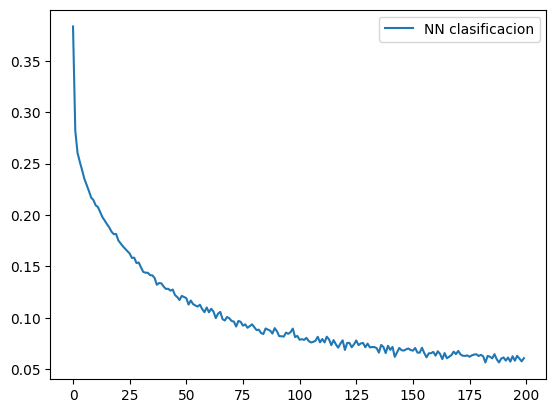

In [ ]:
plt.plot(ls, label='NN clasificacion')
plt.legend()
plt.show()

# Optimizacion de Hiperparametros

## Metodo Grid Search

Traemos el mejor modelo de regresion lineal que armamos

In [ ]:
X_train_gs = X_train.drop("RainfallTomorrow",axis=1)
y_train_gs = X_train['RainfallTomorrow']
X_test_gs=X_test.drop("RainfallTomorrow",axis=1)
y_test_gs = X_test['RainfallTomorrow']

In [ ]:
columns_to_scale = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                     'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                     'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                     'Temp9am', 'Temp3pm', 'RainToday', 'Month']


scaler = StandardScaler()
X_train_rn1[columns_to_scale] = scaler.fit_transform(X_train_rn1[columns_to_scale])
X_test_rn1[columns_to_scale] = scaler.fit_transform(X_test_rn1[columns_to_scale])
y_train_gs=scaler.fit_transform(y_train_gs.to_numpy().reshape(-1,1))
y_test_gs=scaler.fit_transform(y_test_gs.to_numpy().reshape(-1,1))

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}


regression_model = LinearRegression()


grid_search = GridSearchCV(regression_model, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train_gs, y_train_gs)

print("Mejor puntuación (neg_mean_squared_error):", grid_search.best_score_)
print("Mejores hiperparámetros:", grid_search.best_params_)


best_model = grid_search.best_estimator_


y_pred_gsr = best_model.predict(X_test_gs)


mse_gsr = mean_squared_error(y_test_gs, y_pred_gsr)
r2_gsr = r2_score(y_test_gs, y_pred_gsr)

print(f'Mean Squared Error on test set: {mse_gsr}')
print(f'R2 Score on test set: {r2_gsr}')

Mejor puntuación (neg_mean_squared_error): -0.7199898540915705
Mejores hiperparámetros: {'fit_intercept': False, 'positive': False}
Mean Squared Error on test set: 0.8794514943861093
R2 Score on test set: 0.12054850561389074


Ahora lo realizamos con la mejor regresion logistica que hicimos

In [ ]:
scores = ["precision", "recall"]

In [ ]:
import pandas as pd


def print_dataframe(filtered_cv_results):
    for mean_precision, std_precision, mean_recall, std_recall, params in zip(
        filtered_cv_results["mean_test_precision"],
        filtered_cv_results["std_test_precision"],
        filtered_cv_results["mean_test_recall"],
        filtered_cv_results["std_test_recall"],
        filtered_cv_results["params"],
    ):
        print(
            f"precision: {mean_precision:0.3f} (±{std_precision:0.03f}),"
            f" recall: {mean_recall:0.3f} (±{std_recall:0.03f}),"
            f" for {params}"
        )
    print()


def refit_strategy(cv_results):
    """Define the strategy to select the best estimator.

    The strategy defined here is to filter-out all results below a precision threshold
    of 0.7, rank the remaining by recall and keep all models with one standard
    deviation of the best by recall. Once these models are selected, we can select the
    fastest model to predict.

    Parameters
    ----------
    cv_results : dict of numpy (masked) ndarrays
        CV results as returned by the `GridSearchCV`.

    Returns
    -------
    best_index : int
        The index of the best estimator as it appears in `cv_results`.
    """
    precision_threshold = 0.7

    cv_results_ = pd.DataFrame(cv_results)
    print("All grid-search results:")
    print_dataframe(cv_results_)

    high_precision_cv_results = cv_results_[
        cv_results_["mean_test_precision"] > precision_threshold
    ]

    print(f"Models with a precision higher than {precision_threshold}:")
    print_dataframe(high_precision_cv_results)

    high_precision_cv_results = high_precision_cv_results[
        [
            "mean_score_time",
            "mean_test_recall",
            "std_test_recall",
            "mean_test_precision",
            "std_test_precision",
            "rank_test_recall",
            "rank_test_precision",
            "params",
        ]
    ]

    best_recall_std = high_precision_cv_results["mean_test_recall"].std()
    best_recall = high_precision_cv_results["mean_test_recall"].max()
    best_recall_threshold = best_recall - best_recall_std

    high_recall_cv_results = high_precision_cv_results[
        high_precision_cv_results["mean_test_recall"] > best_recall_threshold
    ]
    print(
        "Out of the previously selected high precision models, we keep all the\n"
        "the models within one standard deviation of the highest recall model:"
    )
    print_dataframe(high_recall_cv_results)

    fastest_top_recall_high_precision_index = high_recall_cv_results[
        "mean_score_time"
    ].idxmin()

    print(
        "\nThe selected final model is the fastest to predict out of the previously\n"
        "selected subset of best models based on precision and recall.\n"
        "Its scoring time is:\n\n"
        f"{high_recall_cv_results.loc[fastest_top_recall_high_precision_index]}"
    )

    return fastest_top_recall_high_precision_index

In [ ]:
tuned_parameters = [
    {"class_weight": [None, 'balanced'], "C": [0.1, 1, 10,100], "solver": ['newton-cg'], "max_iter": [200, 500]}
]

grid_search = GridSearchCV(
    LogisticRegression(), tuned_parameters, scoring=scores, refit=refit_strategy
)
grid_search.fit(X_train.drop("RainfallTomorrow",axis=1), y_train)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search alg

All grid-search results:
precision: 0.897 (±0.005), recall: 0.820 (±0.213), for {'C': 0.1, 'class_weight': None, 'max_iter': 200, 'solver': 'newton-cg'}
precision: 0.897 (±0.005), recall: 0.820 (±0.213), for {'C': 0.1, 'class_weight': None, 'max_iter': 500, 'solver': 'newton-cg'}
precision: 0.897 (±0.005), recall: 0.820 (±0.213), for {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 200, 'solver': 'newton-cg'}
precision: 0.897 (±0.005), recall: 0.820 (±0.213), for {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 500, 'solver': 'newton-cg'}
precision: 0.899 (±0.007), recall: 0.813 (±0.231), for {'C': 1, 'class_weight': None, 'max_iter': 200, 'solver': 'newton-cg'}
precision: 0.899 (±0.007), recall: 0.813 (±0.231), for {'C': 1, 'class_weight': None, 'max_iter': 500, 'solver': 'newton-cg'}
precision: 0.899 (±0.007), recall: 0.813 (±0.231), for {'C': 1, 'class_weight': 'balanced', 'max_iter': 200, 'solver': 'newton-cg'}
precision: 0.899 (±0.007), recall: 0.813 (±0.231), for {'C': 1, 'cl

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


GridSearchCV(estimator=LogisticRegression(),
             param_grid=[{'C': [0.1, 1, 10, 100],
                          'class_weight': [None, 'balanced'],
                          'max_iter': [200, 500], 'solver': ['newton-cg']}],
             refit=<function refit_strategy at 0x794a1055a9e0>,
             scoring=['precision', 'recall'])

## Metodo Random Search

In [ ]:
X_train_rs = X_train.drop("RainfallTomorrow",axis=1)
y_train_rs = X_train['RainfallTomorrow']
X_test_rs=X_test.drop("RainfallTomorrow",axis=1)
y_test_rs = X_test['RainfallTomorrow']

In [ ]:
def train_evaluate_model(params, X_train, y_train, X_test, y_test):
    model = LinearRegression(**params, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

In [ ]:
from sklearn.model_selection import  RandomizedSearchCV

In [ ]:

linear_params = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}


linear_random_search = RandomizedSearchCV(LinearRegression(), linear_params, n_iter=4, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
linear_random_search.fit(X_train_rs, y_train_rs)


best_linear_params = linear_random_search.best_params_
best_linear_model = LinearRegression(**best_linear_params)
best_linear_model.fit(X_train_rs, y_train_rs)

linear_search_mse = mean_squared_error(y_test_rs, best_linear_model.predict(X_test_rs))
linear_search_r2 = r2_score(y_test_rs, best_linear_model.predict(X_test_rs))

print(f'Mean Squared Error on test set: {linear_search_mse}')
print(f'R^2 on test set: {linear_search_r2}')
print("Mejores hiperparámetros para la regresión lineal:")
print(linear_random_search.best_params_)

Mean Squared Error on test set: 47.17429250727401
R^2 on test set: 0.2169002297767305
Mejores hiperparámetros para la regresión lineal:
{'positive': False, 'fit_intercept': False}


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

logistic_params = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'fit_intercept': [True, False],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [50, 100, 200, 500]
}

logistic_random_search = RandomizedSearchCV(LogisticRegression(), logistic_params, n_iter=4, cv=5, scoring='accuracy', n_jobs=-1)
logistic_random_search.fit(X_train.drop("RainfallTomorrow",axis=1), y_train)

print("Mejor precisión:", logistic_random_search.best_score_)
print("Mejores hiperparámetros para la regresión logística:")
print(logistic_random_search.best_params_)

best_logistic_model = LogisticRegression(**logistic_random_search.best_params_)
best_logistic_model.fit(X_train.drop("RainfallTomorrow",axis=1), y_train)

y_pred_logistic = best_logistic_model.predict(X_test.drop("RainfallTomorrow",axis=1))

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Precisión en el conjunto de prueba:", accuracy_logistic)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 64, in _check_solver
    raise ValueError(
ValueError: Only 

Mejor precisión: 0.771999865267795
Mejores hiperparámetros para la regresión logística:
{'solver': 'saga', 'penalty': 'l2', 'max_iter': 500, 'fit_intercept': True, 'C': 0.001}
Precisión en el conjunto de prueba: 0.7751834556370913


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## Metodo Optuna


In [ ]:
!pip install optuna

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
X_train_op = X_train.drop("RainfallTomorrow",axis=1)
y_train_op = X_train['RainfallTomorrow']
X_test_op = X_test.drop("RainfallTomorrow",axis=1)
y_test_op = X_test['RainfallTomorrow']

In [ ]:
columns_to_scale = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                     'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                     'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                     'Temp9am', 'Temp3pm', 'RainToday', 'Month']


scaler = StandardScaler()
X_train_op[columns_to_scale] = scaler.fit_transform(X_train_op[columns_to_scale])
X_test_op[columns_to_scale] = scaler.fit_transform(X_test_op[columns_to_scale])
y_train_op=scaler.fit_transform(y_train_op.to_numpy().reshape(-1,1))
y_test_op=scaler.fit_transform(y_test_op.to_numpy().reshape(-1,1))

###Regresion Lineal

In [ ]:
def objective(trial):
    # Definir los hiperparámetros a optimizar
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
    positive=trial.suggest_categorical('positive', [True, False])
    n_jobs = trial.suggest_int('n_jobs', -1, 1)  # -1 para utilizar todos los núcleos disponibles

    # Crear el modelo con los hiperparámetros propuestos por Optuna
    model = LinearRegression(fit_intercept=fit_intercept, n_jobs=n_jobs)

    # Ajustar el modelo y hacer predicciones
    model.fit(X_train_op, y_train_op)
    y_pred_op = model.predict(X_test_op)

    # Calcular el error (puedes cambiar esto por tu métrica de interés)
    mse = mean_squared_error(y_test_op, y_pred_op)

    return mse

# Crear un objeto de estudio Optuna y ejecutar la optimización
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

# Obtener los mejores hiperparámetros encontrados por Optuna
best_optuna_params = study.best_params

# Crear el modelo final con los mejores hiperparámetros
best_optuna_model_lr = LinearRegression(**best_optuna_params)

# Ajustar el modelo final con los mejores hiperparámetros
best_optuna_model_lr.fit(X_train_op, y_train_op)

# Hacer predicciones con el modelo final
y_pred_optuna = best_optuna_model_lr.predict(X_test_op)

# Calcular la métrica final (puedes cambiar esto por tu métrica de interés)
final_metric = mean_squared_error(y_test_op, y_pred_optuna)

best_optuna_model_lr.score(X_train_op,y_train_op), best_optuna_model_lr.score(X_test_op,y_test_op)
print(f"""El R² para los datos de entrenamiento es: {best_optuna_model_lr.score(X_train_op,y_train_op).round(4)} y para los de testeo: {best_optuna_model_lr.score(X_test_op,y_test_op).round(4)}""")


print(f'Mean Squared Error on test set: {final_metric}')
print("Best Optuna Parameters:", best_optuna_params)

[I 2023-12-01 02:17:29,752] A new study created in memory with name: no-name-71c00b87-5236-4a6d-9410-8f0a173111f2
[I 2023-12-01 02:17:29,936] Trial 0 finished with value: 0.8278704192618737 and parameters: {'fit_intercept': False, 'positive': False, 'n_jobs': 1}. Best is trial 0 with value: 0.8278704192618737.
[I 2023-12-01 02:17:30,142] Trial 1 finished with value: 0.8278704192618737 and parameters: {'fit_intercept': False, 'positive': False, 'n_jobs': 1}. Best is trial 0 with value: 0.8278704192618737.
[I 2023-12-01 02:17:30,360] Trial 2 finished with value: 0.8346263678688016 and parameters: {'fit_intercept': True, 'positive': False, 'n_jobs': 0}. Best is trial 0 with value: 0.8278704192618737.
[I 2023-12-01 02:17:30,573] Trial 3 finished with value: 0.8346263678688016 and parameters: {'fit_intercept': True, 'positive': False, 'n_jobs': 0}. Best is trial 0 with value: 0.8278704192618737.
[I 2023-12-01 02:17:30,789] Trial 4 finished with value: 0.8346263678688016 and parameters: {'fi

El R² para los datos de entrenamiento es: 0.2822 y para los de testeo: 0.1721
Mean Squared Error on test set: 0.8278704192618737
Best Optuna Parameters: {'fit_intercept': False, 'positive': False, 'n_jobs': 1}


Validacion Cruzada mejor modelo optuna regresion lineal

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

cross_val_scores = cross_val_score(best_optuna_model_lr, X_train_op, y_train_op, cv=kf, scoring='neg_mean_squared_error')

mse_scores = -cross_val_scores
rmse_scores = np.sqrt(mse_scores)
print("RMSE en cada fold:", rmse_scores)
print("RMSE medio:", rmse_scores.mean())

RMSE en cada fold: [0.78767453 0.91535436 0.84173456 0.82397589 0.87679825]
RMSE medio: 0.8491075165078487


###Regresion Logistica

In [ ]:
X_train_log_p=X_train.drop("RainfallTomorrow",axis=1)
y_train_log_p=y_train
X_test_log_p=X_test.drop("RainfallTomorrow",axis=1)
y_test_log_p=y_test

In [ ]:
columns_to_scale = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                     'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                     'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                     'Temp9am', 'Temp3pm', 'RainToday', 'Month']


scaler = StandardScaler()
X_train_log_p[columns_to_scale] = scaler.fit_transform(X_train_log_p[columns_to_scale])
X_test_log_p[columns_to_scale] = scaler.fit_transform(X_test_log_p[columns_to_scale])

In [ ]:
#scaler=StandardScaler()
#X_train_log_p=scaler.fit_transform(X_train_log_p)
#X_test_log_p=scaler.fit_transform(X_test_log_p)
#y_train_log_p=scaler.fit_transform(y_train_log_p.to_numpy().reshape(-1,1))
#y_test_log_p=scaler.fit_transform(y_test_log_p.to_numpy().reshape(-1,1))

In [ ]:

def objective(trial):
    # Definir los hiperparámetros a optimizar
    C = trial.suggest_loguniform('C', 0.01, 10.0)
    max_iter = trial.suggest_int('max_iter', 100, 1000)
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    solver = trial.suggest_categorical('solver', ['liblinear', 'saga'])

    # Crear el modelo con los hiperparámetros propuestos por Optuna
    model = LogisticRegression(C=C, max_iter=max_iter, penalty=penalty, solver=solver)

    # Ajustar el modelo y hacer predicciones
    model.fit(X_train_log_p, y_train_log_p)
    y_pred = model.predict(X_test_log_p)

    # Calcular el error (puedes cambiar esto por tu métrica de interés)
    mse = mean_squared_error(y_test_log_p, y_pred)

    return mse

# Crear un objeto de estudio Optuna y ejecutar la optimización
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

# Obtener los mejores hiperparámetros encontrados por Optuna
best_optuna_params = study.best_params

# Crear el modelo final con los mejores hiperparámetros
best_optuna_model_log = LogisticRegression(**best_optuna_params)

# Ajustar el modelo final con los mejores hiperparámetros
best_optuna_model_log.fit(X_train_log_p, y_train_log_p)

# Hacer predicciones con el modelo final
y_pred_optuna = best_optuna_model_log.predict(X_test_log_p)

# Calcular la métrica final (puedes cambiar esto por tu métrica de interés)
final_metric = mean_squared_error(y_test_log_p, y_pred_optuna)
accuracy = accuracy_score(y_test_log_p, y_pred_optuna)
recall = recall_score(y_test_log_p, y_pred_optuna)

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')

print(f'Mean Squared Error on test set: {final_metric}')
print("Best Optuna Parameters:", best_optuna_params)

[I 2023-12-01 02:18:42,275] A new study created in memory with name: no-name-698487b0-b176-4e7f-842d-c7f9540eaf77
[I 2023-12-01 02:18:42,780] Trial 0 finished with value: 0.2016244624940277 and parameters: {'C': 0.264338369551663, 'max_iter': 972, 'penalty': 'l1', 'solver': 'liblinear'}. Best is trial 0 with value: 0.2016244624940277.
[I 2023-12-01 02:18:43,069] Trial 1 finished with value: 0.2001911132345915 and parameters: {'C': 0.4288115079509661, 'max_iter': 493, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 1 with value: 0.2001911132345915.
[I 2023-12-01 02:18:43,313] Trial 2 finished with value: 0.2283803153368371 and parameters: {'C': 0.01546493849518193, 'max_iter': 291, 'penalty': 'l1', 'solver': 'liblinear'}. Best is trial 1 with value: 0.2001911132345915.
[I 2023-12-01 02:18:46,196] Trial 3 finished with value: 0.20305781175346393 and parameters: {'C': 1.3885359657111527, 'max_iter': 233, 'penalty': 'l2', 'solver': 'saga'}. Best is trial 1 with value: 0.200191113234

Accuracy: 0.8017200191113235
Recall: 0.6837944664031621
Mean Squared Error on test set: 0.19827998088867654
Best Optuna Parameters: {'C': 0.05459357240373, 'max_iter': 142, 'penalty': 'l1', 'solver': 'liblinear'}


Validacion cruzada regresion logistica optuna

In [ ]:
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Realizar la validación cruzada y obtener las puntuaciones de cada fold (usaremos accuracy para la clasificación)
cross_val_scores = cross_val_score(best_optuna_model_log, X_train_log_p, y_train_log_p, cv=kf, scoring='accuracy')

# Imprimir las puntuaciones de cada fold y la media
print("Accuracy en cada fold:", cross_val_scores)
print("Accuracy medio:", cross_val_scores.mean())

Accuracy en cada fold: [0.87260975 0.87826555 0.87877155 0.87715517 0.86530172]
Accuracy medio: 0.8744207502530716


###Red Neuronal

Para regresion

In [ ]:
X_train_rn1=X_train.drop(columns=["RainfallTomorrow"])
y_train_rn1=X_train["RainfallTomorrow"]
X_test_rn1=X_test.drop(columns=["RainfallTomorrow"])
y_test_rn1=X_test["RainfallTomorrow"]

In [ ]:
columns_to_scale = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                     'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                     'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                     'Temp9am', 'Temp3pm', 'RainToday', 'Month']


scaler = StandardScaler()
X_train_rn1[columns_to_scale] = scaler.fit_transform(X_train_rn1[columns_to_scale])
X_test_rn1[columns_to_scale] = scaler.fit_transform(X_test_rn1[columns_to_scale])
y_train_rn1=scaler.fit_transform(y_train_rn1.to_numpy().reshape(-1,1))
y_test_rn1=scaler.fit_transform(y_test_rn1.to_numpy().reshape(-1,1))

In [ ]:
#Probar este codigo
import tensorflow as tf


def create_model(trial):
    model = Sequential()
    num_layers = trial.suggest_int('num_layers', 1, 5)

    for i in range(num_layers):
        num_units = trial.suggest_int(f'n_units_layer_{i}', 4, 128)
        model.add(Dense(num_units, activation="relu"))

    model.add(Dense(1))


    def r2_metric(y_true, y_pred):
        SS_res = tf.reduce_sum(tf.square(y_true - y_pred))
        SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
        return 1 - SS_res / (SS_tot + tf.keras.backend.epsilon())

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=[r2_metric])

    return model


def objective(trial):

    model = create_model(trial)
    model.fit(X_train_rn1, y_train_rn1, validation_data=(X_test_rn1, y_test_rn1), epochs=5, batch_size=32, verbose=0)
    _, r2 = model.evaluate(X_test_rn1, y_test_rn1, verbose=0)

    return r2

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

best_params = study.best_params
print("Mejores parámetros encontrados:", best_params)

best_model = create_model(study.best_trial)

[I 2023-12-01 02:22:22,957] A new study created in memory with name: no-name-9e83278f-6593-45ba-9ceb-3db14cdbf8ed
[I 2023-12-01 02:22:29,444] Trial 0 finished with value: -0.11448672413825989 and parameters: {'num_layers': 1, 'n_units_layer_0': 10}. Best is trial 0 with value: -0.11448672413825989.
[I 2023-12-01 02:22:41,528] Trial 1 finished with value: -0.36238977313041687 and parameters: {'num_layers': 4, 'n_units_layer_0': 35, 'n_units_layer_1': 4, 'n_units_layer_2': 73, 'n_units_layer_3': 19}. Best is trial 0 with value: -0.11448672413825989.
[I 2023-12-01 02:22:50,177] Trial 2 finished with value: -0.1756756752729416 and parameters: {'num_layers': 2, 'n_units_layer_0': 113, 'n_units_layer_1': 43}. Best is trial 0 with value: -0.11448672413825989.
[I 2023-12-01 02:23:01,736] Trial 3 finished with value: -1.0125885009765625 and parameters: {'num_layers': 4, 'n_units_layer_0': 24, 'n_units_layer_1': 60, 'n_units_layer_2': 54, 'n_units_layer_3': 35}. Best is trial 0 with value: -0.11

Mejores parámetros encontrados: {'num_layers': 5, 'n_units_layer_0': 81, 'n_units_layer_1': 82, 'n_units_layer_2': 88, 'n_units_layer_3': 118, 'n_units_layer_4': 17}


In [ ]:
y_pred_rn1 = best_model.predict(X_test_rn1)
test_loss_rn1 = mean_squared_error(y_test_rn1, y_pred_rn1)
r2_rn1 = r2_score(y_test_rn1, y_pred_rn1)

print(f'Test Loss (MSE) on test set: {test_loss_rn1}')
print(f'R^2 on test set: {r2_rn1}')

66/66 [==============================] - 0s 2ms/step
Test Loss (MSE) on test set: 1.0254539738601578
R^2 on test set: -0.025453973860157797


In [ ]:
from keras.callbacks import EarlyStopping


def create_model(trial):
    model = Sequential()
    model.add(Dense(trial.suggest_int('units_1', 32, 128), input_dim=X_train_rn1.shape[1], activation='relu'))
    model.add(Dropout(trial.suggest_float('dropout_1', 0.0, 0.5)))
    model.add(Dense(trial.suggest_int('units_2', 16, 64), activation='relu'))
    model.add(Dropout(trial.suggest_float('dropout_2', 0.0, 0.5)))
    model.add(Dense(1, activation='linear'))

    lr = trial.suggest_loguniform('lr', 1e-5, 1e-1)
    model.compile(optimizer=Adam(learning_rate=lr), loss='mean_squared_error')
    return model

def objective(trial):
    model = create_model(trial)

    es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = model.fit(
        X_train_rn1, y_train_rn1,
        validation_split=0.2,
        epochs=50,
        batch_size=32,
        verbose=0,
        callbacks=[es]
    )

    val_loss = history.history['val_loss'][-1]
    return val_loss


# Crear un objeto de estudio Optuna y ejecutar la optimización
study_rn1 = optuna.create_study(direction='minimize')
study_rn1.optimize(objective, n_trials=20)

# Obtener los mejores hiperparámetros encontrados por Optuna
best_params_rn1 = study_rn1.best_params

# Crear el modelo final con los mejores hiperparámetros
final_model_rn1 = create_model(study_rn1.best_trial)

# Definir EarlyStopping aquí
es_rn1 = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo final con todos los datos de entrenamiento
final_model_rn1.fit(X_train_rn1, y_train_rn1, epochs=200, batch_size=32, verbose=1, callbacks=[es_rn1])

# Evaluar el modelo final en el conjunto de prueba
test_loss_rn1 = final_model_rn1.evaluate(X_test_rn1, y_test_rn1)
print(f'Test Loss: {test_loss_rn1}')

[I 2023-12-01 02:26:08,367] A new study created in memory with name: no-name-9d68bc26-5ce6-4ccc-b85e-852822998925
[I 2023-12-01 02:26:23,176] Trial 0 finished with value: 1.8516952991485596 and parameters: {'units_1': 57, 'dropout_1': 0.3876078162614962, 'units_2': 50, 'dropout_2': 0.26453348442376756, 'lr': 0.025204170775872173}. Best is trial 0 with value: 1.8516952991485596.
[I 2023-12-01 02:26:46,205] Trial 1 finished with value: 0.9641857743263245 and parameters: {'units_1': 58, 'dropout_1': 0.23577277567419597, 'units_2': 61, 'dropout_2': 0.20932726434573667, 'lr': 0.003965901714457296}. Best is trial 1 with value: 0.9641857743263245.
[I 2023-12-01 02:28:26,725] Trial 2 finished with value: 1.514057993888855 and parameters: {'units_1': 41, 'dropout_1': 0.4279034243295714, 'units_2': 37, 'dropout_2': 0.17864967968496698, 'lr': 1.2889667042047748e-05}. Best is trial 1 with value: 0.9641857743263245.
[I 2023-12-01 02:29:23,824] Trial 3 finished with value: 1.0083357095718384 and par

Epoch 1/200
580/581 [============================>.] - ETA: 0s - loss: 0.6390

581/581 [==============================] - 3s 3ms/step - loss: 0.6389
Epoch 2/200
566/581 [============================>.] - ETA: 0s - loss: 0.5389

581/581 [==============================] - 2s 3ms/step - loss: 0.5365
Epoch 3/200
573/581 [============================>.] - ETA: 0s - loss: 0.4678

581/581 [==============================] - 2s 3ms/step - loss: 0.4702
Epoch 4/200
560/581 [===========================>..] - ETA: 0s - loss: 0.4211

581/581 [==============================] - 1s 2ms/step - loss: 0.4208
Epoch 5/200
572/581 [============================>.] - ETA: 0s - loss: 0.3865

581/581 [==============================] - 1s 2ms/step - loss: 0.3842
Epoch 6/200
576/581 [============================>.] - ETA: 0s - loss: 0.3520

581/581 [==============================] - 1s 2ms/step - loss: 0.3514
Epoch 7/200
572/581 [============================>.] - ETA: 0s - loss: 0.3160

581/581 [==============================] - 1s 2ms/step - loss: 0.3171
Epoch 8/200
577/581 [============================>.] - ETA: 0s - loss: 0.2867

581/581 [==============================] - 1s 2ms/step - loss: 0.2872
Epoch 9/200
563/581 [============================>.] - ETA: 0s - loss: 0.2706

581/581 [==============================] - 1s 2ms/step - loss: 0.2716
Epoch 10/200
559/581 [===========================>..] - ETA: 0s - loss: 0.2463

581/581 [==============================] - 1s 2ms/step - loss: 0.2481
Epoch 11/200
580/581 [============================>.] - ETA: 0s - loss: 0.2390

581/581 [==============================] - 1s 2ms/step - loss: 0.2390
Epoch 12/200
578/581 [============================>.] - ETA: 0s - loss: 0.2265

581/581 [==============================] - 2s 3ms/step - loss: 0.2260
Epoch 13/200
569/581 [============================>.] - ETA: 0s - loss: 0.2162

581/581 [==============================] - 2s 3ms/step - loss: 0.2172
Epoch 14/200
566/581 [============================>.] - ETA: 0s - loss: 0.2049

581/581 [==============================] - 2s 3ms/step - loss: 0.2042
Epoch 15/200
571/581 [============================>.] - ETA: 0s - loss: 0.2022

581/581 [==============================] - 1s 2ms/step - loss: 0.2022
Epoch 16/200
569/581 [============================>.] - ETA: 0s - loss: 0.2035

581/581 [==============================] - 1s 2ms/step - loss: 0.2024
Epoch 17/200
575/581 [============================>.] - ETA: 0s - loss: 0.1802

581/581 [==============================] - 1s 2ms/step - loss: 0.1802
Epoch 18/200
579/581 [============================>.] - ETA: 0s - loss: 0.1797

581/581 [==============================] - 1s 2ms/step - loss: 0.1799
Epoch 19/200
577/581 [============================>.] - ETA: 0s - loss: 0.1818

581/581 [==============================] - 1s 2ms/step - loss: 0.1821
Epoch 20/200
568/581 [============================>.] - ETA: 0s - loss: 0.1924

581/581 [==============================] - 1s 2ms/step - loss: 0.1910
Epoch 21/200
561/581 [===========================>..] - ETA: 0s - loss: 0.1710

581/581 [==============================] - 1s 2ms/step - loss: 0.1698
Epoch 22/200
566/581 [============================>.] - ETA: 0s - loss: 0.1595

581/581 [==============================] - 1s 2ms/step - loss: 0.1590
Epoch 23/200
577/581 [============================>.] - ETA: 0s - loss: 0.1607

581/581 [==============================] - 2s 3ms/step - loss: 0.1605
Epoch 24/200
575/581 [============================>.] - ETA: 0s - loss: 0.1521

581/581 [==============================] - 2s 3ms/step - loss: 0.1522
Epoch 25/200
571/581 [============================>.] - ETA: 0s - loss: 0.1513

581/581 [==============================] - 2s 3ms/step - loss: 0.1515
Epoch 26/200
566/581 [============================>.] - ETA: 0s - loss: 0.1462

581/581 [==============================] - 1s 2ms/step - loss: 0.1467
Epoch 27/200
564/581 [============================>.] - ETA: 0s - loss: 0.1502

581/581 [==============================] - 1s 2ms/step - loss: 0.1490
Epoch 28/200
574/581 [============================>.] - ETA: 0s - loss: 0.1489

581/581 [==============================] - 1s 2ms/step - loss: 0.1496
Epoch 29/200
575/581 [============================>.] - ETA: 0s - loss: 0.1425

581/581 [==============================] - 1s 2ms/step - loss: 0.1428
Epoch 30/200
576/581 [============================>.] - ETA: 0s - loss: 0.1360

581/581 [==============================] - 1s 2ms/step - loss: 0.1355
Epoch 31/200
562/581 [============================>.] - ETA: 0s - loss: 0.1331

581/581 [==============================] - 1s 2ms/step - loss: 0.1328
Epoch 32/200
560/581 [===========================>..] - ETA: 0s - loss: 0.1294

581/581 [==============================] - 1s 2ms/step - loss: 0.1322
Epoch 33/200
574/581 [============================>.] - ETA: 0s - loss: 0.1305

581/581 [==============================] - 1s 3ms/step - loss: 0.1303
Epoch 34/200
567/581 [============================>.] - ETA: 0s - loss: 0.1338

581/581 [==============================] - 2s 3ms/step - loss: 0.1334
Epoch 35/200
576/581 [============================>.] - ETA: 0s - loss: 0.1259

581/581 [==============================] - 2s 3ms/step - loss: 0.1262
Epoch 36/200
577/581 [============================>.] - ETA: 0s - loss: 0.1238

581/581 [==============================] - 2s 3ms/step - loss: 0.1241
Epoch 37/200
559/581 [===========================>..] - ETA: 0s - loss: 0.1285

581/581 [==============================] - 1s 2ms/step - loss: 0.1277
Epoch 38/200
574/581 [============================>.] - ETA: 0s - loss: 0.1155

581/581 [==============================] - 1s 2ms/step - loss: 0.1154
Epoch 39/200
576/581 [============================>.] - ETA: 0s - loss: 0.1201

581/581 [==============================] - 1s 2ms/step - loss: 0.1200
Epoch 40/200
559/581 [===========================>..] - ETA: 0s - loss: 0.1198

581/581 [==============================] - 1s 2ms/step - loss: 0.1207
Epoch 41/200
559/581 [===========================>..] - ETA: 0s - loss: 0.1120

581/581 [==============================] - 1s 2ms/step - loss: 0.1124
Epoch 42/200
579/581 [============================>.] - ETA: 0s - loss: 0.1167

581/581 [==============================] - 1s 2ms/step - loss: 0.1166
Epoch 43/200
569/581 [============================>.] - ETA: 0s - loss: 0.1141

581/581 [==============================] - 1s 2ms/step - loss: 0.1137
Epoch 44/200
580/581 [============================>.] - ETA: 0s - loss: 0.1118

581/581 [==============================] - 1s 2ms/step - loss: 0.1118
Epoch 45/200
579/581 [============================>.] - ETA: 0s - loss: 0.1096

581/581 [==============================] - 2s 3ms/step - loss: 0.1097
Epoch 46/200
574/581 [============================>.] - ETA: 0s - loss: 0.1074

581/581 [==============================] - 2s 3ms/step - loss: 0.1073
Epoch 47/200
577/581 [============================>.] - ETA: 0s - loss: 0.1085

581/581 [==============================] - 1s 3ms/step - loss: 0.1084
Epoch 48/200
558/581 [===========================>..] - ETA: 0s - loss: 0.1088

581/581 [==============================] - 1s 2ms/step - loss: 0.1088
Epoch 49/200
568/581 [============================>.] - ETA: 0s - loss: 0.1033

581/581 [==============================] - 1s 2ms/step - loss: 0.1033
Epoch 50/200
567/581 [============================>.] - ETA: 0s - loss: 0.0994

581/581 [==============================] - 1s 2ms/step - loss: 0.0989
Epoch 51/200
577/581 [============================>.] - ETA: 0s - loss: 0.1042

581/581 [==============================] - 1s 2ms/step - loss: 0.1041
Epoch 52/200
577/581 [============================>.] - ETA: 0s - loss: 0.1074

581/581 [==============================] - 1s 2ms/step - loss: 0.1078
Epoch 53/200
557/581 [===========================>..] - ETA: 0s - loss: 0.1045

581/581 [==============================] - 1s 2ms/step - loss: 0.1029
Epoch 54/200
562/581 [============================>.] - ETA: 0s - loss: 0.1054

581/581 [==============================] - 1s 2ms/step - loss: 0.1047
Epoch 55/200
579/581 [============================>.] - ETA: 0s - loss: 0.0956

581/581 [==============================] - 2s 3ms/step - loss: 0.0957
Epoch 56/200
566/581 [============================>.] - ETA: 0s - loss: 0.0969

581/581 [==============================] - 2s 3ms/step - loss: 0.0975
Epoch 57/200
579/581 [============================>.] - ETA: 0s - loss: 0.0953

581/581 [==============================] - 2s 3ms/step - loss: 0.0957
Epoch 58/200
580/581 [============================>.] - ETA: 0s - loss: 0.0944

581/581 [==============================] - 1s 2ms/step - loss: 0.0945
Epoch 59/200
578/581 [============================>.] - ETA: 0s - loss: 0.0955

581/581 [==============================] - 1s 2ms/step - loss: 0.0953
Epoch 60/200
573/581 [============================>.] - ETA: 0s - loss: 0.0988

581/581 [==============================] - 1s 2ms/step - loss: 0.0982
Epoch 61/200
580/581 [============================>.] - ETA: 0s - loss: 0.0913

581/581 [==============================] - 1s 2ms/step - loss: 0.0912
Epoch 62/200
567/581 [============================>.] - ETA: 0s - loss: 0.0909

581/581 [==============================] - 1s 2ms/step - loss: 0.0907
Epoch 63/200
564/581 [============================>.] - ETA: 0s - loss: 0.0879

581/581 [==============================] - 1s 2ms/step - loss: 0.0877
Epoch 64/200
574/581 [============================>.] - ETA: 0s - loss: 0.0936

581/581 [==============================] - 1s 2ms/step - loss: 0.0935
Epoch 65/200
571/581 [============================>.] - ETA: 0s - loss: 0.0892

581/581 [==============================] - 1s 2ms/step - loss: 0.0895
Epoch 66/200
568/581 [============================>.] - ETA: 0s - loss: 0.0936

581/581 [==============================] - 2s 3ms/step - loss: 0.0936
Epoch 67/200
570/581 [============================>.] - ETA: 0s - loss: 0.0910

581/581 [==============================] - 2s 3ms/step - loss: 0.0909
Epoch 68/200
577/581 [============================>.] - ETA: 0s - loss: 0.0867

581/581 [==============================] - 2s 3ms/step - loss: 0.0866
Epoch 69/200
575/581 [============================>.] - ETA: 0s - loss: 0.0898

581/581 [==============================] - 1s 2ms/step - loss: 0.0898
Epoch 70/200
578/581 [============================>.] - ETA: 0s - loss: 0.0848

581/581 [==============================] - 1s 2ms/step - loss: 0.0847
Epoch 71/200
572/581 [============================>.] - ETA: 0s - loss: 0.0844

581/581 [==============================] - 1s 2ms/step - loss: 0.0846
Epoch 72/200
577/581 [============================>.] - ETA: 0s - loss: 0.0872

581/581 [==============================] - 1s 2ms/step - loss: 0.0872
Epoch 73/200
563/581 [============================>.] - ETA: 0s - loss: 0.0853

581/581 [==============================] - 1s 2ms/step - loss: 0.0860
Epoch 74/200
580/581 [============================>.] - ETA: 0s - loss: 0.0834

581/581 [==============================] - 1s 2ms/step - loss: 0.0834
Epoch 75/200
571/581 [============================>.] - ETA: 0s - loss: 0.0811

581/581 [==============================] - 1s 2ms/step - loss: 0.0811
Epoch 76/200
565/581 [============================>.] - ETA: 0s - loss: 0.0811

581/581 [==============================] - 1s 2ms/step - loss: 0.0812
Epoch 77/200
571/581 [============================>.] - ETA: 0s - loss: 0.0804

581/581 [==============================] - 2s 3ms/step - loss: 0.0802
Epoch 78/200
569/581 [============================>.] - ETA: 0s - loss: 0.0837

581/581 [==============================] - 2s 3ms/step - loss: 0.0838
Epoch 79/200
578/581 [============================>.] - ETA: 0s - loss: 0.0840

581/581 [==============================] - 2s 3ms/step - loss: 0.0840
Epoch 80/200
575/581 [============================>.] - ETA: 0s - loss: 0.0835

581/581 [==============================] - 1s 2ms/step - loss: 0.0833
Epoch 81/200
568/581 [============================>.] - ETA: 0s - loss: 0.0798

581/581 [==============================] - 1s 2ms/step - loss: 0.0800
Epoch 82/200
578/581 [============================>.] - ETA: 0s - loss: 0.0853

581/581 [==============================] - 1s 2ms/step - loss: 0.0853
Epoch 83/200
578/581 [============================>.] - ETA: 0s - loss: 0.0795

581/581 [==============================] - 1s 2ms/step - loss: 0.0795
Epoch 84/200
560/581 [===========================>..] - ETA: 0s - loss: 0.0765

581/581 [==============================] - 1s 2ms/step - loss: 0.0779
Epoch 85/200
570/581 [============================>.] - ETA: 0s - loss: 0.0804

581/581 [==============================] - 1s 2ms/step - loss: 0.0802
Epoch 86/200
574/581 [============================>.] - ETA: 0s - loss: 0.0811

581/581 [==============================] - 1s 2ms/step - loss: 0.0811
Epoch 87/200
560/581 [===========================>..] - ETA: 0s - loss: 0.0805

581/581 [==============================] - 1s 2ms/step - loss: 0.0804
Epoch 88/200
566/581 [============================>.] - ETA: 0s - loss: 0.0719

581/581 [==============================] - 2s 3ms/step - loss: 0.0716
Epoch 89/200
577/581 [============================>.] - ETA: 0s - loss: 0.0761

581/581 [==============================] - 2s 3ms/step - loss: 0.0760
Epoch 90/200
580/581 [============================>.] - ETA: 0s - loss: 0.0795

581/581 [==============================] - 2s 3ms/step - loss: 0.0795
Epoch 91/200
561/581 [===========================>..] - ETA: 0s - loss: 0.0772

581/581 [==============================] - 1s 2ms/step - loss: 0.0770
Epoch 92/200
563/581 [============================>.] - ETA: 0s - loss: 0.0750

581/581 [==============================] - 1s 2ms/step - loss: 0.0748
Epoch 93/200
575/581 [============================>.] - ETA: 0s - loss: 0.0748

581/581 [==============================] - 1s 2ms/step - loss: 0.0746
Epoch 94/200
562/581 [============================>.] - ETA: 0s - loss: 0.0777

581/581 [==============================] - 1s 2ms/step - loss: 0.0779
Epoch 95/200
567/581 [============================>.] - ETA: 0s - loss: 0.0747

581/581 [==============================] - 1s 2ms/step - loss: 0.0747
Epoch 96/200
568/581 [============================>.] - ETA: 0s - loss: 0.0779

581/581 [==============================] - 1s 2ms/step - loss: 0.0779
Epoch 97/200
577/581 [============================>.] - ETA: 0s - loss: 0.0805

581/581 [==============================] - 1s 2ms/step - loss: 0.0804
Epoch 98/200
559/581 [===========================>..] - ETA: 0s - loss: 0.0734

581/581 [==============================] - 1s 2ms/step - loss: 0.0738
Epoch 99/200
576/581 [============================>.] - ETA: 0s - loss: 0.0738

581/581 [==============================] - 2s 3ms/step - loss: 0.0737
Epoch 100/200
567/581 [============================>.] - ETA: 0s - loss: 0.0715

581/581 [==============================] - 2s 3ms/step - loss: 0.0722
Epoch 101/200
579/581 [============================>.] - ETA: 0s - loss: 0.0700

581/581 [==============================] - 2s 3ms/step - loss: 0.0700
Epoch 102/200
566/581 [============================>.] - ETA: 0s - loss: 0.0681

581/581 [==============================] - 1s 2ms/step - loss: 0.0687
Epoch 103/200
565/581 [============================>.] - ETA: 0s - loss: 0.0726

581/581 [==============================] - 1s 2ms/step - loss: 0.0724
Epoch 104/200
563/581 [============================>.] - ETA: 0s - loss: 0.0726

581/581 [==============================] - 1s 2ms/step - loss: 0.0735
Epoch 105/200
577/581 [============================>.] - ETA: 0s - loss: 0.0720

581/581 [==============================] - 1s 2ms/step - loss: 0.0718
Epoch 106/200
578/581 [============================>.] - ETA: 0s - loss: 0.0709

581/581 [==============================] - 1s 2ms/step - loss: 0.0719
Epoch 107/200
568/581 [============================>.] - ETA: 0s - loss: 0.0709

581/581 [==============================] - 1s 2ms/step - loss: 0.0710
Epoch 108/200
572/581 [============================>.] - ETA: 0s - loss: 0.0690

581/581 [==============================] - 1s 2ms/step - loss: 0.0691
Epoch 109/200
567/581 [============================>.] - ETA: 0s - loss: 0.0700

581/581 [==============================] - 1s 2ms/step - loss: 0.0699
Epoch 110/200
565/581 [============================>.] - ETA: 0s - loss: 0.0713

581/581 [==============================] - 2s 3ms/step - loss: 0.0713
Epoch 111/200
578/581 [============================>.] - ETA: 0s - loss: 0.0789

581/581 [==============================] - 2s 3ms/step - loss: 0.0789
Epoch 112/200
576/581 [============================>.] - ETA: 0s - loss: 0.0704

581/581 [==============================] - 2s 3ms/step - loss: 0.0705
Epoch 113/200
561/581 [===========================>..] - ETA: 0s - loss: 0.0740

581/581 [==============================] - 1s 2ms/step - loss: 0.0746
Epoch 114/200
570/581 [============================>.] - ETA: 0s - loss: 0.0733

581/581 [==============================] - 1s 2ms/step - loss: 0.0731
Epoch 115/200
572/581 [============================>.] - ETA: 0s - loss: 0.0683

581/581 [==============================] - 1s 2ms/step - loss: 0.0684
Epoch 116/200
572/581 [============================>.] - ETA: 0s - loss: 0.0711

581/581 [==============================] - 1s 2ms/step - loss: 0.0715
Epoch 117/200
564/581 [============================>.] - ETA: 0s - loss: 0.0708

581/581 [==============================] - 1s 2ms/step - loss: 0.0709
Epoch 118/200
561/581 [===========================>..] - ETA: 0s - loss: 0.0695

581/581 [==============================] - 1s 2ms/step - loss: 0.0690
Epoch 119/200
564/581 [============================>.] - ETA: 0s - loss: 0.0674

581/581 [==============================] - 1s 2ms/step - loss: 0.0680
Epoch 120/200
570/581 [============================>.] - ETA: 0s - loss: 0.0688

581/581 [==============================] - 1s 2ms/step - loss: 0.0694
Epoch 121/200
576/581 [============================>.] - ETA: 0s - loss: 0.0703

581/581 [==============================] - 2s 3ms/step - loss: 0.0703
Epoch 122/200
577/581 [============================>.] - ETA: 0s - loss: 0.0704

581/581 [==============================] - 2s 3ms/step - loss: 0.0703
Epoch 123/200
574/581 [============================>.] - ETA: 0s - loss: 0.0676

581/581 [==============================] - 2s 3ms/step - loss: 0.0678
Epoch 124/200
578/581 [============================>.] - ETA: 0s - loss: 0.0649

581/581 [==============================] - 1s 2ms/step - loss: 0.0650
Epoch 125/200
578/581 [============================>.] - ETA: 0s - loss: 0.0674

581/581 [==============================] - 1s 2ms/step - loss: 0.0675
Epoch 126/200
573/581 [============================>.] - ETA: 0s - loss: 0.0691

581/581 [==============================] - 1s 2ms/step - loss: 0.0693
Epoch 127/200
561/581 [===========================>..] - ETA: 0s - loss: 0.0649

581/581 [==============================] - 1s 2ms/step - loss: 0.0655
Epoch 128/200
575/581 [============================>.] - ETA: 0s - loss: 0.0655

581/581 [==============================] - 1s 2ms/step - loss: 0.0654
Epoch 129/200
565/581 [============================>.] - ETA: 0s - loss: 0.0667

581/581 [==============================] - 1s 2ms/step - loss: 0.0671
Epoch 130/200
568/581 [============================>.] - ETA: 0s - loss: 0.0666

581/581 [==============================] - 1s 2ms/step - loss: 0.0666
Epoch 131/200
573/581 [============================>.] - ETA: 0s - loss: 0.0631

581/581 [==============================] - 1s 2ms/step - loss: 0.0631
Epoch 132/200
576/581 [============================>.] - ETA: 0s - loss: 0.0644

581/581 [==============================] - 2s 3ms/step - loss: 0.0645
Epoch 133/200
572/581 [============================>.] - ETA: 0s - loss: 0.0745

581/581 [==============================] - 2s 3ms/step - loss: 0.0742
Epoch 134/200
563/581 [============================>.] - ETA: 0s - loss: 0.0654

581/581 [==============================] - 2s 3ms/step - loss: 0.0657
Epoch 135/200
567/581 [============================>.] - ETA: 0s - loss: 0.0662

581/581 [==============================] - 1s 2ms/step - loss: 0.0660
Epoch 136/200
575/581 [============================>.] - ETA: 0s - loss: 0.0639

581/581 [==============================] - 1s 2ms/step - loss: 0.0637
Epoch 137/200
573/581 [============================>.] - ETA: 0s - loss: 0.0681

581/581 [==============================] - 1s 2ms/step - loss: 0.0679
Epoch 138/200
572/581 [============================>.] - ETA: 0s - loss: 0.0652

581/581 [==============================] - 1s 2ms/step - loss: 0.0650
Epoch 139/200
574/581 [============================>.] - ETA: 0s - loss: 0.0648

581/581 [==============================] - 1s 2ms/step - loss: 0.0651
Epoch 140/200
573/581 [============================>.] - ETA: 0s - loss: 0.0650

581/581 [==============================] - 1s 2ms/step - loss: 0.0653
Epoch 141/200
572/581 [============================>.] - ETA: 0s - loss: 0.0642

581/581 [==============================] - 1s 2ms/step - loss: 0.0639
Epoch 142/200
570/581 [============================>.] - ETA: 0s - loss: 0.0687

581/581 [==============================] - 1s 2ms/step - loss: 0.0684
Epoch 143/200
565/581 [============================>.] - ETA: 0s - loss: 0.0618

581/581 [==============================] - 2s 3ms/step - loss: 0.0618
Epoch 144/200
574/581 [============================>.] - ETA: 0s - loss: 0.0640

581/581 [==============================] - 2s 3ms/step - loss: 0.0640
Epoch 145/200
570/581 [============================>.] - ETA: 0s - loss: 0.0606

581/581 [==============================] - 2s 3ms/step - loss: 0.0607
Epoch 146/200
559/581 [===========================>..] - ETA: 0s - loss: 0.0640

581/581 [==============================] - 1s 2ms/step - loss: 0.0635
Epoch 147/200
567/581 [============================>.] - ETA: 0s - loss: 0.0633

581/581 [==============================] - 1s 2ms/step - loss: 0.0634
Epoch 148/200
568/581 [============================>.] - ETA: 0s - loss: 0.0593

581/581 [==============================] - 1s 2ms/step - loss: 0.0595
Epoch 149/200
577/581 [============================>.] - ETA: 0s - loss: 0.0630

581/581 [==============================] - 1s 2ms/step - loss: 0.0632
Epoch 150/200
559/581 [===========================>..] - ETA: 0s - loss: 0.0628

581/581 [==============================] - 1s 2ms/step - loss: 0.0629
Epoch 151/200
569/581 [============================>.] - ETA: 0s - loss: 0.0649

581/581 [==============================] - 1s 2ms/step - loss: 0.0651
Epoch 152/200
575/581 [============================>.] - ETA: 0s - loss: 0.0628

581/581 [==============================] - 1s 2ms/step - loss: 0.0626
Epoch 153/200
574/581 [============================>.] - ETA: 0s - loss: 0.0646

581/581 [==============================] - 1s 2ms/step - loss: 0.0650
Epoch 154/200
579/581 [============================>.] - ETA: 0s - loss: 0.0631

581/581 [==============================] - 2s 3ms/step - loss: 0.0631
Epoch 155/200
568/581 [============================>.] - ETA: 0s - loss: 0.0616

581/581 [==============================] - 2s 3ms/step - loss: 0.0614
Epoch 156/200
577/581 [============================>.] - ETA: 0s - loss: 0.0593

581/581 [==============================] - 2s 3ms/step - loss: 0.0593
Epoch 157/200
579/581 [============================>.] - ETA: 0s - loss: 0.0597

581/581 [==============================] - 1s 2ms/step - loss: 0.0596
Epoch 158/200
574/581 [============================>.] - ETA: 0s - loss: 0.0611

581/581 [==============================] - 1s 2ms/step - loss: 0.0614
Epoch 159/200
568/581 [============================>.] - ETA: 0s - loss: 0.0611

581/581 [==============================] - 1s 2ms/step - loss: 0.0611
Epoch 160/200
572/581 [============================>.] - ETA: 0s - loss: 0.0592

581/581 [==============================] - 1s 2ms/step - loss: 0.0595
Epoch 161/200
559/581 [===========================>..] - ETA: 0s - loss: 0.0658

581/581 [==============================] - 1s 2ms/step - loss: 0.0653
Epoch 162/200
576/581 [============================>.] - ETA: 0s - loss: 0.0656

581/581 [==============================] - 1s 2ms/step - loss: 0.0655
Epoch 163/200
572/581 [============================>.] - ETA: 0s - loss: 0.0607

581/581 [==============================] - 1s 2ms/step - loss: 0.0605
Epoch 164/200
569/581 [============================>.] - ETA: 0s - loss: 0.0563

581/581 [==============================] - 1s 2ms/step - loss: 0.0567
Epoch 165/200
571/581 [============================>.] - ETA: 0s - loss: 0.0624

581/581 [==============================] - 2s 3ms/step - loss: 0.0622
Epoch 166/200
567/581 [============================>.] - ETA: 0s - loss: 0.0623

581/581 [==============================] - 2s 3ms/step - loss: 0.0623
Epoch 167/200
575/581 [============================>.] - ETA: 0s - loss: 0.0603

581/581 [==============================] - 2s 3ms/step - loss: 0.0602
Epoch 168/200
568/581 [============================>.] - ETA: 0s - loss: 0.0590

581/581 [==============================] - 1s 2ms/step - loss: 0.0594
Epoch 169/200
568/581 [============================>.] - ETA: 0s - loss: 0.0572

581/581 [==============================] - 1s 2ms/step - loss: 0.0573
Epoch 170/200
570/581 [============================>.] - ETA: 0s - loss: 0.0589

581/581 [==============================] - 1s 2ms/step - loss: 0.0587
Epoch 171/200
579/581 [============================>.] - ETA: 0s - loss: 0.0571

581/581 [==============================] - 1s 2ms/step - loss: 0.0571
Epoch 172/200
581/581 [==============================] - ETA: 0s - loss: 0.0589

581/581 [==============================] - 1s 2ms/step - loss: 0.0589
Epoch 173/200
577/581 [============================>.] - ETA: 0s - loss: 0.0620

581/581 [==============================] - 1s 2ms/step - loss: 0.0624
Epoch 174/200
574/581 [============================>.] - ETA: 0s - loss: 0.0587

581/581 [==============================] - 1s 2ms/step - loss: 0.0586
Epoch 175/200
573/581 [============================>.] - ETA: 0s - loss: 0.0590

581/581 [==============================] - 1s 2ms/step - loss: 0.0588
Epoch 176/200
569/581 [============================>.] - ETA: 0s - loss: 0.0586

581/581 [==============================] - 2s 3ms/step - loss: 0.0588
Epoch 177/200
569/581 [============================>.] - ETA: 0s - loss: 0.0603

581/581 [==============================] - 2s 3ms/step - loss: 0.0601
Epoch 178/200
580/581 [============================>.] - ETA: 0s - loss: 0.0575

581/581 [==============================] - 2s 3ms/step - loss: 0.0575
Epoch 179/200
569/581 [============================>.] - ETA: 0s - loss: 0.0609

581/581 [==============================] - 1s 2ms/step - loss: 0.0611
Epoch 180/200
568/581 [============================>.] - ETA: 0s - loss: 0.0568

581/581 [==============================] - 1s 2ms/step - loss: 0.0568
Epoch 181/200
560/581 [===========================>..] - ETA: 0s - loss: 0.0589

581/581 [==============================] - 1s 2ms/step - loss: 0.0582
Epoch 182/200
571/581 [============================>.] - ETA: 0s - loss: 0.0565

581/581 [==============================] - 1s 2ms/step - loss: 0.0566
Epoch 183/200
565/581 [============================>.] - ETA: 0s - loss: 0.0591

581/581 [==============================] - 1s 2ms/step - loss: 0.0592
Epoch 184/200
568/581 [============================>.] - ETA: 0s - loss: 0.0575

581/581 [==============================] - 1s 2ms/step - loss: 0.0574
Epoch 185/200
571/581 [============================>.] - ETA: 0s - loss: 0.0573

581/581 [==============================] - 1s 2ms/step - loss: 0.0572
Epoch 186/200
580/581 [============================>.] - ETA: 0s - loss: 0.0569

581/581 [==============================] - 1s 2ms/step - loss: 0.0569
Epoch 187/200
573/581 [============================>.] - ETA: 0s - loss: 0.0596

581/581 [==============================] - 2s 3ms/step - loss: 0.0596
Epoch 188/200
565/581 [============================>.] - ETA: 0s - loss: 0.0598

581/581 [==============================] - 2s 3ms/step - loss: 0.0595
Epoch 189/200
578/581 [============================>.] - ETA: 0s - loss: 0.0583

581/581 [==============================] - 2s 3ms/step - loss: 0.0582
Epoch 190/200
558/581 [===========================>..] - ETA: 0s - loss: 0.0569

581/581 [==============================] - 1s 2ms/step - loss: 0.0569
Epoch 191/200
577/581 [============================>.] - ETA: 0s - loss: 0.0616

581/581 [==============================] - 1s 2ms/step - loss: 0.0615
Epoch 192/200
569/581 [============================>.] - ETA: 0s - loss: 0.0572

581/581 [==============================] - 1s 2ms/step - loss: 0.0577
Epoch 193/200
563/581 [============================>.] - ETA: 0s - loss: 0.0579

581/581 [==============================] - 1s 2ms/step - loss: 0.0578
Epoch 194/200
578/581 [============================>.] - ETA: 0s - loss: 0.0567

581/581 [==============================] - 1s 2ms/step - loss: 0.0566
Epoch 195/200
559/581 [===========================>..] - ETA: 0s - loss: 0.0537

581/581 [==============================] - 1s 2ms/step - loss: 0.0533
Epoch 196/200
567/581 [============================>.] - ETA: 0s - loss: 0.0550

581/581 [==============================] - 1s 2ms/step - loss: 0.0547
Epoch 197/200
567/581 [============================>.] - ETA: 0s - loss: 0.0570

581/581 [==============================] - 1s 3ms/step - loss: 0.0565
Epoch 198/200
575/581 [============================>.] - ETA: 0s - loss: 0.0545

581/581 [==============================] - 2s 3ms/step - loss: 0.0544
Epoch 199/200
580/581 [============================>.] - ETA: 0s - loss: 0.0631

581/581 [==============================] - 2s 3ms/step - loss: 0.0631
Epoch 200/200
558/581 [===========================>..] - ETA: 0s - loss: 0.0549

66/66 [==============================] - 0s 2ms/step - loss: 0.8042
Test Loss: 0.8042015433311462


In [ ]:
y_pred_rn1 = final_model_rn1.predict(X_test_rn1)
test_loss_rn1 = mean_squared_error(y_test_rn1, y_pred_rn1)
r2_rn1 = r2_score(y_test_rn1, y_pred_rn1)

print(f'Test Loss (MSE) on test set: {test_loss_rn1}')
print(f'R^2 on test set: {r2_rn1}')

66/66 [==============================] - 0s 2ms/step
Test Loss (MSE) on test set: 0.8042017528294597
R^2 on test set: 0.19579824717054028


Redes neuronales para clasificacion:

In [ ]:
X_train_rnc=X_train.drop(columns=["RainfallTomorrow"])
y_train_rnc=y_train
X_test_rnc=X_test.drop(columns=["RainfallTomorrow"])
y_test_rnc=y_test

In [ ]:
columns_to_scale = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                     'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                     'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                     'Temp9am', 'Temp3pm', 'RainToday', 'Month']


scaler = StandardScaler()
X_train_rnc[columns_to_scale] = scaler.fit_transform(X_train_rnc[columns_to_scale])
X_test_rnc[columns_to_scale] = scaler.fit_transform(X_test_rnc[columns_to_scale])


In [ ]:
from sklearn.model_selection import StratifiedKFold


# Número de folds
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Parámetros para la creación del modelo (ajústalos según sea necesario)
model_params = {'units_1': 104, 'dropout_1': 0.1713878624800142, 'units_2': 39, 'dropout_2': 0.21816170317528494, 'lr': 0.0012579322798480842}


def create_model():
    model = Sequential()
    model.add(Dense(model_params['units_1'], input_dim=X_train_rnc.shape[1], activation='relu'))
    model.add(Dropout(model_params['dropout_1']))
    model.add(Dense(model_params['units_2'], activation='relu'))
    model.add(Dropout(model_params['dropout_2']))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=model_params['lr']), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Entrenamiento con validación cruzada
fold_accuracies = []

for train_index, test_index in skf.split(X_train_rnc, y_train_rnc):
    X_train_fold, X_test_fold = X_train_rnc.iloc[train_index], X_train_rnc.iloc[test_index]
    y_train_fold, y_test_fold = y_train_rnc.iloc[train_index], y_train_rnc.iloc[test_index]

    model = create_model()

    es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = model.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_test_fold, y_test_fold),
        epochs=50,
        batch_size=32,
        verbose=0,
        callbacks=[es]
    )

    y_pred_fold = (model.predict(X_test_fold) > 0.5).astype(int)
    accuracy = accuracy_score(y_test_fold, y_pred_fold)
    fold_accuracies.append(accuracy)

# Imprimir las accuracies de cada fold
for i, accuracy in enumerate(fold_accuracies, 1):
    print(f'Fold {i} Accuracy: {accuracy}')

# Imprimir la media y desviación estándar de las accuracies
print(f'Mean Accuracy: {np.mean(fold_accuracies)}')
print(f'Standard Deviation: {np.std(fold_accuracies)}')


116/116 [==============================] - 0s 1ms/step
Fold 1 Accuracy: 0.8890385133315378
Fold 2 Accuracy: 0.8938863452733639
Fold 3 Accuracy: 0.8957435344827587
Fold 4 Accuracy: 0.8876616379310345
Fold 5 Accuracy: 0.896551724137931
Mean Accuracy: 0.8925763510313253
Standard Deviation: 0.003583892512733595


#explicabilidad

In [ ]:
!pip install shap
import shap
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
shap.initjs()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 5.7 MB/s eta 0:00:00


##Regresion Lineal

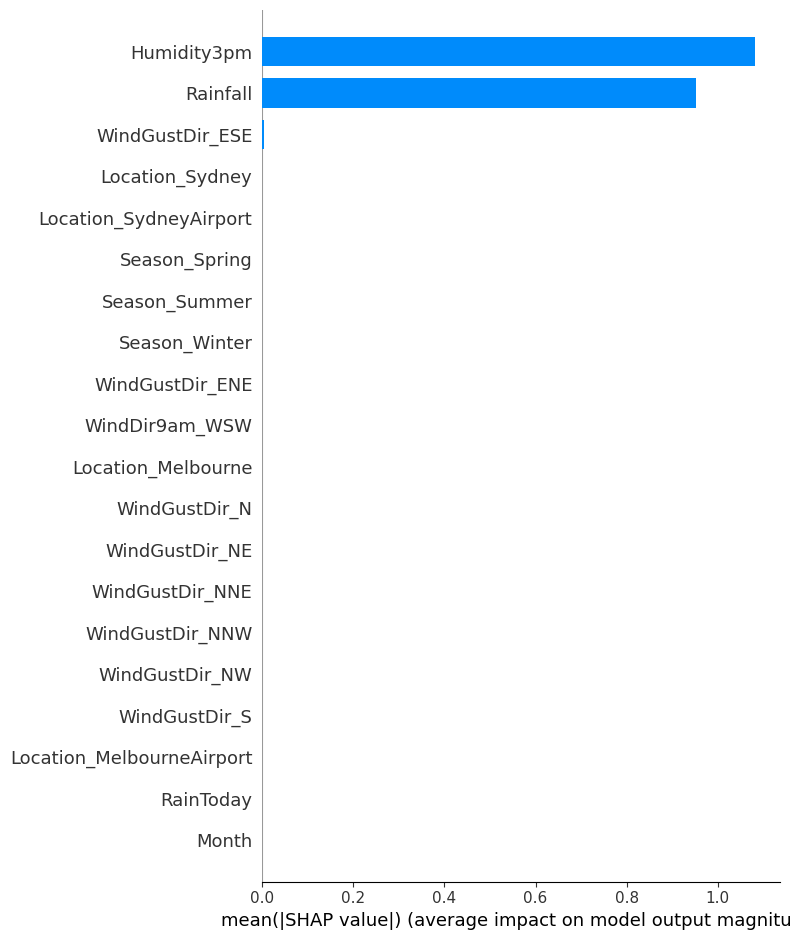

In [ ]:
explainer_lr = shap.Explainer(best_optuna_model_lr, X_test.drop("RainfallTomorrow",axis=1).iloc[:300, :])
shap_values_lr = explainer_lr.shap_values(X_test.drop("RainfallTomorrow",axis=1).iloc[:300, :])

shap.summary_plot(shap_values_lr,
                  X_test.drop("RainfallTomorrow",axis=1).iloc[:300, :],
                  feature_names= X_test.drop("RainfallTomorrow",axis=1).columns,
                  plot_type="bar")

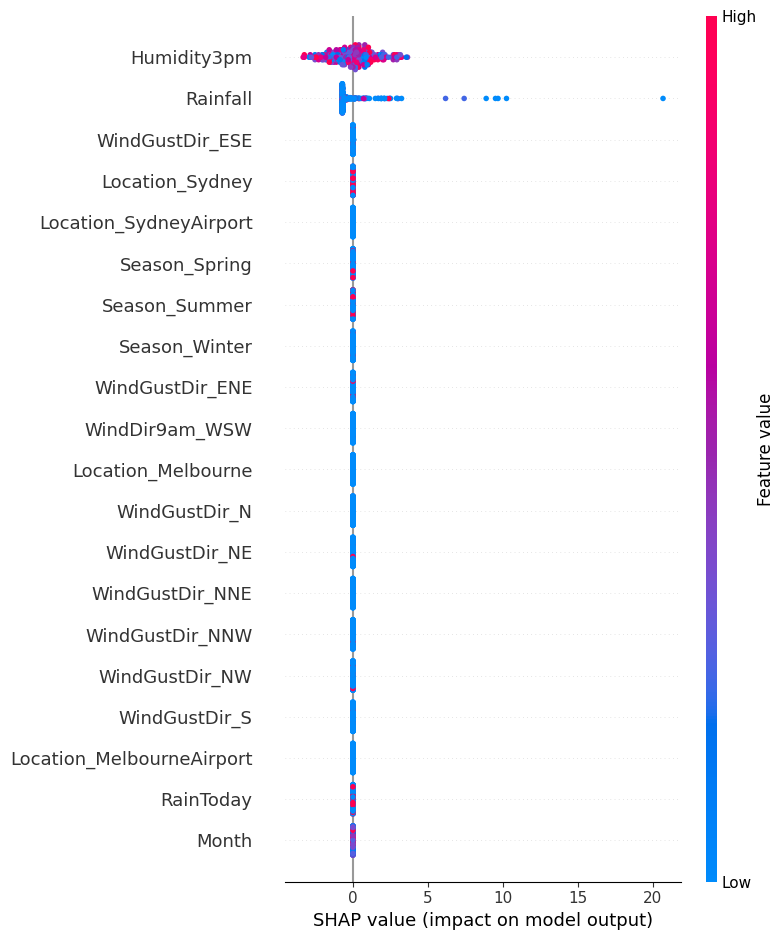

In [ ]:
shap.summary_plot(shap_values_lr,  X_train.drop("RainfallTomorrow", axis=1).iloc[:300, :])

In [ ]:
shap.initjs()

ind = 0
base_value_lr = explainer_lr.expected_value
shap.plots.force(base_value_lr, shap_values_lr[ind], feature_names= X_train.drop("RainfallTomorrow", axis=1).columns)

##Regresion Logistica

In [ ]:
explainer_log = shap.Explainer(best_optuna_model_log, X_train.drop("RainfallTomorrow", axis=1))

shap_values_log = explainer_log.shap_values(X_test.drop("RainfallTomorrow", axis=1))

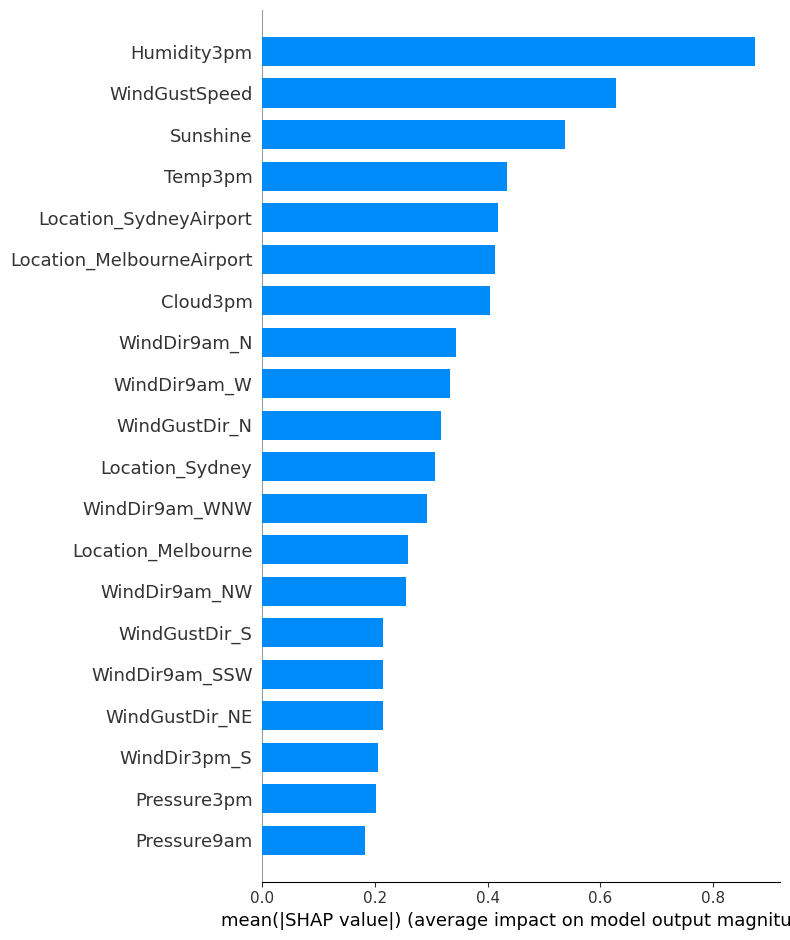

In [ ]:
shap.summary_plot(shap_values_log, X_test.drop("RainfallTomorrow", axis=1), plot_type="bar")

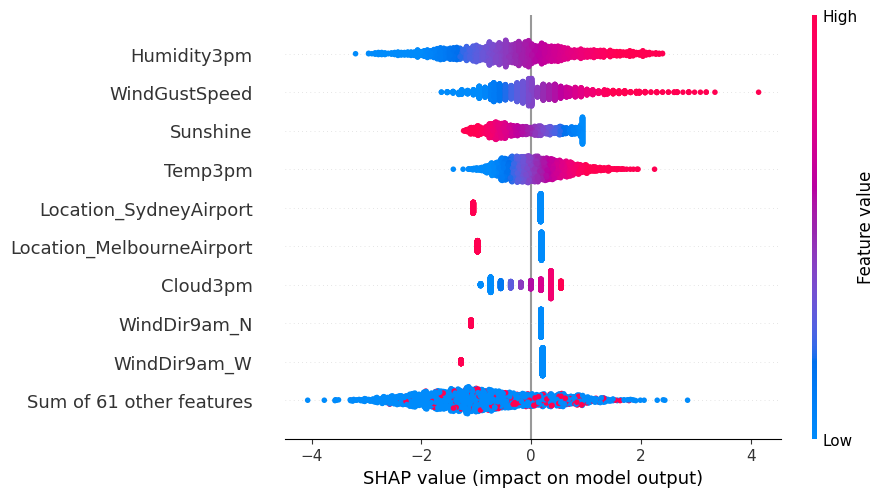

In [ ]:
shap_values_log = shap.Explanation(
    values=shap_values_log,
    base_values=explainer_log.expected_value,
    data=X_test.drop("RainfallTomorrow", axis=1),
    feature_names=X_test.drop("RainfallTomorrow", axis=1).columns
)

shap.plots.beeswarm(shap_values_log)

In [ ]:
shap.initjs()

sample_instances_log = X_test.drop("RainfallTomorrow", axis=1).iloc[:300, :]
shap_values_samples_log = explainer_log.shap_values(sample_instances_log)

shap.force_plot(
    base_value=explainer_log.expected_value,
    shap_values=shap_values_samples_log,
    features=sample_instances_log
)


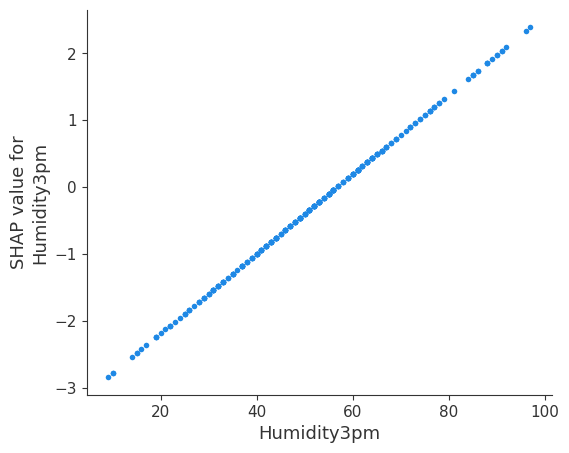

In [ ]:
shap.dependence_plot('Humidity3pm', shap_values_samples_log, sample_instances_log, interaction_index=None)

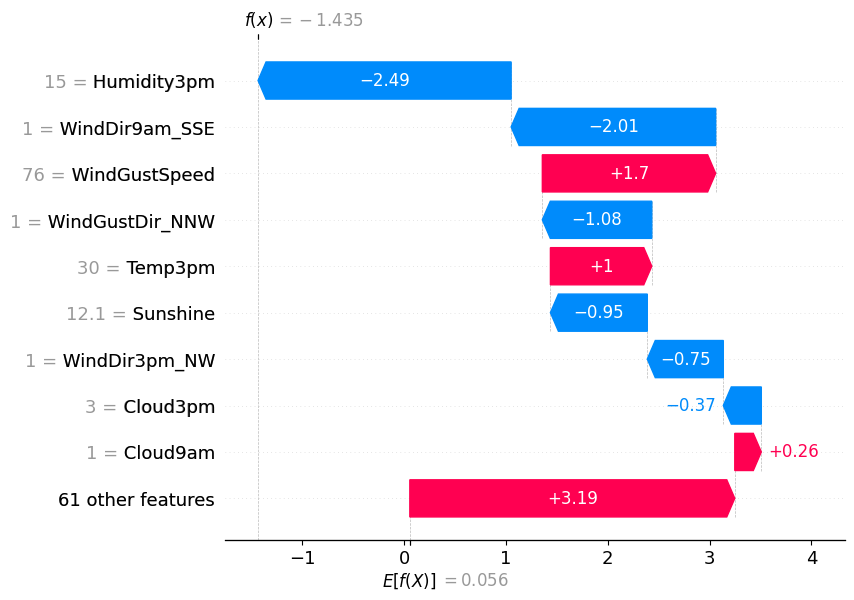

In [ ]:
index = 1
explanation_log = shap.Explanation(
    values=shap_values_log[index],
    base_values=explainer_log.expected_value,
    data=X_test.drop("RainfallTomorrow", axis=1).iloc[index, :],
    feature_names=X_test.drop("RainfallTomorrow", axis=1).columns
)

shap.plots.waterfall(explanation_log, max_display=10)

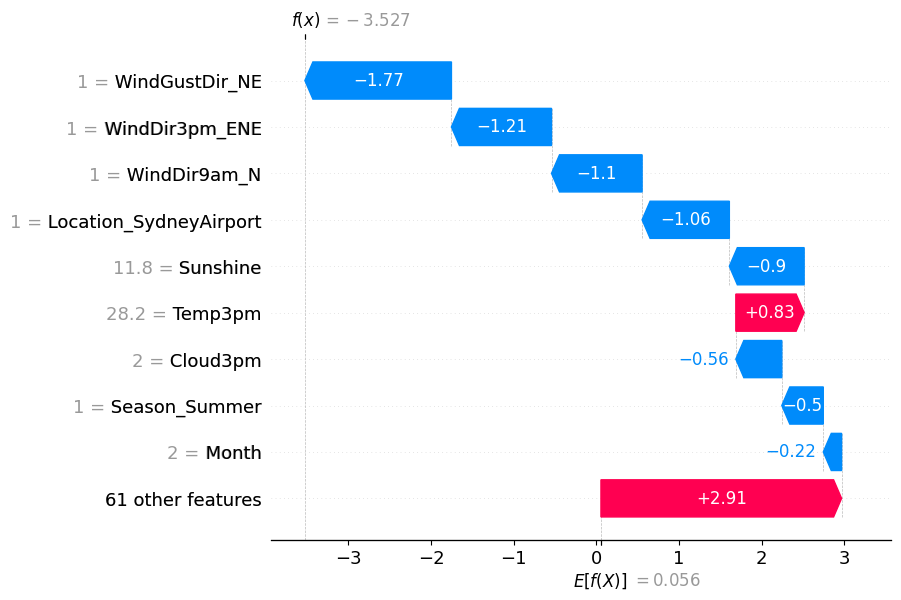

In [ ]:
index = 2
explanation_log = shap.Explanation(
    values=shap_values_log[index],
    base_values=explainer_log.expected_value,
    data=X_test.drop("RainfallTomorrow", axis=1).iloc[index, :],
    feature_names=X_test.drop("RainfallTomorrow", axis=1).columns
)

shap.plots.waterfall(explanation_log, max_display=10)

##Red Neuronal

In [ ]:
def f(X):
    return final_model_rn1.predict(X)

explainer_nn = shap.Explainer(f, X_train.drop("RainfallTomorrow",axis=1).iloc[:300, :])
shap_values_nn = explainer_nn.shap_values(X_test.drop("RainfallTomorrow",axis=1).iloc[:300, :])

explainer_kernel_nn = shap.KernelExplainer(f, X_train.drop("RainfallTomorrow",axis=1).iloc[:30, :])
shap_values_kernel_nn = explainer_kernel_nn.shap_values(X_test.drop("RainfallTomorrow",axis=1).iloc[:300, :])

120/120 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 3/300 [00:00<?, ?it/s]

122/122 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 5/300 [00:15<08:17,  1.69s/it]

133/133 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 6/300 [00:18<10:55,  2.23s/it]

131/131 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 7/300 [00:20<10:52,  2.23s/it]

120/120 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 8/300 [00:22<10:39,  2.19s/it]

126/126 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 9/300 [00:25<10:42,  2.21s/it]

117/117 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 10/300 [00:27<10:50,  2.24s/it]

118/118 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▎         | 11/300 [00:31<12:53,  2.68s/it]

124/124 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 12/300 [00:33<12:10,  2.54s/it]

128/128 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 13/300 [00:35<11:39,  2.44s/it]

117/117 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   5%|▍         | 14/300 [00:38<11:49,  2.48s/it]

125/125 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   5%|▌         | 15/300 [00:40<11:24,  2.40s/it]

125/125 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   5%|▌         | 16/300 [00:43<13:12,  2.79s/it]

123/123 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 17/300 [00:46<12:39,  2.68s/it]

131/131 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 18/300 [00:48<11:59,  2.55s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   6%|▋         | 19/300 [00:51<11:57,  2.55s/it]

115/115 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 20/300 [00:53<11:11,  2.40s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 21/300 [00:56<12:26,  2.68s/it]

131/131 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 22/300 [00:59<12:52,  2.78s/it]

127/127 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 23/300 [01:01<12:06,  2.62s/it]

123/123 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 24/300 [01:04<11:29,  2.50s/it]

120/120 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 25/300 [01:06<11:07,  2.43s/it]

122/122 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   9%|▊         | 26/300 [01:08<10:58,  2.40s/it]

121/121 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   9%|▉         | 27/300 [01:12<12:51,  2.83s/it]

122/122 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 28/300 [01:14<11:59,  2.65s/it]

125/125 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  10%|▉         | 29/300 [01:16<11:24,  2.53s/it]

123/123 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 30/300 [01:18<10:43,  2.39s/it]

126/126 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  10%|█         | 31/300 [01:21<10:29,  2.34s/it]

131/131 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 32/300 [01:25<12:48,  2.87s/it]

132/132 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 33/300 [01:27<12:10,  2.74s/it]

134/134 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  11%|█▏        | 34/300 [01:29<11:27,  2.59s/it]

135/135 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 35/300 [01:32<11:21,  2.57s/it]

113/113 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 36/300 [01:34<10:56,  2.49s/it]

125/125 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 37/300 [01:37<11:44,  2.68s/it]

117/117 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 38/300 [01:41<12:16,  2.81s/it]

128/128 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 39/300 [01:43<11:27,  2.64s/it]

127/127 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 40/300 [01:45<11:21,  2.62s/it]

120/120 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▎        | 41/300 [01:48<10:42,  2.48s/it]

125/125 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 42/300 [01:50<10:54,  2.54s/it]

132/132 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 43/300 [01:54<12:18,  2.87s/it]

121/121 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  15%|█▍        | 44/300 [01:56<11:26,  2.68s/it]

131/131 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  15%|█▌        | 45/300 [01:58<10:49,  2.55s/it]

125/125 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 46/300 [02:01<10:26,  2.47s/it]

121/121 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 47/300 [02:03<10:03,  2.39s/it]

115/115 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 48/300 [02:06<11:36,  2.76s/it]

126/126 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  16%|█▋        | 49/300 [02:09<11:31,  2.76s/it]

137/137 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 50/300 [02:12<11:39,  2.80s/it]

130/130 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 51/300 [02:15<11:45,  2.84s/it]

126/126 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 52/300 [02:18<11:30,  2.79s/it]

125/125 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 53/300 [02:21<12:32,  3.05s/it]

122/122 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 54/300 [02:23<11:26,  2.79s/it]

127/127 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 55/300 [02:26<10:41,  2.62s/it]

125/125 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▊        | 56/300 [02:28<10:06,  2.49s/it]

124/124 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  19%|█▉        | 57/300 [02:30<09:42,  2.40s/it]

135/135 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  19%|█▉        | 58/300 [02:34<11:25,  2.83s/it]

125/125 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 59/300 [02:37<11:08,  2.77s/it]

126/126 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  20%|██        | 60/300 [02:39<11:14,  2.81s/it]

128/128 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  20%|██        | 61/300 [02:42<10:32,  2.65s/it]

118/118 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 62/300 [02:44<09:52,  2.49s/it]

131/131 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  21%|██        | 63/300 [02:48<11:19,  2.87s/it]

139/139 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  21%|██▏       | 64/300 [02:50<11:05,  2.82s/it]

133/133 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 65/300 [02:52<10:16,  2.62s/it]

134/134 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 66/300 [02:55<10:37,  2.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 67/300 [02:58<10:03,  2.59s/it]

127/127 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 68/300 [03:02<11:38,  3.01s/it]

125/125 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 69/300 [03:04<10:41,  2.78s/it]

116/116 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 70/300 [03:06<09:54,  2.59s/it]

121/121 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  24%|██▎       | 71/300 [03:08<09:25,  2.47s/it]

120/120 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 72/300 [03:10<09:05,  2.39s/it]

130/130 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 73/300 [03:14<10:39,  2.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▍       | 74/300 [03:17<10:33,  2.80s/it]

126/126 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  25%|██▌       | 75/300 [03:19<09:48,  2.62s/it]

131/131 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  25%|██▌       | 76/300 [03:22<10:09,  2.72s/it]

123/123 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 77/300 [03:24<09:32,  2.57s/it]

119/119 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 78/300 [03:28<10:18,  2.79s/it]

133/133 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  26%|██▋       | 79/300 [03:31<10:48,  2.94s/it]

128/128 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 80/300 [03:34<10:40,  2.91s/it]

127/127 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 81/300 [03:36<10:11,  2.79s/it]

132/132 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 82/300 [03:39<09:34,  2.63s/it]

124/124 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 83/300 [03:43<11:00,  3.05s/it]

134/134 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 84/300 [03:45<10:28,  2.91s/it]

125/125 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 85/300 [03:47<09:43,  2.71s/it]

123/123 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  29%|██▊       | 86/300 [03:50<09:10,  2.57s/it]

134/134 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 87/300 [03:53<09:29,  2.67s/it]

128/128 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 88/300 [03:57<10:47,  3.05s/it]

122/122 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  30%|██▉       | 89/300 [03:59<09:54,  2.82s/it]

124/124 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  30%|███       | 90/300 [04:01<09:11,  2.63s/it]

130/130 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 91/300 [04:04<09:24,  2.70s/it]

122/122 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 92/300 [04:06<08:47,  2.54s/it]

121/121 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  31%|███       | 93/300 [04:10<10:02,  2.91s/it]

135/135 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  31%|███▏      | 94/300 [04:13<10:00,  2.91s/it]

127/127 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 95/300 [04:15<09:10,  2.69s/it]

127/127 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 96/300 [04:17<08:38,  2.54s/it]

127/127 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 97/300 [04:19<08:10,  2.42s/it]

125/125 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 98/300 [04:22<08:58,  2.67s/it]

116/116 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 99/300 [04:25<09:12,  2.75s/it]

128/128 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 100/300 [04:28<09:00,  2.70s/it]

133/133 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  34%|███▎      | 101/300 [04:30<08:29,  2.56s/it]

122/122 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 102/300 [04:32<08:06,  2.46s/it]

124/124 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 103/300 [04:36<08:54,  2.71s/it]

122/122 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  35%|███▍      | 104/300 [04:39<09:11,  2.81s/it]

128/128 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  35%|███▌      | 105/300 [04:41<08:35,  2.65s/it]

118/118 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  35%|███▌      | 106/300 [04:43<08:03,  2.49s/it]

135/135 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 107/300 [04:45<07:44,  2.41s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 108/300 [04:48<07:52,  2.46s/it]

124/124 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▋      | 109/300 [04:52<08:53,  2.79s/it]

127/127 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 110/300 [04:54<08:17,  2.62s/it]

125/125 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 111/300 [04:56<07:50,  2.49s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 112/300 [04:58<07:35,  2.42s/it]

136/136 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 113/300 [05:00<07:21,  2.36s/it]

130/130 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 114/300 [05:04<08:10,  2.64s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 115/300 [05:07<08:24,  2.73s/it]

128/128 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▊      | 116/300 [05:09<07:55,  2.58s/it]

120/120 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  39%|███▉      | 117/300 [05:11<07:31,  2.47s/it]

124/124 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  39%|███▉      | 118/300 [05:13<07:12,  2.38s/it]

124/124 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  40%|███▉      | 119/300 [05:16<07:13,  2.39s/it]

127/127 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  40%|████      | 120/300 [05:19<08:18,  2.77s/it]

128/128 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  40%|████      | 121/300 [05:22<08:03,  2.70s/it]

125/125 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  41%|████      | 122/300 [05:24<07:36,  2.57s/it]

122/122 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  41%|████      | 123/300 [05:27<07:53,  2.67s/it]

113/113 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  41%|████▏     | 124/300 [05:29<07:18,  2.49s/it]

124/124 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|████▏     | 125/300 [05:33<08:30,  2.92s/it]

120/120 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|████▏     | 126/300 [05:35<07:51,  2.71s/it]

125/125 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|████▏     | 127/300 [05:38<07:27,  2.59s/it]

121/121 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 128/300 [05:40<07:05,  2.47s/it]

126/126 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  43%|████▎     | 129/300 [05:42<07:09,  2.51s/it]

126/126 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  43%|████▎     | 130/300 [05:46<08:24,  2.97s/it]

128/128 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  44%|████▎     | 131/300 [05:49<07:50,  2.78s/it]

122/122 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  44%|████▍     | 132/300 [05:51<07:18,  2.61s/it]

127/127 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 133/300 [05:53<06:55,  2.49s/it]

126/126 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  45%|████▍     | 134/300 [05:56<06:59,  2.53s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  45%|████▌     | 135/300 [05:59<07:32,  2.74s/it]

120/120 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  45%|████▌     | 136/300 [06:02<07:48,  2.86s/it]

125/125 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  46%|████▌     | 137/300 [06:05<07:48,  2.87s/it]

120/120 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  46%|████▌     | 138/300 [06:07<07:13,  2.67s/it]

124/124 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▋     | 139/300 [06:10<07:24,  2.76s/it]

128/128 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  47%|████▋     | 140/300 [06:14<08:29,  3.19s/it]

132/132 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  47%|████▋     | 141/300 [06:17<07:43,  2.91s/it]

127/127 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  47%|████▋     | 142/300 [06:19<07:09,  2.72s/it]

120/120 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  48%|████▊     | 143/300 [06:22<06:58,  2.66s/it]

125/125 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  48%|████▊     | 144/300 [06:24<06:51,  2.64s/it]

122/122 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  48%|████▊     | 145/300 [06:28<07:55,  3.07s/it]

121/121 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▊     | 146/300 [06:30<07:08,  2.78s/it]

130/130 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  49%|████▉     | 147/300 [06:33<06:41,  2.62s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  49%|████▉     | 148/300 [06:35<06:37,  2.62s/it]

128/128 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  50%|████▉     | 149/300 [06:38<06:32,  2.60s/it]

117/117 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  50%|█████     | 150/300 [06:41<07:17,  2.92s/it]

127/127 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  50%|█████     | 151/300 [06:44<06:49,  2.75s/it]

128/128 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  51%|█████     | 152/300 [06:46<06:36,  2.68s/it]

122/122 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  51%|█████     | 153/300 [06:48<06:13,  2.54s/it]

128/128 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████▏    | 154/300 [06:51<06:12,  2.55s/it]

127/127 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  52%|█████▏    | 155/300 [06:54<06:38,  2.75s/it]

135/135 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 156/300 [06:57<06:50,  2.85s/it]

125/125 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  52%|█████▏    | 157/300 [07:00<06:21,  2.67s/it]

127/127 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  53%|█████▎    | 158/300 [07:02<06:14,  2.64s/it]

118/118 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  53%|█████▎    | 159/300 [07:04<05:56,  2.53s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  53%|█████▎    | 160/300 [07:08<06:56,  2.98s/it]

130/130 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  54%|█████▎    | 161/300 [07:11<06:53,  2.97s/it]

122/122 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  54%|█████▍    | 162/300 [07:14<06:21,  2.77s/it]

135/135 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  54%|█████▍    | 163/300 [07:17<06:24,  2.81s/it]

122/122 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  55%|█████▍    | 164/300 [07:19<06:13,  2.74s/it]

123/123 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  55%|█████▌    | 165/300 [07:22<06:28,  2.88s/it]

118/118 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  55%|█████▌    | 166/300 [07:25<06:29,  2.91s/it]

121/121 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|█████▌    | 167/300 [07:27<05:56,  2.68s/it]

119/119 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|█████▌    | 168/300 [07:30<05:37,  2.56s/it]

134/134 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▋    | 169/300 [07:32<05:36,  2.57s/it]

127/127 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  57%|█████▋    | 170/300 [07:36<06:20,  2.93s/it]

125/125 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 171/300 [07:39<06:28,  3.01s/it]

133/133 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  57%|█████▋    | 172/300 [07:42<06:21,  2.98s/it]

130/130 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 173/300 [07:45<06:02,  2.85s/it]

120/120 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  58%|█████▊    | 174/300 [07:47<05:49,  2.78s/it]

131/131 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  58%|█████▊    | 175/300 [07:51<06:31,  3.13s/it]

112/112 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  59%|█████▊    | 176/300 [07:54<05:55,  2.86s/it]

133/133 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  59%|█████▉    | 177/300 [07:56<05:45,  2.81s/it]

124/124 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  59%|█████▉    | 178/300 [07:58<05:20,  2.63s/it]

134/134 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  60%|█████▉    | 179/300 [08:03<06:17,  3.12s/it]

118/118 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  60%|██████    | 180/300 [08:06<06:34,  3.29s/it]

123/123 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  60%|██████    | 181/300 [08:09<05:53,  2.97s/it]

126/126 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  61%|██████    | 182/300 [08:11<05:35,  2.85s/it]

133/133 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  61%|██████    | 183/300 [08:15<05:57,  3.06s/it]

114/114 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  61%|██████▏   | 184/300 [08:18<06:12,  3.21s/it]

119/119 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  62%|██████▏   | 185/300 [08:21<06:00,  3.14s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 186/300 [08:23<05:25,  2.85s/it]

127/127 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  62%|██████▏   | 187/300 [08:26<05:01,  2.67s/it]

124/124 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  63%|██████▎   | 188/300 [08:28<04:42,  2.52s/it]

132/132 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  63%|██████▎   | 189/300 [08:31<05:05,  2.75s/it]

132/132 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  63%|██████▎   | 190/300 [08:35<05:25,  2.96s/it]

124/124 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  64%|██████▎   | 191/300 [08:37<05:11,  2.86s/it]

120/120 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  64%|██████▍   | 192/300 [08:40<04:59,  2.77s/it]

130/130 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  64%|██████▍   | 193/300 [08:42<04:39,  2.61s/it]

129/129 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  65%|██████▍   | 194/300 [08:46<05:04,  2.87s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  65%|██████▌   | 195/300 [08:49<05:15,  3.00s/it]

122/122 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  65%|██████▌   | 196/300 [08:51<04:58,  2.87s/it]

121/121 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  66%|██████▌   | 197/300 [08:54<04:36,  2.68s/it]

110/110 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  66%|██████▌   | 198/300 [08:56<04:16,  2.52s/it]

118/118 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  66%|██████▋   | 199/300 [08:59<04:21,  2.59s/it]

128/128 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  67%|██████▋   | 200/300 [09:02<04:47,  2.88s/it]

124/124 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 201/300 [09:05<04:46,  2.89s/it]

131/131 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 202/300 [09:08<04:42,  2.89s/it]

128/128 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  68%|██████▊   | 203/300 [09:10<04:20,  2.69s/it]

135/135 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  68%|██████▊   | 204/300 [09:14<04:51,  3.04s/it]

124/124 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  68%|██████▊   | 205/300 [09:17<04:57,  3.14s/it]

121/121 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  69%|██████▊   | 206/300 [09:20<04:30,  2.88s/it]

113/113 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  69%|██████▉   | 207/300 [09:22<04:10,  2.70s/it]

120/120 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  69%|██████▉   | 208/300 [09:24<03:55,  2.56s/it]

115/115 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  70%|██████▉   | 209/300 [09:28<04:19,  2.85s/it]

117/117 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 210/300 [09:30<04:14,  2.83s/it]

130/130 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 211/300 [09:33<03:54,  2.64s/it]

128/128 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  71%|███████   | 212/300 [09:35<03:51,  2.63s/it]

119/119 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 213/300 [09:37<03:37,  2.50s/it]

130/130 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  71%|███████▏  | 214/300 [09:40<03:47,  2.64s/it]

134/134 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|███████▏  | 215/300 [09:44<04:03,  2.87s/it]

123/123 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|███████▏  | 216/300 [09:46<03:46,  2.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 217/300 [09:48<03:32,  2.56s/it]

127/127 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  73%|███████▎  | 218/300 [09:52<03:48,  2.78s/it]

123/123 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  73%|███████▎  | 219/300 [09:54<03:36,  2.68s/it]

128/128 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  73%|███████▎  | 220/300 [09:58<04:03,  3.05s/it]

127/127 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|███████▎  | 221/300 [10:00<03:41,  2.80s/it]

115/115 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|███████▍  | 222/300 [10:02<03:24,  2.62s/it]

119/119 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 223/300 [10:05<03:10,  2.47s/it]

128/128 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▍  | 224/300 [10:07<03:17,  2.60s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  75%|███████▌  | 225/300 [10:11<03:36,  2.89s/it]

128/128 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  75%|███████▌  | 226/300 [10:14<03:28,  2.82s/it]

123/123 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|███████▌  | 227/300 [10:16<03:19,  2.74s/it]

128/128 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|███████▌  | 228/300 [10:19<03:14,  2.70s/it]

133/133 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|███████▋  | 229/300 [10:22<03:17,  2.78s/it]

131/131 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|███████▋  | 230/300 [10:26<03:40,  3.16s/it]

123/123 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|███████▋  | 231/300 [10:28<03:26,  2.99s/it]

124/124 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|███████▋  | 232/300 [10:31<03:17,  2.90s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 233/300 [10:33<03:00,  2.70s/it]

124/124 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 234/300 [10:36<02:51,  2.60s/it]

128/128 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 235/300 [10:40<03:13,  2.98s/it]

122/122 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  79%|███████▊  | 236/300 [10:42<03:05,  2.89s/it]

122/122 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  79%|███████▉  | 237/300 [10:45<03:03,  2.90s/it]

127/127 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  79%|███████▉  | 238/300 [10:48<03:07,  3.02s/it]

118/118 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|███████▉  | 239/300 [10:52<03:16,  3.21s/it]

134/134 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|████████  | 240/300 [10:55<03:11,  3.19s/it]

128/128 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|████████  | 241/300 [10:58<03:03,  3.11s/it]

116/116 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  81%|████████  | 242/300 [11:00<02:42,  2.81s/it]

125/125 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  81%|████████  | 243/300 [11:03<02:30,  2.64s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  81%|████████▏ | 244/300 [11:06<02:43,  2.92s/it]

124/124 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 245/300 [11:09<02:43,  2.97s/it]

125/125 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|████████▏ | 246/300 [11:12<02:34,  2.87s/it]

126/126 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|████████▏ | 247/300 [11:14<02:27,  2.78s/it]

126/126 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  83%|████████▎ | 248/300 [11:17<02:15,  2.61s/it]

133/133 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  83%|████████▎ | 249/300 [11:21<02:37,  3.09s/it]

124/124 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  83%|████████▎ | 250/300 [11:23<02:27,  2.94s/it]

119/119 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▎ | 251/300 [11:26<02:13,  2.73s/it]

127/127 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▍ | 252/300 [11:28<02:04,  2.60s/it]

115/115 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▍ | 253/300 [11:30<01:56,  2.48s/it]

123/123 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  85%|████████▍ | 254/300 [11:33<01:53,  2.48s/it]

124/124 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  85%|████████▌ | 255/300 [11:36<02:07,  2.83s/it]

127/127 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  85%|████████▌ | 256/300 [11:39<02:01,  2.76s/it]

124/124 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  86%|████████▌ | 257/300 [11:41<01:56,  2.71s/it]

127/127 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  86%|████████▌ | 258/300 [11:44<01:47,  2.57s/it]

121/121 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  86%|████████▋ | 259/300 [11:46<01:41,  2.48s/it]

120/120 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  87%|████████▋ | 260/300 [11:50<01:56,  2.91s/it]

131/131 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  87%|████████▋ | 261/300 [11:53<01:53,  2.92s/it]

126/126 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  87%|████████▋ | 262/300 [11:55<01:46,  2.80s/it]

126/126 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  88%|████████▊ | 263/300 [11:58<01:41,  2.75s/it]

115/115 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  88%|████████▊ | 264/300 [12:00<01:33,  2.59s/it]

128/128 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  88%|████████▊ | 265/300 [12:04<01:44,  2.98s/it]

122/122 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  89%|████████▊ | 266/300 [12:07<01:37,  2.87s/it]

134/134 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  89%|████████▉ | 267/300 [12:10<01:35,  2.89s/it]

128/128 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  89%|████████▉ | 268/300 [12:13<01:32,  2.89s/it]

128/128 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  90%|████████▉ | 269/300 [12:16<01:33,  3.02s/it]

117/117 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  90%|█████████ | 270/300 [12:19<01:31,  3.06s/it]

139/139 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 271/300 [12:21<01:21,  2.82s/it]

124/124 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  91%|█████████ | 272/300 [12:24<01:20,  2.86s/it]

130/130 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  91%|█████████ | 273/300 [12:27<01:13,  2.71s/it]

128/128 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  91%|█████████▏| 274/300 [12:30<01:16,  2.93s/it]

124/124 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|█████████▏| 275/300 [12:33<01:14,  2.99s/it]

120/120 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|█████████▏| 276/300 [12:35<01:06,  2.76s/it]

113/113 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|█████████▏| 277/300 [12:38<01:00,  2.62s/it]

139/139 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  93%|█████████▎| 278/300 [12:41<01:01,  2.81s/it]

122/122 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  93%|█████████▎| 279/300 [12:44<01:03,  3.03s/it]

134/134 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  93%|█████████▎| 280/300 [12:47<01:00,  3.00s/it]

122/122 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  94%|█████████▎| 281/300 [12:50<00:56,  2.98s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  94%|█████████▍| 282/300 [12:53<00:53,  2.95s/it]

131/131 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  94%|█████████▍| 283/300 [12:57<00:54,  3.19s/it]

130/130 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  95%|█████████▍| 284/300 [13:01<00:54,  3.39s/it]

130/130 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  95%|█████████▌| 285/300 [13:03<00:46,  3.07s/it]

125/125 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  95%|█████████▌| 286/300 [13:05<00:39,  2.84s/it]

126/126 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  96%|█████████▌| 287/300 [13:08<00:35,  2.77s/it]

125/125 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  96%|█████████▌| 288/300 [13:11<00:34,  2.89s/it]

128/128 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  96%|█████████▋| 289/300 [13:15<00:34,  3.11s/it]

121/121 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  97%|█████████▋| 290/300 [13:17<00:29,  2.95s/it]

125/125 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  97%|█████████▋| 291/300 [13:20<00:24,  2.75s/it]

124/124 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  97%|█████████▋| 292/300 [13:23<00:22,  2.83s/it]

122/122 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  98%|█████████▊| 293/300 [13:26<00:21,  3.08s/it]

122/122 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  98%|█████████▊| 294/300 [13:30<00:19,  3.22s/it]

126/126 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  98%|█████████▊| 295/300 [13:33<00:16,  3.24s/it]

125/125 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  99%|█████████▊| 296/300 [13:37<00:13,  3.26s/it]

125/125 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  99%|█████████▉| 297/300 [13:40<00:09,  3.31s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  99%|█████████▉| 298/300 [13:44<00:06,  3.43s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer: 100%|█████████▉| 299/300 [13:46<00:03,  3.23s/it]

128/128 [==============================] - 0s 2ms/step


PermutationExplainer explainer: 100%|██████████| 300/300 [13:50<00:00,  3.24s/it]

135/135 [==============================] - 0s 2ms/step


PermutationExplainer explainer: 301it [13:53,  2.80s/it]

1/1 [==============================] - 0s 34ms/step


  0%|          | 0/300 [00:00<?, ?it/s]

2025/2025 [==============================] - 3s 2ms/step


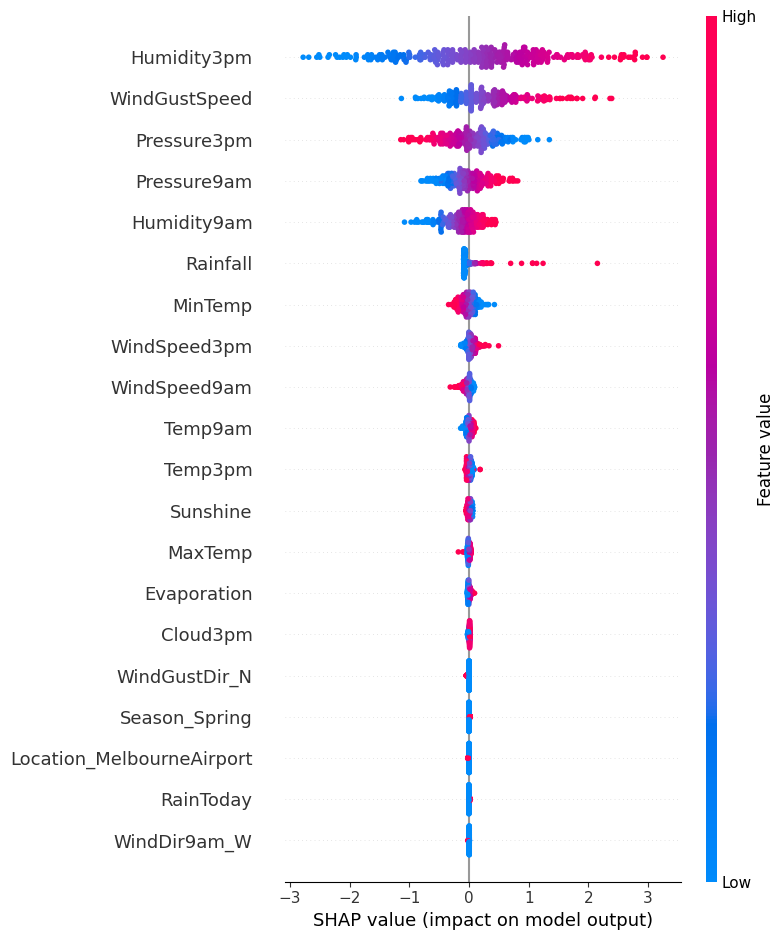

In [ ]:
shap.summary_plot(shap_values_nn, X_test.drop("RainfallTomorrow",axis=1).iloc[:300, :])

In [ ]:
shap.initjs()
shap.force_plot(explainer_kernel_nn.expected_value, shap_values_kernel_nn[0], X_test.drop("RainfallTomorrow", axis=1).iloc[:300, :])

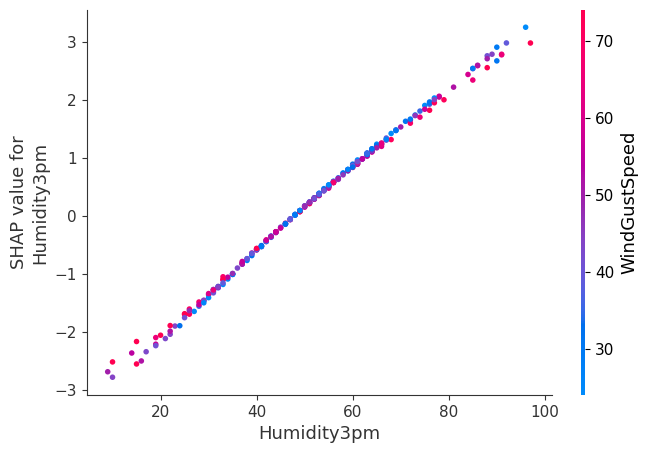

In [ ]:
shap.dependence_plot('Humidity3pm', shap_values_nn, X_test.drop("RainfallTomorrow", axis=1).iloc[:300, :], interaction_index=None)

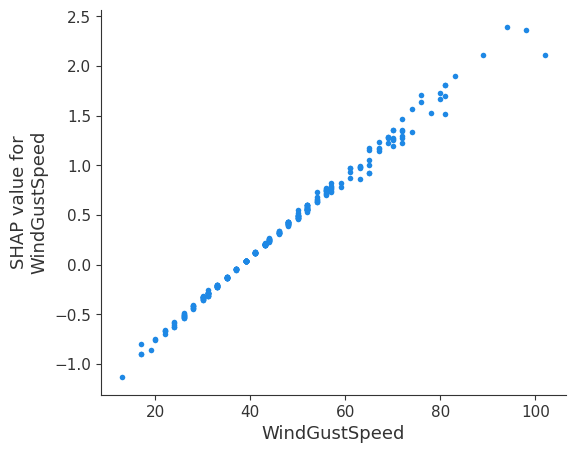

In [ ]:
shap.dependence_plot('WindGustSpeed', shap_values_nn, X_test.drop("RainfallTomorrow", axis=1).iloc[:300, :], interaction_index=None)

# Produccion

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import datasets
import joblib

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # esto simplemente imputa por la media.
    ('scaler', StandardScaler()),  # se realiza una estandarización.
    ('model', LogisticRegression())  # se entrena un modelo de regresión lineal.
])

pipeline.fit(X_train, y_train)

joblib.dump(pipeline, 'iris_pipeline.joblib')